# UFC Analysis for Match Predictions


**Introduction**: The Ultimate Fighting Championship (UFC) is a premier Mixed Martial Arts (MMA) organization that showcases top-ranked fighters in combat sports. As the popularity of the UFC has surged, so has the importance of using data analytics and machine learning to gain a competitive edge.

**Objective**: Our aim is to harness the power of data science to:
- Understand the key factors that contribute to a fighter's success in the octagon.
- Develop machine learning models to predict fight outcomes based on historical data and fighter metrics.
- Provide key insights to stakeholders.

By achieving this objective, we not only delve deep into the intricate dynamics of MMA but also demonstrate the applicability of data-driven decision-making in sports analytics.


The Ultimate Fighting Championship (UFC) is more than just a combat sport; it's a global brand with multifaceted implications. Here's why I chose the UFC:

- **Strategic Betting**: With the legalization of sports betting in many regions, there's a surging demand for predictive analytics. Accurate fight predictions can benefit both casual bettors and professional sportsbooks.

- **Content Creation**: Deep insights from fight data can fuel engaging content for fans. From pre-fight analysis videos to post-fight breakdowns, data-driven content can elevate the fan experience.

- **Growing Influence**: With the rise of sports analytics, the UFC community is actively seeking data-driven insights to optimize training and strategize fights.

- **Event Planning**: Predictive analytics can assist promoters in matchmaking, ensuring closely contested and exciting fights that maximize ticket sales and Pay-Per-View buys.

- **Growth Opportunities**: Analyzing fight data can help the UFC identify emerging stars, potential matchups, and markets that haven't been tapped into, guiding expansion strategies.


#### Package Imports

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For ML purposes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier





1. Data Exploration and General Insights:
To begin, let's load the data and perform some preliminary exploration to understand the structure of the dataset and gain general insights.

2. Feature Engineering and Selection:
Once we have a good understanding of the data, we can proceed with feature engineering to create new features or modify existing ones to improve model performance. We'll also identify which features are the most relevant for our predictive task.

3. Modeling:
We'll start with some basic models like Random Forests to establish a baseline. Then we can proceed with more complex models, including a deep learning model.

4. Parameter Tuning:
Using techniques like grid search or random search, we'll fine-tune the parameters of our models to achieve better performance.

5. Model Stacking:
We'll combine predictions from multiple models to potentially achieve better results than any individual model.

6. Model Selection:
Based on performance metrics (e.g., accuracy, F1-score), we'll select the best model.

7. Model Interpretation:
We'll delve into understanding how the chosen model makes predictions and interpret its results in the context of the UFC industry.

Finally, we'll address the other questions like real-life applications, reasoning for algorithm choice, feature engineering, and potential improvements.

Let's start with Data Exploration. I'll load the data and provide an overview of its structure and some general insights. Shall we?







In [2]:
# To fully see the columns in the data set.
# pd.set_option('display.max_columns', None)
# Easier for me to see the rows with important data on the fighters and the match.
pd.set_option('display.max_rows',None)

In [3]:
# # Reset display options
# pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

This **UFC project** will consist of multiple UFC data sets. 

gladiators = Fighter Info and Physical Stats

EDA = Battle Info and Outcome. Will use for EDA and further illustration of data cleaning and Machine Learning.

ufc_1 = secondary battle Info with outcomes. Different format more columns. Cleaner version of the data.

In [4]:
# Fighter info, raw physical stats
gladiators = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/raw_fighter_details.csv')

In [5]:
EDA = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/clean_total_fight.csv')

In [6]:
# This Data Set is similar to that of EDA but a more refined version. It contains similar stats. It has columns
# That were engineered to produce the 144 columns. However not all columns were useful
ufc_1 = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/data.csv')

In [7]:
# Fight data different format.
EDA.shape

(6012, 44)

In [8]:
ufc_1.shape

(6012, 144)

My Goal was to Engineer similar amounts of columns by combining EDA and gladiators. They produced similar looking tables in the end

## **Column definitions:**
- **R_ and B_** prefix signifies red and blue corner fighter stats  respectively.
- **KD** is number of knockdowns.
- **SIG_STR** is no. of significant strikes 'landed of attempted'.
- **SIG_STR_pct** is significant strikes percentage.
- **TOTAL_STR** is total strikes 'landed of attempted'.
- **TD** is no. of takedowns.
- **D_pct** is takedown percentages.
- **SUB_ATT** is no. of submission attempts.
- **PASS** refers to the number of times a fighter successfully transitions from one grappling position to a more dominant position during a ground exchange.
- **REV** = Reversals. A reversal occurs when a fighter successfully transitions from a defensive position on the ground to a more advantageous position on top of their opponent.
- **HEAD** is no. of significant strikes to the head 'landed of attempted'
- **BODY** is no. of significant strikes to the body 'landed of attempted'
- **CLINCH** is no. of significant strikes in the clinch 'landed of     attempted'
- **GROUND** is no. of significant strikes on the ground 'landed of attempted'
- **win_by** is method of win
- **last_round** is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
- **last_round_time** is when the fight ended in the last round
- **Format** is the format of the fight (3 rounds, 5 rounds etc.)
- **Referee** is the name of the Ref
- **Month**
- **Year**
- **City**
- **State**
- **Country**
- **Fight_type** is which weight class and whether it's a title bout or not
- **Winner** is the winner of the fight


#### Column Definitions for Reference. Gladiators Data Set.

1. **SLpM (Significant Strikes Landed per Minute):** This statistic represents the average number of significant strikes (effective punches, kicks, and other impactful hits) that a fighter lands on their opponent per minute of fighting. A higher SLpM value indicates that the fighter is active in terms of striking offense.

2. **SApM (Significant Strikes Absorbed per Minute):** This statistic represents the average number of significant strikes that a fighter absorbs from their opponent per minute of fighting. A higher SApM value indicates that the fighter tends to get hit more often by their opponent's strikes.

3. **Str_Acc(Striking Accuracy):** "Str_Acc" in UFC datasets refers to "Striking Accuracy." It's a statistic that measures the percentage of significant strikes that a fighter lands successfully out of the total significant strikes they attempt.

4. **Str_Def (Striking Defense):** The percentage of opponents' significant strikes that a fighter successfully avoids or blocks. It reflects the fighter's ability to defend against striking attacks.

5. **TD_Avg (Takedowns Average):** The average number of successful takedowns a fighter completes per round. It measures the fighter's proficiency in taking their opponent down to the ground.

6. **TD_Acc (Takedown Accuracy):** The percentage of successful takedowns out of the total takedown attempts. It indicates the fighter's accuracy in executing takedowns.

7. **TD_Def (Takedown Defense):** The percentage of opponents' takedown attempts that a fighter successfully defends against. It reflects the fighter's ability to prevent their opponent from taking them down.

8. **Sub_Avg (Submission Average):** The average number of submission attempts a fighter makes per round. It measures the fighter's frequency of attempting submissions.

9. **Reach:** The distance from the tip of a fighter's extended arm to the center of their opponent's chest. Reach provides an idea of the fighter's physical advantage in terms of striking and clinching distance.

10. **Stance:** The fighting stance adopted by a fighter, indicating the position of their feet and the hand they lead with. Common stances include Orthodox, Southpaw, and Switch, which influence a fighter's strategy and striking style.



In [9]:
EDA.T

0                     1                 2     \
R_fighter             Adrian Yanez          Trevin Giles       Tai Tuivasa   
B_fighter            Gustavo Lopez         Roman Dolidze   Harry Hunsucker   
R_KD                             2                     0                 1   
B_KD                             0                     0                 0   
R_SIG_STR.               41 of 103              27 of 57          14 of 18   
B_SIG_STR.                23 of 51              32 of 67            2 of 6   
R_SIG_STR_pct                  39%                   47%               77%   
B_SIG_STR_pct                  45%                   47%               33%   
R_TOTAL_STR.             41 of 103              43 of 73          14 of 18   
B_TOTAL_STR.              23 of 51             75 of 110            2 of 6   
R_TD                        0 of 0                1 of 2            0 of 0   
B_TD                        0 of 1                1 of 3            0 of 0   
R_TD_pct                       ---                   50%               ---   
B_TD_pct                        0%                   33%               ---   
R_SUB_ATT                        0                     1                 0   
B_SUB_ATT                        0                     2                 0   
R_REV                            0                     0                 0   
B_REV                            0                     1                 0   
R_CTRL                        0:03                  1:15              0:10   
B_CTRL                        0:00                  4:15              0:00   
R_HEAD                    32 of 83              22 of 51          10 of 14   
B_HEAD                    14 of 40              10 of 37            1 of 5   
R_BODY                     8 of 19                4 of 4            0 of 0   
B_BODY                      5 of 7               7 of 14            0 of 0   
R_LEG                       1 of 1                1 of 2            4 of 4   
B_LEG                       4 of 4              15 of 16            1 of 1   
R_DISTANCE               41 of 102              15 of 42           9 of 10   
B_DISTANCE                23 of 51              28 of 59            2 of 6   
R_CLINCH                    0 of 0                4 of 5            0 of 0   
B_CLINCH                    0 of 0                3 of 6            0 of 0   
R_GROUND                    0 of 1               8 of 10            5 of 8   
B_GROUND                    0 of 0                1 of 2            0 of 0   
win_by                      KO/TKO  Decision - Unanimous            KO/TKO   
last_round                       3                     3                 1   
last_round_time               0:27                  5:00              0:49   
Format               3 Rnd (5-5-5)         3 Rnd (5-5-5)     3 Rnd (5-5-5)   
Referee              Chris Tognoni             Herb Dean         Herb Dean   
Month                       20-Mar                20-Mar            20-Mar   
Year                          2021                  2021              2021   
City                     Las Vegas             Las Vegas         Las Vegas   
State                       Nevada                Nevada            Nevada   
Country                        USA                   USA               USA   
Fight_Type       Bantamweight Bout     Middleweight Bout  Heavyweight Bout   
Winner                Adrian Yanez          Trevin Giles       Tai Tuivasa   

                                     3                          4     \
R_fighter                   Cheyanne Buys              Marion Reneau   
B_fighter               Montserrat Conejo              Macy Chiasson   
R_KD                                    0                          0   
B_KD                                    0                          0   
R_SIG_STR.                       31 of 65                   30 of 63   
B_SIG_STR.                       15 of 41                  51 of 138   
R_SIG_STR_pct  

## Data Exploration

Let us Address the Value Format and Missing Info in the Strike Efficiency Columns

In [10]:
# Looks like there are no null values. Looks can be deceiving.
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].isna().sum()

R_SIG_STR_pct    0
B_SIG_STR_pct    0
R_TD_pct         0
B_TD_pct         0
dtype: int64

In [11]:
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].dtypes

R_SIG_STR_pct    object
B_SIG_STR_pct    object
R_TD_pct         object
B_TD_pct         object
dtype: object

In [12]:
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].head(10)

R_SIG_STR_pct B_SIG_STR_pct R_TD_pct B_TD_pct
0           39%           45%      ---       0%
1           47%           47%      50%      33%
2           77%           33%      ---      ---
3           47%           36%      ---      80%
4           47%           36%      50%     100%
5           44%           54%      50%       7%
6           58%           60%      ---       0%
7           46%           48%      50%     100%
8           57%           56%      ---      ---
9           60%           30%      50%       0%

As you can see some values simply just have the '---' to represent zero and also the percentages were in an object format.

Percentage Conversion

In [13]:
# Certain Columns have '---' in the columns. Especially in the TD columns due to no data.
for col in ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']:
    EDA[col] = EDA[col].replace('---', np.nan)

# Convert percentage columns to decimal format
for col in ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']:
    EDA[col] = EDA[col].str.rstrip('%').astype('float') / 100.0


In [14]:
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].head(10)

R_SIG_STR_pct  B_SIG_STR_pct  R_TD_pct  B_TD_pct
0           0.39           0.45       NaN      0.00
1           0.47           0.47       0.5      0.33
2           0.77           0.33       NaN       NaN
3           0.47           0.36       NaN      0.80
4           0.47           0.36       0.5      1.00
5           0.44           0.54       0.5      0.07
6           0.58           0.60       NaN      0.00
7           0.46           0.48       0.5      1.00
8           0.57           0.56       NaN       NaN
9           0.60           0.30       0.5      0.00

In [15]:
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].isna().sum()

R_SIG_STR_pct      34
B_SIG_STR_pct      52
R_TD_pct         1889
B_TD_pct         2242
dtype: int64

In [16]:
null_rows = EDA[EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].isna().any(axis=1)]
null_rows.shape

(3437, 44)

In [17]:
null_rows.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'Month', 'Year', 'City',
       'State', 'Country', 'Fight_Type', 'Winner'],
      dtype='object')

In [18]:
null_rows[['R_fighter','B_fighter','R_SIG_STR.','R_SIG_STR_pct','B_SIG_STR.','B_SIG_STR_pct','R_TD','R_TD_pct', 'B_TD', 'B_TD_pct']]

R_fighter                 B_fighter  R_SIG_STR.  \
0                  Adrian Yanez             Gustavo Lopez   41 of 103   
2                   Tai Tuivasa           Harry Hunsucker    14 of 18   
3                 Cheyanne Buys         Montserrat Conejo    31 of 65   
6                    Song Kenan               Max Griffin    14 of 24   
8                Montel Jackson             Jesse Strader    15 of 26   
10                   Manel Kape           Matheus Nicolau   61 of 150   
11               Misha Cirkunov                Ryan Spann     5 of 18   
12                 Leon Edwards            Belal Muhammad    19 of 39   
14                  Eryk Anders            Darren Stewart    43 of 63   
16            Jonathan Martinez               Davey Grant    29 of 71   
17                      Dan Ige              Gavin Tucker      1 of 4   
20         Matthew Semelsberger                Jason Witt      3 of 5   
21                   Rani Yahya             Ray Rodriguez     8 of 13   
22              Gloria de Paula              Jinh Yu Frey    31 of 63   
24                  Song Yadong            Kyler Phillips   67 of 161   
26               Jan Blachowicz           Israel Adesanya  107 of 193   
28             Joseph Benavidez             Askar Askarov   46 of 114   
29                 Amanda Nunes            Megan Anderson    18 of 25   
30              Islam Makhachev                Drew Dober    15 of 25   
31                  Tim Elliott           Jordan Espinosa    25 of 44   
32                Livinha Souza              Amanda Lemos      1 of 7   
33             Rogerio Bontorin           Kai Kara-France     6 of 17   
34                   Uros Medic                Aalon Cruz    45 of 63   
35            Kennedy Nzechukwu             Carlos Ulberg   82 of 148   
36                   Sean Brady             Jake Matthews    37 of 68   
37               Mario Bautista              Trevin Jones    21 of 42   
38        Jairzinho Rozenstruik                Ciryl Gane   42 of 104   
39           Montana De La Rosa         Mayra Bueno Silva    30 of 72   
41          Alexander Hernandez             Thiago Moises   50 of 205   
42                 Pedro Munhoz             Jimmie Rivera   94 of 194   
46                Dustin Jacoby             Maxim Grishin   57 of 137   
47              Aleksei Oleinik             Chris Daukaus     5 of 10   
49                   Phil Hawes        Nassourdine Imavov    31 of 54   
50               Curtis Blaydes             Derrick Lewis    28 of 52   
51               Eddie Wineland            John Castaneda    17 of 66   
52              Andrei Arlovski              Tom Aspinall    20 of 55   
54                Ketlen Vieira           Yana Kunitskaya     7 of 16   
55               Aiemann Zahabi           Drako Rodriguez     9 of 11   
56               Serghei Spivac            Jared Vanderaa    51 of 72   
57                Nate Landwehr              Julian Erosa     9 of 14   
58                 Shana Dobson             Casey O'Neill    16 of 28   
59                Maycee Barber              Alexa Grasso   40 of 152   
62                 Kamaru Usman             Gilbert Burns   83 of 136   
63                  Ricky Simon            Brian Kelleher    45 of 98   
65                Polyana Viana            Mallory Martin     4 of 16   
66               Rodolfo Vieira         Anthony Hernandez     9 of 26   
72              Michael Johnson                Clay Guida   58 of 126   
73             Alistair Overeem          Alexander Volkov    10 of 20   
75               Cory Sandhagen             Frankie Edgar      2 of 5   
76               Mike Rodriguez            Danilo Marques    16 of 24   
77                 Ode Osbourne             Jerome Rivera      5 of 6   
79                 Molly McCann             Lara Procopio    37 of 47   
80                 Timur Valiev                Martin Day    55 of 76   
81                   Dan Hooker          Michael Chandler     8 of 19   
86     

##### Impute the values to zero

In [19]:
# The math checks out, safe to add zeros to the null values.

columns_to_impute = ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']
EDA[columns_to_impute] = EDA[columns_to_impute].fillna(0)


In [20]:
EDA[['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']].isna().sum()

R_SIG_STR_pct    0
B_SIG_STR_pct    0
R_TD_pct         0
B_TD_pct         0
dtype: int64

#### Splitting The Attempts and Landed.

Here is the issue. We need to see the amounts that actually hit compared to what what was attempted, to get some insights on the fight in a more acceptable format for machine learning and graph analysis. 

These are good insights for fighting efficiency. 

First we put the columns into a variable. 

If you look above you an example is 23 of 51 Strikes. 

**The goal is to split that**

We then make sure that we can extract the values

In the UFC it is important to know about the strikes attempted and strikes that actually landed. 

Let us split the data to get more info on it. And make a clear distinction

In [21]:
EDA.T

0                     1                 2     \
R_fighter             Adrian Yanez          Trevin Giles       Tai Tuivasa   
B_fighter            Gustavo Lopez         Roman Dolidze   Harry Hunsucker   
R_KD                             2                     0                 1   
B_KD                             0                     0                 0   
R_SIG_STR.               41 of 103              27 of 57          14 of 18   
B_SIG_STR.                23 of 51              32 of 67            2 of 6   
R_SIG_STR_pct                 0.39                  0.47              0.77   
B_SIG_STR_pct                 0.45                  0.47              0.33   
R_TOTAL_STR.             41 of 103              43 of 73          14 of 18   
B_TOTAL_STR.              23 of 51             75 of 110            2 of 6   
R_TD                        0 of 0                1 of 2            0 of 0   
B_TD                        0 of 1                1 of 3            0 of 0   
R_TD_pct                       0.0                   0.5               0.0   
B_TD_pct                       0.0                  0.33               0.0   
R_SUB_ATT                        0                     1                 0   
B_SUB_ATT                        0                     2                 0   
R_REV                            0                     0                 0   
B_REV                            0                     1                 0   
R_CTRL                        0:03                  1:15              0:10   
B_CTRL                        0:00                  4:15              0:00   
R_HEAD                    32 of 83              22 of 51          10 of 14   
B_HEAD                    14 of 40              10 of 37            1 of 5   
R_BODY                     8 of 19                4 of 4            0 of 0   
B_BODY                      5 of 7               7 of 14            0 of 0   
R_LEG                       1 of 1                1 of 2            4 of 4   
B_LEG                       4 of 4              15 of 16            1 of 1   
R_DISTANCE               41 of 102              15 of 42           9 of 10   
B_DISTANCE                23 of 51              28 of 59            2 of 6   
R_CLINCH                    0 of 0                4 of 5            0 of 0   
B_CLINCH                    0 of 0                3 of 6            0 of 0   
R_GROUND                    0 of 1               8 of 10            5 of 8   
B_GROUND                    0 of 0                1 of 2            0 of 0   
win_by                      KO/TKO  Decision - Unanimous            KO/TKO   
last_round                       3                     3                 1   
last_round_time               0:27                  5:00              0:49   
Format               3 Rnd (5-5-5)         3 Rnd (5-5-5)     3 Rnd (5-5-5)   
Referee              Chris Tognoni             Herb Dean         Herb Dean   
Month                       20-Mar                20-Mar            20-Mar   
Year                          2021                  2021              2021   
City                     Las Vegas             Las Vegas         Las Vegas   
State                       Nevada                Nevada            Nevada   
Country                        USA                   USA               USA   
Fight_Type       Bantamweight Bout     Middleweight Bout  Heavyweight Bout   
Winner                Adrian Yanez          Trevin Giles       Tai Tuivasa   

                                     3                          4     \
R_fighter                   Cheyanne Buys              Marion Reneau   
B_fighter               Montserrat Conejo              Macy Chiasson   
R_KD                                    0                          0   
B_KD                                    0                          0   
R_SIG_STR.                       31 of 65                   30 of 63   
B_SIG_STR.                       15 of 41                  51 of 138   
R_SIG_STR_pct  

In [22]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

In [23]:
attemp = '_att'
landed = '_landed'

for column in columns:
    EDA[column+attemp] = EDA[column].apply(lambda X: int(X.split('of')[1]))
    EDA[column+landed] = EDA[column].apply(lambda X: int(X.split('of')[0]))

# Then I dropped those original columns
EDA.drop(columns, axis=1, inplace=True)

In [24]:
EDA.T

0                     1     \
R_fighter                 Adrian Yanez          Trevin Giles   
B_fighter                Gustavo Lopez         Roman Dolidze   
R_KD                                 2                     0   
B_KD                                 0                     0   
R_SIG_STR_pct                     0.39                  0.47   
B_SIG_STR_pct                     0.45                  0.47   
R_TD_pct                           0.0                   0.5   
B_TD_pct                           0.0                  0.33   
R_SUB_ATT                            0                     1   
B_SUB_ATT                            0                     2   
R_REV                                0                     0   
B_REV                                0                     1   
R_CTRL                            0:03                  1:15   
B_CTRL                            0:00                  4:15   
win_by                          KO/TKO  Decision - Unanimous   
last_round                           3                     3   
last_round_time                   0:27                  5:00   
Format                   3 Rnd (5-5-5)         3 Rnd (5-5-5)   
Referee                  Chris Tognoni             Herb Dean   
Month                           20-Mar                20-Mar   
Year                              2021                  2021   
City                         Las Vegas             Las Vegas   
State                           Nevada                Nevada   
Country                            USA                   USA   
Fight_Type           Bantamweight Bout     Middleweight Bout   
Winner                    Adrian Yanez          Trevin Giles   
R_SIG_STR._att                     103                    57   
R_SIG_STR._landed                   41                    27   
B_SIG_STR._att                      51                    67   
B_SIG_STR._landed                   23                    32   
R_TOTAL_STR._att                   103                    73   
R_TOTAL_STR._landed                 41                    43   
B_TOTAL_STR._att                    51                   110   
B_TOTAL_STR._landed                 23                    75   
R_TD_att                             0                     2   
R_TD_landed                          0                     1   
B_TD_att                             1                     3   
B_TD_landed                          0                     1   
R_HEAD_att                          83                    51   
R_HEAD_landed                       32                    22   
B_HEAD_att                          40                    37   
B_HEAD_landed                       14                    10   
R_BODY_att                          19                     4   
R_BODY_landed                        8                     4   
B_BODY_att                           7                    14   
B_BODY_landed                        5                     7   
R_LEG_att                            1                     2   
R_LEG_landed                         1                     1   
B_LEG_att                            4                    16   
B_LEG_landed                         4                    15   
R_DISTANCE_att                     102                    42   
R_DISTANCE_landed                   41                    15   
B_DISTANCE_att                      51                    59   
B_DISTANCE_landed                   23                    28   
R_CLINCH_att                         0                     5   
R_CLINCH_landed                      0                     4   
B_CLINCH_att                         0                     6   
B_CLINCH_landed                      0                     3   
R_GROUND_att                         1                    10   
R_GROUND_landed                      0                     8   
B_GROUND_att                         0                     2   
B_GROUND_landed                      0                     1   

 

In [25]:
EDA.shape

(6012, 62)

#### Null values check

In [26]:
EDA.isna().sum()

R_fighter                0
B_fighter                0
R_KD                     0
B_KD                     0
R_SIG_STR_pct            0
B_SIG_STR_pct            0
R_TD_pct                 0
B_TD_pct                 0
R_SUB_ATT                0
B_SUB_ATT                0
R_REV                    0
B_REV                    0
R_CTRL                   0
B_CTRL                   0
win_by                   0
last_round               0
last_round_time          0
Format                   0
Referee                 32
Month                    0
Year                     0
City                     0
State                    0
Country                  0
Fight_Type               0
Winner                 110
R_SIG_STR._att           0
R_SIG_STR._landed        0
B_SIG_STR._att           0
B_SIG_STR._landed        0
R_TOTAL_STR._att         0
R_TOTAL_STR._landed      0
B_TOTAL_STR._att         0
B_TOTAL_STR._landed      0
R_TD_att                 0
R_TD_landed              0
B_TD_att                 0
B

##### Addressing the winner null values. Replacing them with Draws.

In [27]:
# Here we see the data set has sections where the winner is NaN
# While doing reasearch on the real life UFC. All of these outcomes 
# represent draws. Draw no contest.
EDA[EDA['Winner'].isnull()][['R_fighter', 'B_fighter', 'Winner','Month']]

R_fighter            B_fighter Winner   Month
12             Leon Edwards       Belal Muhammad    NaN  13-Mar
14              Eryk Anders       Darren Stewart    NaN  13-Mar
39       Montana De La Rosa    Mayra Bueno Silva    NaN  27-Feb
132     Deiveson Figueiredo       Brandon Moreno    NaN  12-Dec
208              Da-Un Jung            Sam Alvey    NaN  24-Oct
236        Charles Jourdain         Josh Culibao    NaN   3-Oct
263          Donald Cerrone           Niko Price    NaN  19-Sep
271       Roosevelt Roberts          Kevin Croom    NaN  12-Sep
307            Timur Valiev         Trevin Jones    NaN  22-Aug
337         Chris Gutierrez          Cody Durden    NaN   1-Aug
348           Nicolas Dalby         Jesse Ronson    NaN  25-Jul
401    Marc-Andre Barriault       Oskar Piechota    NaN  20-Jun
435            Jamahal Hill        Klidson Abreu    NaN  30-May
485              Rani Yahya      Enrique Barzola    NaN  14-Mar
546         Domingo Pilarte       Journey Newson    NaN   8-Feb
598        Marina Rodriguez     Cynthia Calvillo    NaN   7-Dec
602            Cody Stamann          Song Yadong    NaN   7-Dec
615            Mauricio Rua           Paul Craig    NaN  16-Nov
659              Greg Hardy           Ben Sosoli    NaN  18-Oct
694             Khalid Taha          Bruno Silva    NaN   5-Oct
714          Brandon Moreno        Askar Askarov    NaN  21-Sep
716          Yair Rodriguez      Jeremy Stephens    NaN  21-Sep
727             Todd Duffee          Jeff Hughes    NaN  14-Sep
733        Zubaira Tukhugov        Lerone Murphy    NaN   7-Sep
822          Mike Rodriguez           John Allan    NaN  13-Jul
1095        Andrei Arlovski          Walt Harris    NaN  29-Dec
1178            Chas Skelly        Bobby Moffett    NaN  10-Nov
1195           Matt Frevola        Lando Vannata    NaN   3-Nov
1227           Randa Markos     Marina Rodriguez    NaN  22-Sep
1369                CM Punk         Mike Jackson    NaN   9-Jun
1565         Marvin Vettori       Omari Akhmedov    NaN  30-Dec
1568    Khalil Rountree Jr.  Michal Oleksiejczuk    NaN  30-Dec
1613         DeAnna Bennett       Melinda Fabian    NaN   1-Dec
1695          Lando Vannata          Bobby Green    NaN   7-Oct
1696         Beneil Dariush          Evan Dunham    NaN   7-Oct
1761         Daniel Cormier            Jon Jones    NaN  29-Jul
1880          Eddie Alvarez       Dustin Poirier    NaN  13-May
1939          Bethe Correia        Marion Reneau    NaN  11-Mar
1941          Vitor Belfort      Kelvin Gastelum    NaN  11-Mar
1987          Adam Milstead       Curtis Blaydes    NaN   4-Feb
1994            Alex Morono           Niko Price    NaN   4-Feb
2027          Alex Oliveira            Tim Means    NaN  30-Dec
2099      Francimar Barroso       Darren Stewart    NaN  19-Nov
2116          Tyron Woodley     Stephen Thompson    NaN  12-Nov
2186        Alejandro Perez       Albert Morales    NaN  17-Sep
2206           Jarjis Danho    Christian Colombo    NaN   3-Sep
2252         Michael Graves     Bojan Velickovic    NaN  30-Jul
2283           Brock Lesnar            Mark Hunt    NaN   9-Jul
2334            Kevin Casey       Elvis Mutapcic    NaN   4-Jun
2360          Sergio Moraes          Luan Chagas    NaN  14-May
2485          Damon Jackson     Levan Makashvili    NaN  30-Jan
2522            Cole Miller            Jim Alers    NaN  19-Dec
2547  Antonio Carlos Junior          Kevin Casey    NaN  10-Dec
2613          Nicolas Dalby          Darren Till    NaN  24-Oct
2638          Mizuto Hirota      Teruto Ishihara    NaN  26-Sep
2795             Rony Jason        Damon Jackson    NaN  30-May
2892          Leandro Silva           Drew Dober    NaN  21-Mar
2910          Roman Salazar    Norifumi Yamamoto    NaN  28-Feb
2944         Anderson Silva            Nick Diaz    NaN  31-Jan
2977         Hector Lombard       Joshua Burkman    NaN   3-Jan
3009               KJ Noons    Daron Cruickshank    NaN  12-Dec
3097           Pedro Munhoz       Jerrod Sanders  

In [28]:
# Filled in the data.
EDA['Winner'].fillna('Draw', inplace=True)

In [29]:
EDA[['R_fighter', 'B_fighter', 'Winner']][EDA['Winner']== 'Draw']

R_fighter            B_fighter Winner
12             Leon Edwards       Belal Muhammad   Draw
14              Eryk Anders       Darren Stewart   Draw
39       Montana De La Rosa    Mayra Bueno Silva   Draw
132     Deiveson Figueiredo       Brandon Moreno   Draw
208              Da-Un Jung            Sam Alvey   Draw
236        Charles Jourdain         Josh Culibao   Draw
263          Donald Cerrone           Niko Price   Draw
271       Roosevelt Roberts          Kevin Croom   Draw
307            Timur Valiev         Trevin Jones   Draw
337         Chris Gutierrez          Cody Durden   Draw
348           Nicolas Dalby         Jesse Ronson   Draw
401    Marc-Andre Barriault       Oskar Piechota   Draw
435            Jamahal Hill        Klidson Abreu   Draw
485              Rani Yahya      Enrique Barzola   Draw
546         Domingo Pilarte       Journey Newson   Draw
598        Marina Rodriguez     Cynthia Calvillo   Draw
602            Cody Stamann          Song Yadong   Draw
615            Mauricio Rua           Paul Craig   Draw
659              Greg Hardy           Ben Sosoli   Draw
694             Khalid Taha          Bruno Silva   Draw
714          Brandon Moreno        Askar Askarov   Draw
716          Yair Rodriguez      Jeremy Stephens   Draw
727             Todd Duffee          Jeff Hughes   Draw
733        Zubaira Tukhugov        Lerone Murphy   Draw
822          Mike Rodriguez           John Allan   Draw
1095        Andrei Arlovski          Walt Harris   Draw
1178            Chas Skelly        Bobby Moffett   Draw
1195           Matt Frevola        Lando Vannata   Draw
1227           Randa Markos     Marina Rodriguez   Draw
1369                CM Punk         Mike Jackson   Draw
1565         Marvin Vettori       Omari Akhmedov   Draw
1568    Khalil Rountree Jr.  Michal Oleksiejczuk   Draw
1613         DeAnna Bennett       Melinda Fabian   Draw
1695          Lando Vannata          Bobby Green   Draw
1696         Beneil Dariush          Evan Dunham   Draw
1761         Daniel Cormier            Jon Jones   Draw
1880          Eddie Alvarez       Dustin Poirier   Draw
1939          Bethe Correia        Marion Reneau   Draw
1941          Vitor Belfort      Kelvin Gastelum   Draw
1987          Adam Milstead       Curtis Blaydes   Draw
1994            Alex Morono           Niko Price   Draw
2027          Alex Oliveira            Tim Means   Draw
2099      Francimar Barroso       Darren Stewart   Draw
2116          Tyron Woodley     Stephen Thompson   Draw
2186        Alejandro Perez       Albert Morales   Draw
2206           Jarjis Danho    Christian Colombo   Draw
2252         Michael Graves     Bojan Velickovic   Draw
2283           Brock Lesnar            Mark Hunt   Draw
2334            Kevin Casey       Elvis Mutapcic   Draw
2360          Sergio Moraes          Luan Chagas   Draw
2485          Damon Jackson     Levan Makashvili   Draw
2522            Cole Miller            Jim Alers   Draw
2547  Antonio Carlos Junior          Kevin Casey   Draw
2613          Nicolas Dalby          Darren Till   Draw
2638          Mizuto Hirota      Teruto Ishihara   Draw
2795             Rony Jason        Damon Jackson   Draw
2892          Leandro Silva           Drew Dober   Draw
2910          Roman Salazar    Norifumi Yamamoto   Draw
2944         Anderson Silva            Nick Diaz   Draw
2977         Hector Lombard       Joshua Burkman   Draw
3009               KJ Noons    Daron Cruickshank   Draw
3097           Pedro Munhoz       Jerrod Sanders   Draw
3192       Mike de la Torre         Brian Ortega   Draw
3233        Robert Drysdale         Keith Berish   Draw
3244            Kevin Casey           Bubba Bush   Draw
3375             Rani Yahya       Johnny Bedford   Draw
3380        Leonardo Santos         Norman Parke   Draw
3411            Phil Harris       Louis Gaudinot   Draw
3455            Chico Camus         Yaotzin Meza   Draw
3495           Dennis Siver     Manvel Gamburyan   Draw
3515              Mark Hunt        Antonio

##### Now let us address the referee issue.

In [30]:
EDA[EDA['Referee'].isnull()][['R_fighter', 'B_fighter', 'Winner','Referee']]

R_fighter              B_fighter                Winner  \
10              Manel Kape        Matheus Nicolau       Matheus Nicolau   
138        Gabriel Benitez          Justin Jaynes       Gabriel Benitez   
237   Germaine de Randamie          Julianna Pena  Germaine de Randamie   
304         Mariya Agapova           Shana Dobson          Shana Dobson   
346        Fabricio Werdum   Alexander Gustafsson       Fabricio Werdum   
404         Curtis Blaydes       Alexander Volkov        Curtis Blaydes   
456            Ricky Simon               Ray Borg           Ricky Simon   
525          Lando Vannata         Yancy Medeiros         Lando Vannata   
742         Omari Akhmedov           Zak Cummings        Omari Akhmedov   
889            Bea Malecki           Duda Santana           Bea Malecki   
987           Alexis Davis          Jennifer Maia         Jennifer Maia   
1290   Alexander Hernandez  Olivier Aubin-Mercier   Alexander Hernandez   
1402          Zak Cummings        Michel Prazeres       Michel Prazeres   
1411         Henry Briones          Frankie Saenz         Frankie Saenz   
1445          Shana Dobson         Lauren Mueller        Lauren Mueller   
1937         Marc Diakiese         Teemu Packalen         Marc Diakiese   
2407      Mairbek Taisumov         Damir Hadzovic      Mairbek Taisumov   
2442           Davey Grant            Marlon Vera           Davey Grant   
2444          Norman Parke        Rustam Khabilov       Rustam Khabilov   
2492        Anthony Pettis          Eddie Alvarez         Eddie Alvarez   
2532          Max Holloway        Jeremy Stephens          Max Holloway   
2811       Islam Makhachev              Leo Kuntz       Islam Makhachev   
2817         Tae Hyun Bang               Jon Tuck              Jon Tuck   
3142            Rani Yahya         Johnny Bedford            Rani Yahya   
3398       Robert McDaniel        Sean Strickland       Sean Strickland   
3401         Daniel Pineda       Robert Whiteford      Robert Whiteford   
3572           Al Iaquinta         Piotr Hallmann           Al Iaquinta   
3651          Urijah Faber         Iuri Alcantara          Urijah Faber   
3652          Brad Pickett       Michael McDonald      Michael McDonald   
3796            Mike Ricci         Colin Fletcher            Mike Ricci   
4150          Oli Thompson           Shawn Jordan          Shawn Jordan   
5818           Jens Pulver        Alfonso Alcarez                  Draw   

     Referee  
10       NaN  
138      NaN  
237      NaN  
304      NaN  
346      NaN  
404      NaN  
456      NaN  
525      NaN  
742      NaN  
889      NaN  
987      NaN  
1290     NaN  
1402     NaN  
1411     NaN  
1445     NaN  
1937     NaN  
2407     NaN  
2442     NaN  
2444     NaN  
2492     NaN  
2532     NaN  
2811     NaN  
2817     NaN  
3142     NaN  
3398     NaN  
3401     NaN  
3572     NaN  
3651     NaN  
3652     NaN  
3796     NaN  
4150     NaN  
5818     NaN

In [31]:
EDA['Referee'].fillna('Not Provided', inplace=True)

In [32]:
EDA[EDA['Referee']== 'Not Provided'][['R_fighter', 'B_fighter', 'Winner','Referee']].head()

R_fighter             B_fighter                Winner  \
10             Manel Kape       Matheus Nicolau       Matheus Nicolau   
138       Gabriel Benitez         Justin Jaynes       Gabriel Benitez   
237  Germaine de Randamie         Julianna Pena  Germaine de Randamie   
304        Mariya Agapova          Shana Dobson          Shana Dobson   
346       Fabricio Werdum  Alexander Gustafsson       Fabricio Werdum   

          Referee  
10   Not Provided  
138  Not Provided  
237  Not Provided  
304  Not Provided  
346  Not Provided

In [33]:
EDA.head()

R_fighter          B_fighter  R_KD  B_KD  R_SIG_STR_pct  B_SIG_STR_pct  \
0   Adrian Yanez      Gustavo Lopez     2     0           0.39           0.45   
1   Trevin Giles      Roman Dolidze     0     0           0.47           0.47   
2    Tai Tuivasa    Harry Hunsucker     1     0           0.77           0.33   
3  Cheyanne Buys  Montserrat Conejo     0     0           0.47           0.36   
4  Marion Reneau      Macy Chiasson     0     0           0.47           0.36   

   R_TD_pct  B_TD_pct  R_SUB_ATT  B_SUB_ATT  ...  B_DISTANCE_att  \
0       0.0      0.00          0          0  ...              51   
1       0.5      0.33          1          2  ...              59   
2       0.0      0.00          0          0  ...               6   
3       0.0      0.80          0          2  ...              41   
4       0.5      1.00          0          0  ...             119   

   B_DISTANCE_landed R_CLINCH_att R_CLINCH_landed B_CLINCH_att  \
0                 23            0               0            0   
1                 28            5               4            6   
2                  2            0               0            0   
3                 15            2               2            0   
4                 36            9               5           15   

   B_CLINCH_landed R_GROUND_att R_GROUND_landed B_GROUND_att B_GROUND_landed  
0                0            1               0            0               0  
1                3           10               8            2               1  
2                0            8               5            0               0  
3                0            7               3            0               0  
4               13            0               0            4               2  

[5 rows x 62 columns]

In [34]:
# Combined the fight Date as 
EDA['Fight_Date'] = EDA['Month'].str.cat(EDA['Year'].astype(str), sep=' ')


In [35]:
EDA.T

0                     1     \
R_fighter                 Adrian Yanez          Trevin Giles   
B_fighter                Gustavo Lopez         Roman Dolidze   
R_KD                                 2                     0   
B_KD                                 0                     0   
R_SIG_STR_pct                     0.39                  0.47   
B_SIG_STR_pct                     0.45                  0.47   
R_TD_pct                           0.0                   0.5   
B_TD_pct                           0.0                  0.33   
R_SUB_ATT                            0                     1   
B_SUB_ATT                            0                     2   
R_REV                                0                     0   
B_REV                                0                     1   
R_CTRL                            0:03                  1:15   
B_CTRL                            0:00                  4:15   
win_by                          KO/TKO  Decision - Unanimous   
last_round                           3                     3   
last_round_time                   0:27                  5:00   
Format                   3 Rnd (5-5-5)         3 Rnd (5-5-5)   
Referee                  Chris Tognoni             Herb Dean   
Month                           20-Mar                20-Mar   
Year                              2021                  2021   
City                         Las Vegas             Las Vegas   
State                           Nevada                Nevada   
Country                            USA                   USA   
Fight_Type           Bantamweight Bout     Middleweight Bout   
Winner                    Adrian Yanez          Trevin Giles   
R_SIG_STR._att                     103                    57   
R_SIG_STR._landed                   41                    27   
B_SIG_STR._att                      51                    67   
B_SIG_STR._landed                   23                    32   
R_TOTAL_STR._att                   103                    73   
R_TOTAL_STR._landed                 41                    43   
B_TOTAL_STR._att                    51                   110   
B_TOTAL_STR._landed                 23                    75   
R_TD_att                             0                     2   
R_TD_landed                          0                     1   
B_TD_att                             1                     3   
B_TD_landed                          0                     1   
R_HEAD_att                          83                    51   
R_HEAD_landed                       32                    22   
B_HEAD_att                          40                    37   
B_HEAD_landed                       14                    10   
R_BODY_att                          19                     4   
R_BODY_landed                        8                     4   
B_BODY_att                           7                    14   
B_BODY_landed                        5                     7   
R_LEG_att                            1                     2   
R_LEG_landed                         1                     1   
B_LEG_att                            4                    16   
B_LEG_landed                         4                    15   
R_DISTANCE_att                     102                    42   
R_DISTANCE_landed                   41                    15   
B_DISTANCE_att                      51                    59   
B_DISTANCE_landed                   23                    28   
R_CLINCH_att                         0                     5   
R_CLINCH_landed                      0                     4   
B_CLINCH_att                         0                     6   
B_CLINCH_landed                      0                     3   
R_GROUND_att                         1                    10   
R_GROUND_landed                      0                     8   
B_GROUND_att                         0                     2   
B_GROUND_landed                      0                     1   
Fi

##### Division Types

In [36]:
tuf = EDA['Fight_Type'].value_counts()

In [37]:
title_bouts = tuf.reset_index()

In [38]:
title_bouts.columns = ['Fight_Type','Total']

In [39]:
title_bouts

Fight_Type  Total
0                                     Lightweight Bout   1047
1                                    Welterweight Bout   1026
2                                    Middleweight Bout    769
3                                     Heavyweight Bout    530
4                                   Featherweight Bout    529
5                               Light Heavyweight Bout    520
6                                    Bantamweight Bout    453
7                                       Flyweight Bout    213
8                             Women's Strawweight Bout    179
9                            Women's Bantamweight Bout    136
10                              Women's Flyweight Bout    106
11                                    Open Weight Bout     86
12                    UFC Light Heavyweight Title Bout     46
13                         UFC Welterweight Title Bout     41
14                                   Catch Weight Bout     39
15                          UFC Heavyweight Title Bout     39
16                         UFC Middleweight Title Bout     29
17                          UFC Lightweight Title Bout     28
18                            UFC Flyweight Title Bout     17
19                         UFC Bantamweight Title Bout     15
20                        UFC Featherweight Title Bout     14
21                 UFC Women's Bantamweight Title Bout     14
22                  UFC Women's Strawweight Title Bout     12
23                          Women's Featherweight Bout      8
24                UFC Women's Featherweight Title Bout      7
25                    UFC Women's Flyweight Title Bout      6
26                  UFC Interim Heavyweight Title Bout      6
27                    UFC Superfight Championship Bout      5
28                 UFC Interim Welterweight Title Bout      3
29                 UFC Interim Bantamweight Title Bout      3
30                UFC Interim Featherweight Title Bout      3
31                  UFC Interim Lightweight Title Bout      3
32                 UFC Interim Middleweight Title Bout      3
33            UFC Interim Light Heavyweight Title Bout      2
34   Ultimate Fighter 7 Middleweight Tournament Tit...      1
35   Ultimate Fighter 9 Welterweight Tournament Tit...      1
36   Ultimate Fighter 1 Middleweight Tournament Tit...      1
37   Ultimate Fighter 1 Light Heavyweight Tournamen...      1
38   Ultimate Fighter 2 Welterweight Tournament Tit...      1
39   Ultimate Fighter 9 Lightweight Tournament Titl...      1
40   Ultimate Fighter 2 Heavyweight Tournament Titl...      1
41   Ultimate Fighter 3 Middleweight Tournament Tit...      1
42   Ultimate Fighter 8 Light Heavyweight Tournamen...      1
43   Ultimate Fighter 3 Light Heavyweight Tournamen...      1
44   Ultimate Fighter 4 Welterweight Tournament Tit...      1
45   Ultimate Fighter 4 Middleweight Tournament Tit...      1
46   Ultimate Fighter 8 Lightweight Tournament Titl...      1
47   Ultimate Fighter 5 Lightweight Tournament Titl...      1
48   Ultimate Fighter 6 Welterweight Tournament Tit...      1
49                              Super Heavyweight Bout      1
50                         UFC 8 Tournament Title Bout      1
51   Ultimate Japan 2 Heavyweight Tournament Title ...      1
52                        UFC 10 Tournament Title Bout      1
53                         UFC 3 Tournament Title Bout      1
54                         UFC 4 Tournament Title Bout      1
55                         UFC 5 Tournament Title Bout      1
56                         UFC 6 Tournament Title Bout      1
57                         UFC 7 Tournament Title Bout      1
58         Ultimate Ultimate '95 Tournament Title Bout      1
59   Ultimate Fighter 11 Middleweight Tournament Ti...      1
60         Ultimate Ultimate '96 Tournament Title Bout      1
61           UFC 17 Middleweight Tournament Title Bout      1
62            UFC 13 Heavyweight Tournament Title Bout      1
63            UFC 13 Lightweight Tournament Title Bout      1
64           U

In [181]:
title_bouts.shape

(109, 2)

In [40]:
def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'

#### What is Open Weight and Catch Weight?

In the context of mixed martial arts (MMA) and specifically in the UFC, "Open Weight" and "Catch Weight" are terms used to describe different weight class scenarios for fights:

1. **Open Weight:** An open weight fight is a match where there are no weight restrictions between the fighters. This means that the fighters can have a significant weight difference, and the fight is not confined to the traditional weight classes. Open weight fights are relatively rare in modern MMA organizations due to concerns about fairness and safety.

2. **Catch Weight:** A catch weight fight is a bout where fighters agree to compete at a weight that is mutually decided upon and falls between two standard weight classes. This allows fighters from different weight classes to compete against each other without one of them having to make a drastic weight cut. Catch weight fights are often used when fighters from different weight classes want to face each other, but the weight difference is too significant for a fair competition within a single weight class.

Both open weight and catch weight fights can offer unique and intriguing matchups, but they also come with challenges related to fairness and fighter safety, as weight differences can impact the dynamics of the fight.

In [41]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

EDA['weight_class'] = EDA['Fight_Type'].apply(Division)

Weight Class	Maximum Weight
Strawweight	115 lbs (52.2 kg)
Flyweight	125 lbs (56.7 kg)
Bantamweight	135 lbs (61.2 kg)
Featherweight	145 lbs (65.8 kg)
Lightweight	155 lbs (70.3 kg)
Super Lightweight	165 lbs (74.8 kg)
Welterweight	170 lbs (77.1 kg)
Super Welterweight
175 lbs (79.4 kg)
Middleweight	185 lbs (83.9 kg)
Super Middleweight	195 lbs (88.5 kg)
Light Heavyweight	205 lbs (93 kg)
Cruiserweight	225 lbs (102.1 kg)
Heavyweight	265 lbs (120.2 kg)

In [42]:
# Breakdown of the different Fight Event weight types.
EDA['weight_class'].value_counts()

Lightweight              1091
Welterweight             1083
Middleweight              813
Heavyweight               585
Light Heavyweight         573
Featherweight             551
Bantamweight              475
Flyweight                 230
Women's Strawweight       192
Women's Bantamweight      151
Women's Flyweight         112
Open Weight                86
Catch Weight               54
Women's Featherweight      16
Name: weight_class, dtype: int64

In [43]:
EDA.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'Month', 'Year', 'City',
       'State', 'Country', 'Fight_Type', 'Winner', 'R_SIG_STR._att',
       'R_SIG_STR._landed', 'B_SIG_STR._att', 'B_SIG_STR._landed',
       'R_TOTAL_STR._att', 'R_TOTAL_STR._landed', 'B_TOTAL_STR._att',
       'B_TOTAL_STR._landed', 'R_TD_att', 'R_TD_landed', 'B_TD_att',
       'B_TD_landed', 'R_HEAD_att', 'R_HEAD_landed', 'B_HEAD_att',
       'B_HEAD_landed', 'R_BODY_att', 'R_BODY_landed', 'B_BODY_att',
       'B_BODY_landed', 'R_LEG_att', 'R_LEG_landed', 'B_LEG_att',
       'B_LEG_landed', 'R_DISTANCE_att', 'R_DISTANCE_landed', 'B_DISTANCE_att',
       'B_DISTANCE_landed', 'R_CLINCH_att', 'R_CLINCH_landed', 'B_CLINCH_att',
       'B_CLINCH_landed', 'R_GROUND_att', 'R_GROUND_landed', 'B_GROUND_att',
      

With Introduction of Weight Classes in the late 90s, this stopped the Open Weight Fights from happening after 2000.

In [44]:
EDA[['R_fighter', 'B_fighter','Year','weight_class']][EDA['weight_class'] == 'Open Weight' ]

R_fighter            B_fighter  Year weight_class
5811  Kenichi Yamamoto         Daiju Takase  1999  Open Weight
5815   Katsuhisa Fujii       Masutatsu Yano  1999  Open Weight
5913      David Abbott          Cal Worsham  1996  Open Weight
5914      David Abbott        Steve Nelmark  1996  Open Weight
5915     Kimo Leopoldo        Paul Varelans  1996  Open Weight
5917          Don Frye       Gary Goodridge  1996  Open Weight
5918          Don Frye            Mark Hall  1996  Open Weight
5919      Ken Shamrock       Brian Johnston  1996  Open Weight
5920    Scott Ferrozzo         David Abbott  1996  Open Weight
5921      Mark Coleman       Brian Johnston  1996  Open Weight
5922    Brian Johnston           Reza Nasri  1996  Open Weight
5923      Mark Coleman       Julian Sanchez  1996  Open Weight
5924      David Abbott           Sam Adkins  1996  Open Weight
5925   Jerry Bohlander         Fabio Gurgel  1996  Open Weight
5926          Don Frye       Brian Johnston  1996  Open Weight
5927          Don Frye            Mark Hall  1996  Open Weight
5928      Mark Coleman      Moti Horenstein  1996  Open Weight
5930      Mark Coleman       Gary Goodridge  1996  Open Weight
5931    Gary Goodridge      John Campetella  1996  Open Weight
5932    Brian Johnston        Scott Fiedler  1996  Open Weight
5933       Geza Kalman        Dieusel Berto  1996  Open Weight
5935     Steve Nelmark           Tai Bowden  1996  Open Weight
5936          Don Frye       Amaury Bitetti  1996  Open Weight
5937         Mark Hall           Koji Kitao  1996  Open Weight
5938       Cal Worsham         Zane Frazier  1996  Open Weight
5939     Rafael Carino        Matt Andersen  1996  Open Weight
5940      Mark Schultz       Gary Goodridge  1996  Open Weight
5941     Paul Varelans          Joe Moreira  1996  Open Weight
5943    Gary Goodridge      Jerry Bohlander  1996  Open Weight
5944   Jerry Bohlander       Scott Ferrozzo  1996  Open Weight
5945          Don Frye           Sam Adkins  1996  Open Weight
5946    Gary Goodridge         Paul Herrera  1996  Open Weight
5948          Don Frye       Thomas Ramirez  1996  Open Weight
5949        Dan Severn         David Abbott  1995  Open Weight
5950     Oleg Taktarov           Marco Ruas  1995  Open Weight
5951        Marco Ruas        Keith Hackney  1995  Open Weight
5952      David Abbott         Steve Jennum  1995  Open Weight
5954        Dan Severn        Paul Varelans  1995  Open Weight
5955     Oleg Taktarov        Dave Beneteau  1995  Open Weight
5958        Marco Ruas        Larry Cureton  1995  Open Weight
5959         Mark Hall        Harold Howard  1995  Open Weight
5960     Paul Varelans         Gerry Harris  1995  Open Weight
5961     Paul Varelans            Mark Hall  1995  Open Weight
5962        Marco Ruas        Remco Pardoel  1995  Open Weight
5963     Remco Pardoel          Ryan Parker  1995  Open Weight
5964      Scott Bessac           David Hood  1995  Open Weight
5965     Oleg Taktarov        Dave Beneteau  1995  Open Weight
5968      David Abbott        Paul Varelans  1995  Open Weight
5969     Paul Varelans          Cal Worsham  1995  Open Weight
5970     Oleg Taktarov       Anthony Macias  1995  Open Weight
5971      David Abbott           John Matua  1995  Open Weight
5972     Patrick Smith      Rudyard Moncayo  1995  Open Weight
5973       Todd Medina        Larry Cureton  1995  Open Weight
5975     Dave Beneteau          Todd Medina  1995  Open Weight
5976     Oleg Taktarov       Ernie Verdicia  1995  Open Weight
5977        Dan Severn        Oleg Taktarov  1995  Open Weight
5978        Dan Severn          Joe Charles  1995  Open Weight
5980          Jon Hess        Andy Anderson  1995  Open Weight
5981        Guy Mezger           John Dowdy  1995  Open Weight
5982     Dave Beneteau         Asbel Cancio  1995  Open Weight
5984        Dan Severn       Anthony Macias  1994  Open Weight
5985      Steve Jennum         Melton Bowen  1994  Open Weight
5986      Royce Gracie        Ron van Clief 

In [45]:
weight = EDA['weight_class'].value_counts()

In [46]:
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    elif row['Winner'] == 'Draw':
        return 'Draw'

EDA['Winner'] = EDA[['R_fighter', 'B_fighter', 'Winner']].apply(get_renamed_winner, axis=1)

In [47]:
EDA[['R_fighter','B_fighter','Winner']].head()

R_fighter          B_fighter Winner
0   Adrian Yanez      Gustavo Lopez    Red
1   Trevin Giles      Roman Dolidze    Red
2    Tai Tuivasa    Harry Hunsucker    Red
3  Cheyanne Buys  Montserrat Conejo   Blue
4  Marion Reneau      Macy Chiasson   Blue

In [48]:
EDA['Winner'].value_counts()

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64

#####  No Of Rounds Format

In [49]:
EDA['Format'].value_counts()

3 Rnd (5-5-5)           5289
5 Rnd (5-5-5-5-5)        507
1 Rnd + OT (12-3)         80
No Time Limit             29
3 Rnd + OT (5-5-5-5)      22
1 Rnd (20)                21
1 Rnd + 2OT (15-3-3)      20
2 Rnd (5-5)               14
1 Rnd (15)                 8
1 Rnd (10)                 6
1 Rnd (12)                 4
1 Rnd + OT (30-5)          3
1 Rnd + OT (15-3)          2
1 Rnd (18)                 2
1 Rnd + OT (27-3)          1
1 Rnd + OT (30-3)          1
1 Rnd (30)                 1
1 Rnd + OT (31-5)          1
1 Rnd + 2OT (24-3-3)       1
Name: Format, dtype: int64

In [50]:
def get_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))

EDA['no_of_rounds'] = EDA['Format'].apply(get_rounds)

In [51]:
EDA[['R_fighter','B_fighter','Format','no_of_rounds']].head()

R_fighter          B_fighter         Format  no_of_rounds
0   Adrian Yanez      Gustavo Lopez  3 Rnd (5-5-5)             3
1   Trevin Giles      Roman Dolidze  3 Rnd (5-5-5)             3
2    Tai Tuivasa    Harry Hunsucker  3 Rnd (5-5-5)             3
3  Cheyanne Buys  Montserrat Conejo  3 Rnd (5-5-5)             3
4  Marion Reneau      Macy Chiasson  3 Rnd (5-5-5)             3

#### Fighter details clean up

In [52]:
gladiators.head()

fighter_name  Height    Weight Reach    Stance           DOB  SLpM  \
0            Tom Aaron     NaN  155 lbs.   NaN       NaN  Jul 13, 1978  0.00   
1           Papy Abedi  5' 11"  185 lbs.   NaN  Southpaw  Jun 30, 1978  2.80   
2  Shamil Abdurakhimov   6' 3"  235 lbs.   76"  Orthodox  Sep 02, 1981  2.45   
3         Danny Abbadi  5' 11"  155 lbs.   NaN  Orthodox  Jul 03, 1983  3.29   
4         Hiroyuki Abe   5' 6"  145 lbs.   NaN  Orthodox           NaN  1.71   

  Str_Acc  SApM Str_Def  TD_Avg TD_Acc TD_Def  Sub_Avg  
0      0%  0.00      0%    0.00     0%     0%      0.0  
1     55%  3.15     48%    3.47    57%    50%      1.3  
2     44%  2.45     58%    1.23    24%    47%      0.2  
3     38%  4.41     57%    0.00     0%    77%      0.0  
4     36%  3.11     63%    0.00     0%    33%      0.0

In [53]:
gladiators.columns

Index(['fighter_name', 'Height', 'Weight', 'Reach', 'Stance', 'DOB', 'SLpM',
       'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg'],
      dtype='object')

In [54]:
gladiators.shape

(3596, 14)

#### Column Definitions for Reference.

1. **SLpM (Significant Strikes Landed per Minute):** This statistic represents the average number of significant strikes (effective punches, kicks, and other impactful hits) that a fighter lands on their opponent per minute of fighting. A higher SLpM value indicates that the fighter is active in terms of striking offense.

2. **SApM (Significant Strikes Absorbed per Minute):** This statistic represents the average number of significant strikes that a fighter absorbs from their opponent per minute of fighting. A higher SApM value indicates that the fighter tends to get hit more often by their opponent's strikes.

3. **Str_Acc(Striking Accuracy):** "Str_Acc" in UFC datasets refers to "Striking Accuracy." It's a statistic that measures the percentage of significant strikes that a fighter lands successfully out of the total significant strikes they attempt.

4. **Str_Def (Striking Defense):** The percentage of opponents' significant strikes that a fighter successfully avoids or blocks. It reflects the fighter's ability to defend against striking attacks.

5. **TD_Avg (Takedowns Average):** The average number of successful takedowns a fighter completes per round. It measures the fighter's proficiency in taking their opponent down to the ground.

6. **TD_Acc (Takedown Accuracy):** The percentage of successful takedowns out of the total takedown attempts. It indicates the fighter's accuracy in executing takedowns.

7. **TD_Def (Takedown Defense):** The percentage of opponents' takedown attempts that a fighter successfully defends against. It reflects the fighter's ability to prevent their opponent from taking them down.

8. **Sub_Avg (Submission Average):** The average number of submission attempts a fighter makes per round. It measures the fighter's frequency of attempting submissions.

9. **Reach:** The distance from the tip of a fighter's extended arm to the center of their opponent's chest. Reach provides an idea of the fighter's physical advantage in terms of striking and clinching distance.

10. **Stance:** The fighting stance adopted by a fighter, indicating the position of their feet and the hand they lead with. Common stances include Orthodox, Southpaw, and Switch, which influence a fighter's strategy and striking style.



In [55]:
# Convert from inches to cm 
def convert_to_cms(X):
    if X is np.NaN:
        return X
    elif len(X.split("'")) == 2:
        feet = float(X.split("'")[0])
        inches = int(X.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(X.replace('"','')) * 2.54

In [56]:
gladiators['Height'] = gladiators['Height'].apply(convert_to_cms)
gladiators['Reach'] = gladiators['Reach'].apply(convert_to_cms)

In [57]:
gladiators['Weight'] = gladiators['Weight'].apply(lambda X: float(X.replace(' lbs.', '')) if X is not np.NaN else X)


In [58]:
gladiators.head()

fighter_name  Height  Weight   Reach    Stance           DOB  SLpM  \
0            Tom Aaron     NaN   155.0     NaN       NaN  Jul 13, 1978  0.00   
1           Papy Abedi  180.34   185.0     NaN  Southpaw  Jun 30, 1978  2.80   
2  Shamil Abdurakhimov  190.50   235.0  193.04  Orthodox  Sep 02, 1981  2.45   
3         Danny Abbadi  180.34   155.0     NaN  Orthodox  Jul 03, 1983  3.29   
4         Hiroyuki Abe  167.64   145.0     NaN  Orthodox           NaN  1.71   

  Str_Acc  SApM Str_Def  TD_Avg TD_Acc TD_Def  Sub_Avg  
0      0%  0.00      0%    0.00     0%     0%      0.0  
1     55%  3.15     48%    3.47    57%    50%      1.3  
2     44%  2.45     58%    1.23    24%    47%      0.2  
3     38%  4.41     57%    0.00     0%    77%      0.0  
4     36%  3.11     63%    0.00     0%    33%      0.0

Now let us deal with the percentages.

In [59]:
gladiators.columns

Index(['fighter_name', 'Height', 'Weight', 'Reach', 'Stance', 'DOB', 'SLpM',
       'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg', 'TD_Acc', 'TD_Def', 'Sub_Avg'],
      dtype='object')

In [60]:
perc_f = ['Str_Acc','Str_Def','TD_Acc','TD_Def']

In [61]:
F_fights = gladiators[perc_f]

F_fights.head()

Str_Acc Str_Def TD_Acc TD_Def
0      0%      0%     0%     0%
1     55%     48%    57%    50%
2     44%     58%    24%    47%
3     38%     57%     0%    77%
4     36%     63%     0%    33%

In [62]:
F_fights.isna().sum()

Str_Acc    0
Str_Def    0
TD_Acc     0
TD_Def     0
dtype: int64

In [63]:
# Convert percentage columns to decimal format
for cols in perc_f:
    gladiators[cols] = gladiators[cols].str.rstrip('%').astype('float') / 100.0

In [64]:
gladiators[perc_f].head()

Str_Acc  Str_Def  TD_Acc  TD_Def
0     0.00     0.00    0.00    0.00
1     0.55     0.48    0.57    0.50
2     0.44     0.58    0.24    0.47
3     0.38     0.57    0.00    0.77
4     0.36     0.63    0.00    0.33

### Merging Data Sets For New Data Frame

The purpose of the merge is to combine the information from both DataFrames based on a common column, which in this case is **'R_fighter'** and **fighter_name**.

In [65]:
UFC = EDA.merge(gladiators, left_on='R_fighter', right_on='fighter_name', how='left')

In [66]:
UFC = UFC.drop('fighter_name', axis=1)

In [67]:
UFC.rename(columns={'Height':'R_Height',
                          'Weight':'R_Weight',
                          'Reach':'R_Reach',
                          'Stance':'R_Stance',
                          'DOB':'R_DOB',
                          'SLpM': 'R_SLpM',
                          'Str_Acc':'R_Str_Acc',
                          'SApM':'R_SApM',
                          'Str_Def': 'R_Str_Def',
                          'TD_Avg':'R_TD_Avg',
                          'TD_Def':'R_TD_Def',
                          'TD_Acc':'R_TD_Acc',
                          'Sub_Avg': 'R_Sub_Avg'}, 
                 inplace=True)

In [68]:
## Checkpoint Test Run

In [69]:
UFC = UFC.merge(gladiators, left_on='B_fighter', right_on='fighter_name', how='left')

##### Rename the columns to be associated with the respective fighters

In [70]:
UFC.rename(columns={'Height':'B_Height',
                          'Weight':'B_Weight',
                          'Reach':'B_Reach',
                          'Stance':'B_Stance',
                          'DOB':'B_DOB',
                          'SLpM': 'B_SLpM',
                          'Str_Acc':'B_Str_Acc',
                          'SApM':'B_SApM',
                          'Str_Def': 'B_Str_Def',
                          'TD_Avg':'B_TD_Avg',
                          'TD_Def':'B_TD_Def',
                          'TD_Acc':'B_TD_Acc',
                          'Sub_Avg': 'B_Sub_Avg'}, 
                 inplace=True)

In [71]:
UFC = UFC.drop('fighter_name', axis=1)

In [72]:
UFC.T

0                     1     \
R_fighter                 Adrian Yanez          Trevin Giles   
B_fighter                Gustavo Lopez         Roman Dolidze   
R_KD                                 2                     0   
B_KD                                 0                     0   
R_SIG_STR_pct                     0.39                  0.47   
B_SIG_STR_pct                     0.45                  0.47   
R_TD_pct                           0.0                   0.5   
B_TD_pct                           0.0                  0.33   
R_SUB_ATT                            0                     1   
B_SUB_ATT                            0                     2   
R_REV                                0                     0   
B_REV                                0                     1   
R_CTRL                            0:03                  1:15   
B_CTRL                            0:00                  4:15   
win_by                          KO/TKO  Decision - Unanimous   
last_round                           3                     3   
last_round_time                   0:27                  5:00   
Format                   3 Rnd (5-5-5)         3 Rnd (5-5-5)   
Referee                  Chris Tognoni             Herb Dean   
Month                           20-Mar                20-Mar   
Year                              2021                  2021   
City                         Las Vegas             Las Vegas   
State                           Nevada                Nevada   
Country                            USA                   USA   
Fight_Type           Bantamweight Bout     Middleweight Bout   
Winner                             Red                   Red   
R_SIG_STR._att                     103                    57   
R_SIG_STR._landed                   41                    27   
B_SIG_STR._att                      51                    67   
B_SIG_STR._landed                   23                    32   
R_TOTAL_STR._att                   103                    73   
R_TOTAL_STR._landed                 41                    43   
B_TOTAL_STR._att                    51                   110   
B_TOTAL_STR._landed                 23                    75   
R_TD_att                             0                     2   
R_TD_landed                          0                     1   
B_TD_att                             1                     3   
B_TD_landed                          0                     1   
R_HEAD_att                          83                    51   
R_HEAD_landed                       32                    22   
B_HEAD_att                          40                    37   
B_HEAD_landed                       14                    10   
R_BODY_att                          19                     4   
R_BODY_landed                        8                     4   
B_BODY_att                           7                    14   
B_BODY_landed                        5                     7   
R_LEG_att                            1                     2   
R_LEG_landed                         1                     1   
B_LEG_att                            4                    16   
B_LEG_landed                         4                    15   
R_DISTANCE_att                     102                    42   
R_DISTANCE_landed                   41                    15   
B_DISTANCE_att                      51                    59   
B_DISTANCE_landed                   23                    28   
R_CLINCH_att                         0                     5   
R_CLINCH_landed                      0                     4   
B_CLINCH_att                         0                     6   
B_CLINCH_landed                      0                     3   
R_GROUND_att                         1                    10   
R_GROUND_landed                      0                     8   
B_GROUND_att                         0                     2   
B_GROUND_landed                      0                     1   
Fi

In [171]:
UFC.shape

(6012, 76)

##### Get Age (Part 1 Feature Engineering)

In [73]:
UFC[['R_fighter','B_fighter','R_DOB','B_DOB']].dtypes

R_fighter    object
B_fighter    object
R_DOB        object
B_DOB        object
dtype: object

In [74]:
UFC['R_DOB'] = pd.to_datetime(UFC['R_DOB'])
UFC['B_DOB'] = pd.to_datetime(UFC['B_DOB'])

In [75]:
UFC['Year'].dtype

dtype('int64')

In [76]:
UFC[['R_fighter','B_fighter','R_DOB','B_DOB','Year']]

R_fighter                  B_fighter      R_DOB  \
0                  Adrian Yanez              Gustavo Lopez 1993-11-29   
1                  Trevin Giles              Roman Dolidze 1992-08-06   
2                   Tai Tuivasa            Harry Hunsucker 1993-03-16   
3                 Cheyanne Buys          Montserrat Conejo 1995-06-25   
4                 Marion Reneau              Macy Chiasson 1977-06-20   
5               Leonardo Santos               Grant Dawson 1980-02-05   
6                    Song Kenan                Max Griffin 1990-03-10   
7                 Derek Brunson              Kevin Holland 1984-01-04   
8                Montel Jackson              Jesse Strader 1992-04-24   
9                   Bruno Silva                    JP Buys 1989-07-13   
10                   Manel Kape            Matheus Nicolau 1993-11-14   
11               Misha Cirkunov                 Ryan Spann 1987-02-27   
12                 Leon Edwards             Belal Muhammad 1991-08-25   
13             Charles Jourdain               Marcelo Rojo 1995-11-27   
14                  Eryk Anders             Darren Stewart 1987-04-21   
15                  Angela Hill               Ashley Yoder 1985-01-12   
16            Jonathan Martinez                Davey Grant 1994-04-20   
17                      Dan Ige               Gavin Tucker 1991-08-06   
18             Nasrat Haqparast                Rafa Garcia 1995-08-22   
19                Cortney Casey                 JJ Aldrich 1987-05-05   
20         Matthew Semelsberger                 Jason Witt 1992-11-23   
21                   Rani Yahya              Ray Rodriguez 1984-09-12   
22              Gloria de Paula               Jinh Yu Frey 1995-06-10   
23                Dominick Cruz               Casey Kenney 1985-03-09   
24                  Song Yadong             Kyler Phillips 1997-12-02   
25                     Petr Yan          Aljamain Sterling 1993-02-11   
26               Jan Blachowicz            Israel Adesanya 1983-02-24   
27                Thiago Santos           Aleksandar Rakic 1984-01-07   
28             Joseph Benavidez              Askar Askarov 1984-07-31   
29                 Amanda Nunes             Megan Anderson 1988-05-30   
30              Islam Makhachev                 Drew Dober 1991-10-27   
31                  Tim Elliott            Jordan Espinosa 1986-12-24   
32                Livinha Souza               Amanda Lemos 1991-03-11   
33             Rogerio Bontorin            Kai Kara-France 1992-04-25   
34                   Uros Medic                 Aalon Cruz 1993-04-25   
35            Kennedy Nzechukwu              Carlos Ulberg 1992-06-13   
36                   Sean Brady              Jake Matthews 1992-11-23   
37               Mario Bautista               Trevin Jones 1993-07-01   
38        Jairzinho Rozenstruik                 Ciryl Gane 1988-03-17   
39           Montana De La Rosa          Mayra Bueno Silva 1995-02-14   
40                Vince Cachero            Ronnie Lawrence 1989-11-07   
41          Alexander Hernandez              Thiago Moises 1992-10-01   
42                 Pedro Munhoz              Jimmie Rivera 1986-09-07   
43                 Alex Caceres                Kevin Croom 1988-06-20   
44                 Alexis Davis                Sabina Mazo 1984-10-04   
45                Nikita Krylov           Magomed Ankalaev 1992-03-07   
46                Dustin Jacoby              Maxim Grishin 1988-04-04   
47              Aleksei Oleinik              Chris Daukaus 1977-06-20   
48                 Charles Rosa             Darrick Minner 1986-08-24   
49                   Phil Hawes         Nassourdine Imavov 1989-01-08   
50               Curtis Blaydes              Derrick Lewis 1991-02-18   
51               Eddie Wineland             John Castaneda 1984-06-26   
52              Andrei Arlovski               Tom Aspinall 1979-02-04   
53                 Jared Gordon               Danny Chavez 1988-09-06   
54     

##### Age of Fighters Creation

Age can play a role in UFC fights. Fighters' age can impact their performance in several ways:

1. **Physical Peak:** Fighters typically reach their physical peak in terms of strength, speed, and endurance in their late 20s to early 30s. This age range is often considered optimal for achieving top athletic performance.

2. **Recovery:** Younger fighters might have an advantage in terms of recovery time between fights. As fighters age, their bodies may take longer to recover from injuries and intense training sessions.

3. **Experience:** Older fighters may have the advantage of more experience in the sport. Experience can lead to better fight strategy, better understanding of opponents' tendencies, and improved mental preparation.

4. **Injury Susceptibility:** Older fighters might be more prone to injuries due to wear and tear on their bodies from years of training and fighting. This can impact their training regimen and overall performance.

5. **Adaptation:** Younger fighters might be more adaptable to new techniques and training methods. Older fighters might find it harder to learn new skills or adapt to changes in the sport.

6. **Mental Toughness:** Experience that comes with age can contribute to better mental toughness and composure during fights. Older fighters might handle the pressure of the big stage better.

It's important to note that while age can be a factor, it's just one of many variables that contribute to a fighter's success in the UFC. Physical condition, skill level, training regimen, mental state, and other factors also play critical roles in a fighter's performance.

In [77]:
UFC['Fight_Date'] = pd.to_datetime(UFC['Fight_Date'])

In [78]:
UFC[['R_fighter','B_fighter','R_DOB','B_DOB','Fight_Date']].dtypes

R_fighter             object
B_fighter             object
R_DOB         datetime64[ns]
B_DOB         datetime64[ns]
Fight_Date    datetime64[ns]
dtype: object

In [79]:
UFC[['R_fighter','B_fighter','R_DOB','B_DOB','Fight_Date']].head()

R_fighter          B_fighter      R_DOB      B_DOB Fight_Date
0   Adrian Yanez      Gustavo Lopez 1993-11-29 1989-06-27 2021-03-20
1   Trevin Giles      Roman Dolidze 1992-08-06 1988-07-15 2021-03-20
2    Tai Tuivasa    Harry Hunsucker 1993-03-16 1989-01-03 2021-03-20
3  Cheyanne Buys  Montserrat Conejo 1995-06-25 1993-02-03 2021-03-20
4  Marion Reneau      Macy Chiasson 1977-06-20 1991-07-27 2021-03-20

In [80]:
import math

the math function is used to perform mathematical operations. Specifically, the math.floor() function is being used to round down the calculated age from days to years.

In [81]:
def get_age(row):
    B_age = (row['Fight_Date'] - row['B_DOB']).days
    R_age = (row['Fight_Date'] - row['R_DOB']).days
    if np.isnan(B_age)!=True:
        B_age = math.floor(B_age/365)
    if np.isnan(R_age)!=True:
        R_age = math.floor(R_age/365)
    return pd.Series([B_age, R_age], index=['B_age', 'R_age'])

In [82]:
UFC[['B_age', 'R_age']]= UFC[['Fight_Date', 'R_DOB', 'B_DOB']].apply(get_age, axis=1)

In [83]:
UFC[['R_fighter','B_fighter','R_DOB','B_DOB','R_age', 'B_age','Fight_Date','Winner']].head()

R_fighter          B_fighter      R_DOB      B_DOB  R_age  B_age  \
0   Adrian Yanez      Gustavo Lopez 1993-11-29 1989-06-27   27.0   31.0   
1   Trevin Giles      Roman Dolidze 1992-08-06 1988-07-15   28.0   32.0   
2    Tai Tuivasa    Harry Hunsucker 1993-03-16 1989-01-03   28.0   32.0   
3  Cheyanne Buys  Montserrat Conejo 1995-06-25 1993-02-03   25.0   28.0   
4  Marion Reneau      Macy Chiasson 1977-06-20 1991-07-27   43.0   29.0   

  Fight_Date Winner  
0 2021-03-20    Red  
1 2021-03-20    Red  
2 2021-03-20    Red  
3 2021-03-20   Blue  
4 2021-03-20   Blue

In [84]:
# Back Up purposes.
# df2 = UFC.copy()

##### Ensuring the **Important Fighter Details** are not null.

In [85]:
UFC.isna().sum()

R_fighter                0
B_fighter                0
R_KD                     0
B_KD                     0
R_SIG_STR_pct            0
B_SIG_STR_pct            0
R_TD_pct                 0
B_TD_pct                 0
R_SUB_ATT                0
B_SUB_ATT                0
R_REV                    0
B_REV                    0
R_CTRL                   0
B_CTRL                   0
win_by                   0
last_round               0
last_round_time          0
Format                   0
Referee                  0
Month                    0
Year                     0
City                     0
State                    0
Country                  0
Fight_Type               0
Winner                   0
R_SIG_STR._att           0
R_SIG_STR._landed        0
B_SIG_STR._att           0
B_SIG_STR._landed        0
R_TOTAL_STR._att         0
R_TOTAL_STR._landed      0
B_TOTAL_STR._att         0
B_TOTAL_STR._landed      0
R_TD_att                 0
R_TD_landed              0
B_TD_att                 0
B

In [86]:
# Yoel Romero Age Test Run. Testing out the OR function.
# Confirming the accuracy of the age filter as well.
# UFC[['R_fighter','B_fighter','R_DOB','B_DOB','R_age','B_age','Fight_Date','Winner']][
# (UFC['R_fighter'] == 'Yoel Romero')|(UFC['B_fighter'] == 'Yoel Romero')]

In [87]:
null_ages =UFC[(UFC['B_age'].isnull()) | (UFC['R_age'].isnull())][['R_fighter','B_fighter','R_DOB','B_DOB','R_age','B_age','Fight_Date','Winner']]

In [88]:
# Small amount relative to the data set.
len(null_ages)

195

In [89]:
len(UFC)

6012

In [90]:
null_ages.head(10)

R_fighter       B_fighter      R_DOB      B_DOB  R_age  B_age  \
4267        Aaron Rosa      Matt Lucas 1983-05-28        NaT   28.0    NaN   
4383        Joe Lauzon  Curt Warburton 1984-05-22        NaT   27.0    NaN   
4479    Tom Blackledge  Anthony Perosh        NaT 1972-10-05    NaN   38.0   
4480  Maciej Jewtuszko  Curt Warburton 1981-01-31        NaT   30.0    NaN   
4551     Pascal Krauss    Mark Scanlon 1987-04-19        NaT   23.0    NaN   
4578    Spencer Fisher  Curt Warburton 1976-05-09        NaT   34.0    NaN   
4724    Brendan Schaub   Chase Gormley 1983-03-18        NaT   27.0    NaN   
4754       Chris Leben       Jay Silva 1980-07-21        NaT   29.0    NaN   
4818     Stefan Struve   Chase Gormley 1988-02-18        NaT   21.0    NaN   
4834       CB Dollaway       Jay Silva 1983-08-10        NaT   26.0    NaN   

     Fight_Date Winner  
4267 2011-11-12    Red  
4383 2011-06-26    Red  
4479 2011-02-26   Blue  
4480 2011-02-26   Blue  
4551 2010-11-13    Red  
4578 2010-10-16    Red  
4724 2010-03-21    Red  
4754 2010-01-11    Red  
4818 2009-10-24    Red  
4834 2009-09-16    Red

In [91]:
UFC['R_age'] = UFC['R_age'].fillna(UFC['R_age'].median())

In [92]:
UFC['B_age'] = UFC['B_age'].fillna(UFC['B_age'].median())

In [93]:
UFC[['R_Stance','B_Stance','R_Height','B_Height']].isna().sum()

R_Stance    29
B_Stance    66
R_Height     4
B_Height    10
dtype: int64

In [94]:
# Mean makes sense here. Fighters tend to have a similar build for fight efficiency.
UFC['R_Height'] = UFC['R_Height'].fillna(UFC['R_Height'].mean())
UFC['B_Height'] = UFC['B_Height'].fillna(UFC['B_Height'].mean())

/var/folders/wc/c_dv9b5122sdwx7sz_42kt100000gn/T/ipykernel_16748/3615614842.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_stances = UFC['R_Stance'].append(UFC['B_Stance'])


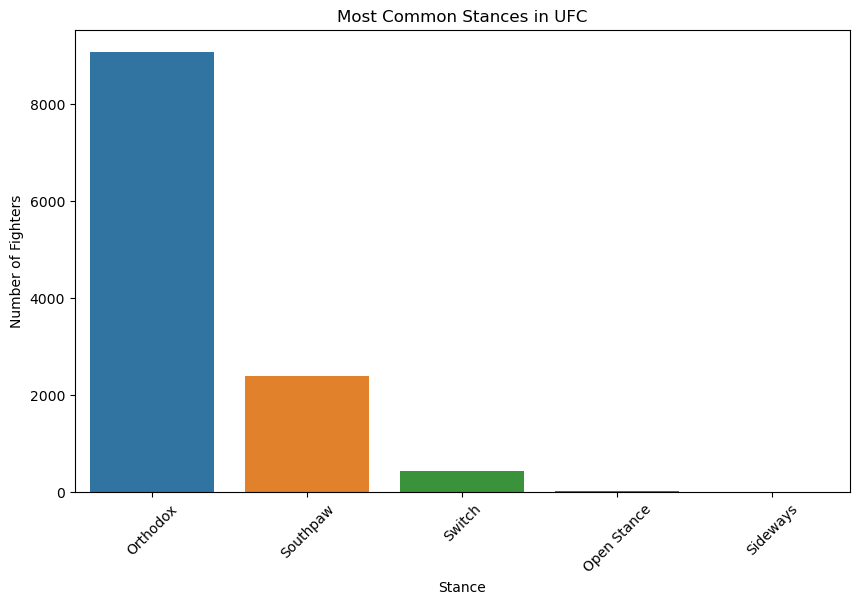

In [95]:
# Combine the stances of both Red and Blue fighters
all_stances = UFC['R_Stance'].append(UFC['B_Stance'])

# Get the value counts of each stance
stance_counts = all_stances.value_counts()

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=stance_counts.index, y=stance_counts.values)
plt.title('Most Common Stances in UFC')
plt.xlabel('Stance')
plt.ylabel('Number of Fighters')
plt.xticks(rotation=45)
plt.show()


In [96]:
# I chose mode because Orthodox tends to be the most common
from statistics import mode 
b_stance_mode = UFC['B_Stance'].mode()[0]
r_stance_mode = UFC['R_Stance'].mode()[0]

UFC['B_Stance'] = UFC['B_Stance'].fillna(b_stance_mode)
UFC['R_Stance'] = UFC['R_Stance'].fillna(r_stance_mode)



In [97]:
UFC[['R_Height','B_Height','R_Reach','B_Reach','R_Weight','B_Weight','R_age','B_age']].isna().sum()

R_Height      0
B_Height      0
R_Reach     406
B_Reach     891
R_Weight      2
B_Weight      8
R_age         0
B_age         0
dtype: int64

In [98]:
UFC['R_Weight'] = UFC['R_Weight'].fillna(UFC['R_Weight'].mean())
UFC['B_Weight'] = UFC['B_Weight'].fillna(UFC['B_Weight'].mean())
UFC['R_Reach'] = UFC['R_Reach'].fillna(UFC['R_Reach'].mean())
UFC['B_Reach'] = UFC['B_Reach'].fillna(UFC['B_Reach'].mean())


In [99]:
UFC[['R_Height','B_Height','R_Reach','B_Reach','R_Weight','B_Weight','R_age','B_age']].isna().sum()

R_Height    0
B_Height    0
R_Reach     0
B_Reach     0
R_Weight    0
B_Weight    0
R_age       0
B_age       0
dtype: int64

##### Getting The Unique Amount of Fighters

In [100]:
unique_red_fighters = UFC['R_fighter'].unique()
unique_blue_fighters = UFC['B_fighter'].unique()

In [101]:
# This represents all the unique fighters in the data set
all_unique_fighters = len(set(unique_red_fighters) | set(unique_blue_fighters))
all_unique_fighters

2139

In [102]:
UFC.T

0                     1     \
R_fighter                   Adrian Yanez          Trevin Giles   
B_fighter                  Gustavo Lopez         Roman Dolidze   
R_KD                                   2                     0   
B_KD                                   0                     0   
R_SIG_STR_pct                       0.39                  0.47   
B_SIG_STR_pct                       0.45                  0.47   
R_TD_pct                             0.0                   0.5   
B_TD_pct                             0.0                  0.33   
R_SUB_ATT                              0                     1   
B_SUB_ATT                              0                     2   
R_REV                                  0                     0   
B_REV                                  0                     1   
R_CTRL                              0:03                  1:15   
B_CTRL                              0:00                  4:15   
win_by                            KO/TKO  Decision - Unanimous   
last_round                             3                     3   
last_round_time                     0:27                  5:00   
Format                     3 Rnd (5-5-5)         3 Rnd (5-5-5)   
Referee                    Chris Tognoni             Herb Dean   
Month                             20-Mar                20-Mar   
Year                                2021                  2021   
City                           Las Vegas             Las Vegas   
State                             Nevada                Nevada   
Country                              USA                   USA   
Fight_Type             Bantamweight Bout     Middleweight Bout   
Winner                               Red                   Red   
R_SIG_STR._att                       103                    57   
R_SIG_STR._landed                     41                    27   
B_SIG_STR._att                        51                    67   
B_SIG_STR._landed                     23                    32   
R_TOTAL_STR._att                     103                    73   
R_TOTAL_STR._landed                   41                    43   
B_TOTAL_STR._att                      51                   110   
B_TOTAL_STR._landed                   23                    75   
R_TD_att                               0                     2   
R_TD_landed                            0                     1   
B_TD_att                               1                     3   
B_TD_landed                            0                     1   
R_HEAD_att                            83                    51   
R_HEAD_landed                         32                    22   
B_HEAD_att                            40                    37   
B_HEAD_landed                         14                    10   
R_BODY_att                            19                     4   
R_BODY_landed                          8                     4   
B_BODY_att                             7                    14   
B_BODY_landed                          5                     7   
R_LEG_att                              1                     2   
R_LEG_landed                           1                     1   
B_LEG_att                              4                    16   
B_LEG_landed                           4                    15   
R_DISTANCE_att                       102                    42   
R_DISTANCE_landed                     41                    15   
B_DISTANCE_att                        51                    59   
B_DISTANCE_landed                     23                    28   
R_CLINCH_att                           0                     5   
R_CLINCH_landed                        0                     4   
B_CLINCH_att                           0                     6   
B_CLINCH_landed                        0                     3   
R_GROUND_att                           1                    10   
R_GROUND_landed                        0                     8   
B_GROUND_a

In [103]:
# Back Up purposes.
# df2 = UFC.copy()

## UFC Fights Visualization

##### Events Per Year

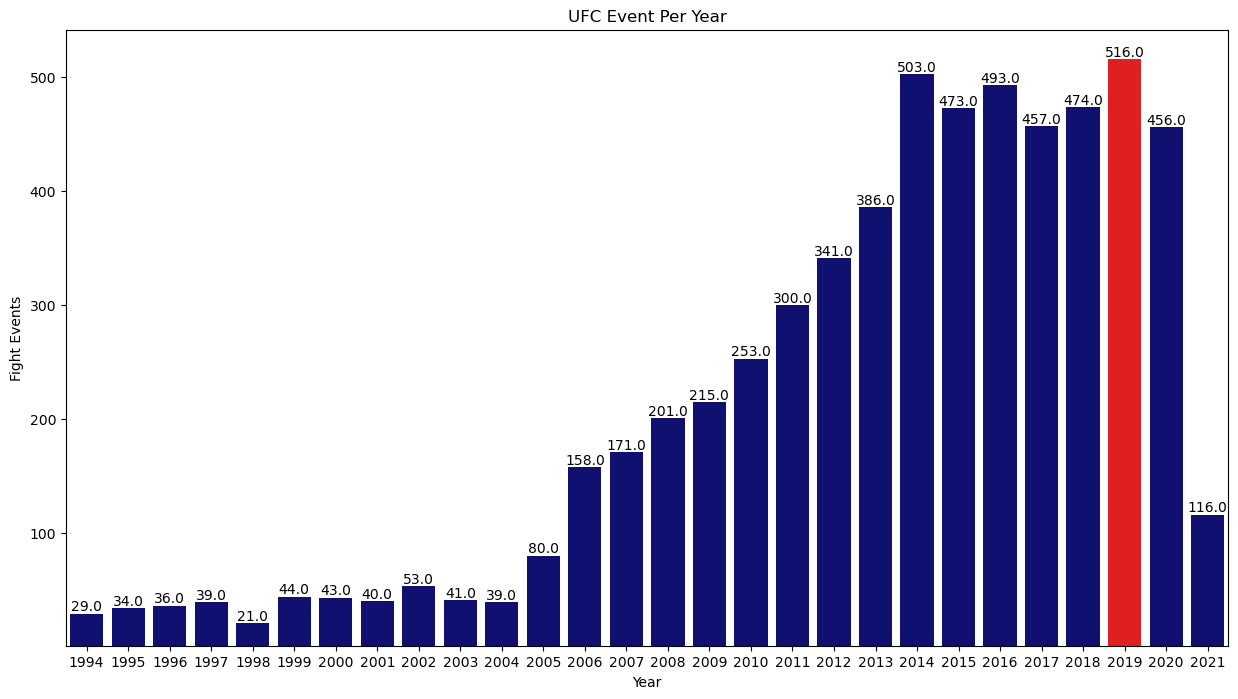

In [104]:
values = UFC['Year'].sort_values(ascending=False).value_counts().sort_index()
labels = values.index

clrs = ['navy' if (y < max(values)) else 'red' for y in values ]

plt.figure(figsize=(15,8))
bar = sns.barplot(x=labels, y=values, palette=clrs)


ax = plt.gca()
y_max = values.max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Fight Events')
plt.title('UFC Event Per Year')
plt.show()

**Feedback**: The UFC grew in popularity and saw a steady consistent rise in Events per year From 2004 - 2014. An Impressive 10 years of growth. It also shows that it reached its peak in 2019. 2021 is less simply because the data set ends in March 2021 and also 2020-2021 there was a covid crisis.

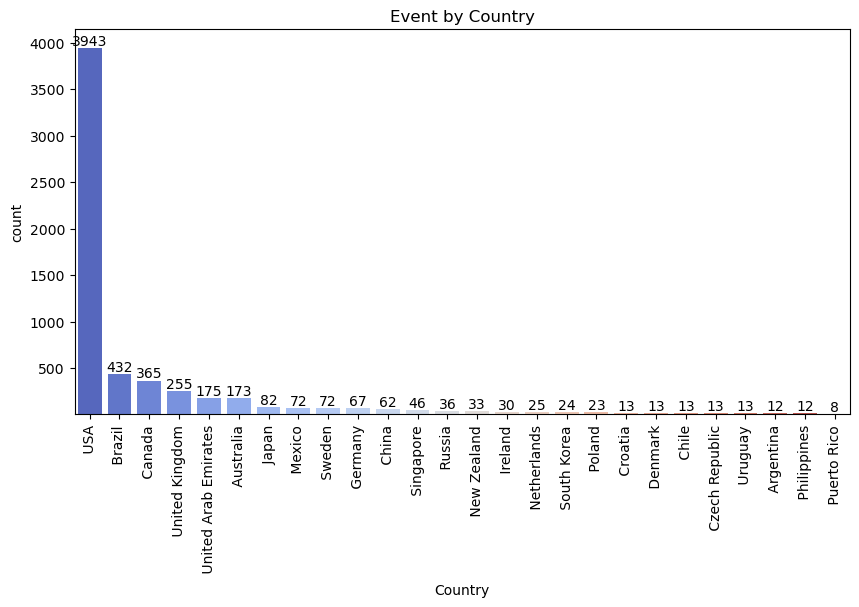

In [105]:
order = UFC['Country'].value_counts(ascending=False).index
plt.figure(figsize=(10,5))
bar = sns.countplot(x = UFC['Country'], order=order, palette='coolwarm')
plt.xticks(rotation=90)
ax = plt.gca()
y_max = UFC['Country'].value_counts().max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize=10, color='black', ha='center', va='bottom')

plt.title('Event by Country')    
plt.show()

**Feedback:** USA has the most fights followed by Brazil and Canada. An opportunity for growth as the US is too concentrated. Opportunity for business expansion in other parts of the world as the world is more connected than ever thanks to the internet and relatively peaceful times.

##### Height and Reach correlation

Obviously makes sense but just for visualization.

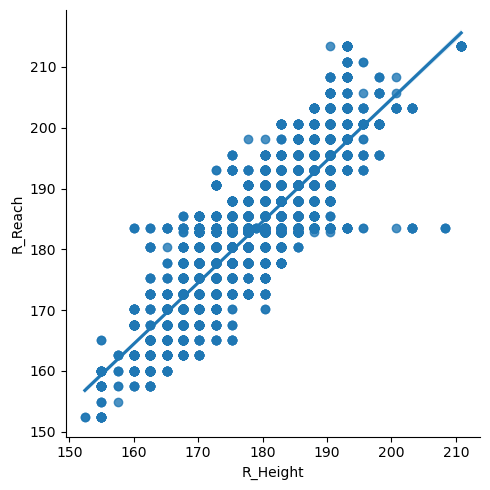

In [106]:
sns.lmplot(x='R_Height', y='R_Reach', data=UFC)
plt.show()

##### Stance Distribution

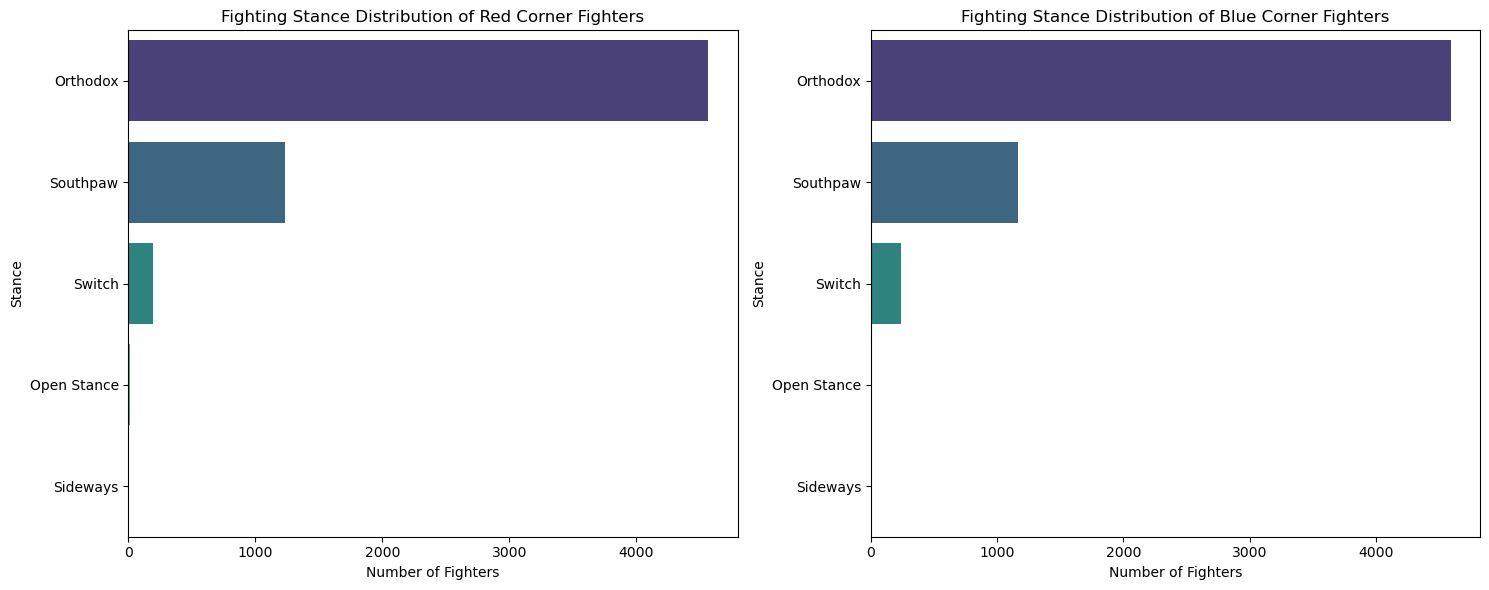

In [107]:
# Visualizing the distribution of fighting stances for both Red and Blue corner fighters
plt.figure(figsize=(15, 6))

# Countplot for Red corner fighters' stance
plt.subplot(1, 2, 1)
sns.countplot(y=UFC['R_Stance'], order=UFC['R_Stance'].value_counts().index, palette="viridis")
plt.title('Fighting Stance Distribution of Red Corner Fighters')
plt.xlabel('Number of Fighters')
plt.ylabel('Stance')

# Countplot for Blue corner fighters' stance
plt.subplot(1, 2, 2)
sns.countplot(y=UFC['B_Stance'], order=UFC['B_Stance'].value_counts().index, palette="viridis")
plt.title('Fighting Stance Distribution of Blue Corner Fighters')
plt.xlabel('Number of Fighters')
plt.ylabel('Stance')

plt.tight_layout()
plt.show()


A **fighting stance** is a position in which a player stands, especially when playing a sport, to deliver blows, punches, and kicks at the enemy while dodging their attacks.

Stances are the distribution, foot orientation, and body positions adopted when attacking, defending, advancing, or retreating.
 
A fighter is said to be in an **Orthodox Position** when their **left foot is in front of their right foot**. This is the most common fighting stance since it’s designed for right-handed people as most people are right-handed).

So it could just be due to the fact that most fighters are right handed.

An **Unorthodox (Southpaw)** foundation is the reverse. It involves using your right foot as your front foot and keeping your left foot behind. This stance typically feels more natural for left-handed fighters. 

A person who is comfortable fighting in the orthodox or unorthodox stance is called a **Switch Fighter**. The ability to use both stances allows you to mix things up to a greater extent and more effectively penetrate your opponent’s defense.

##### Visualization Of Decisions

In [108]:
UFC['win_by'].value_counts()

Decision - Unanimous       2097
KO/TKO                     1905
Submission                 1211
Decision - Split            568
TKO - Doctor's Stoppage      80
Decision - Majority          66
Overturned                   48
DQ                           18
Could Not Continue           17
Other                         2
Name: win_by, dtype: int64

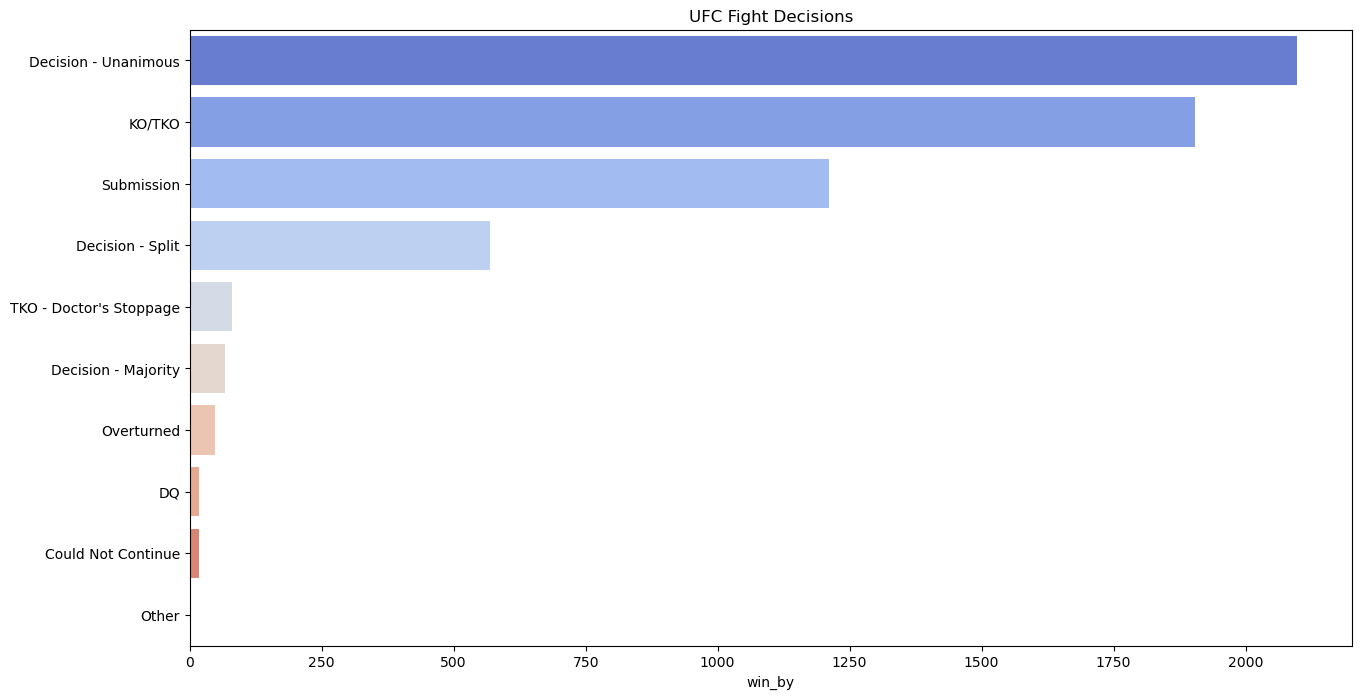

In [109]:
values = UFC['win_by'].value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values,y=labels, palette='coolwarm')

plt.title('UFC Fight Decisions')
plt.show()

##### Fighter Division Visualization

Text(0.5, 1.0, 'Weight Class Fights')

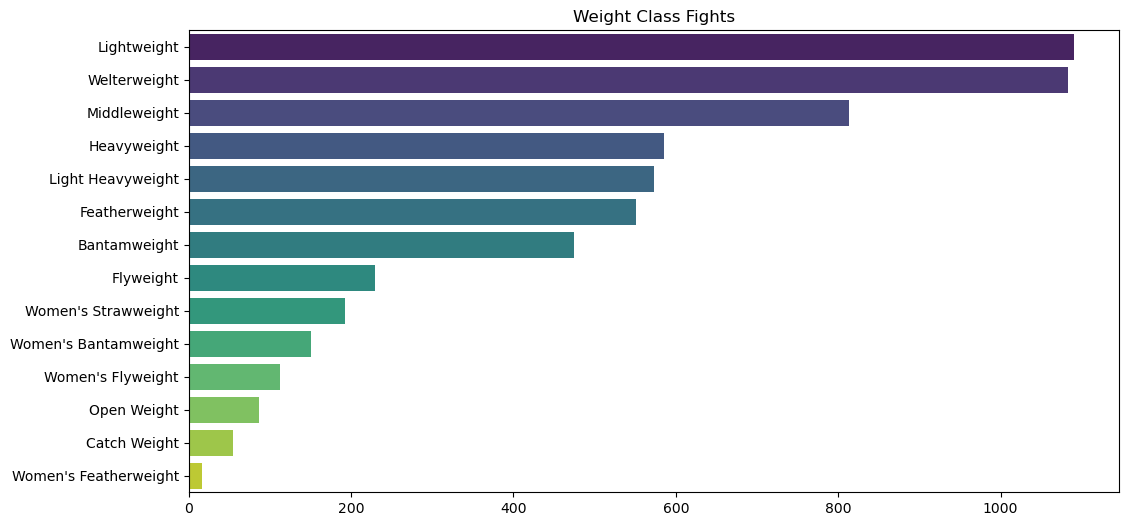

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(y=weight.index, x=weight.values, palette='viridis')
plt.title('Weight Class Fights')

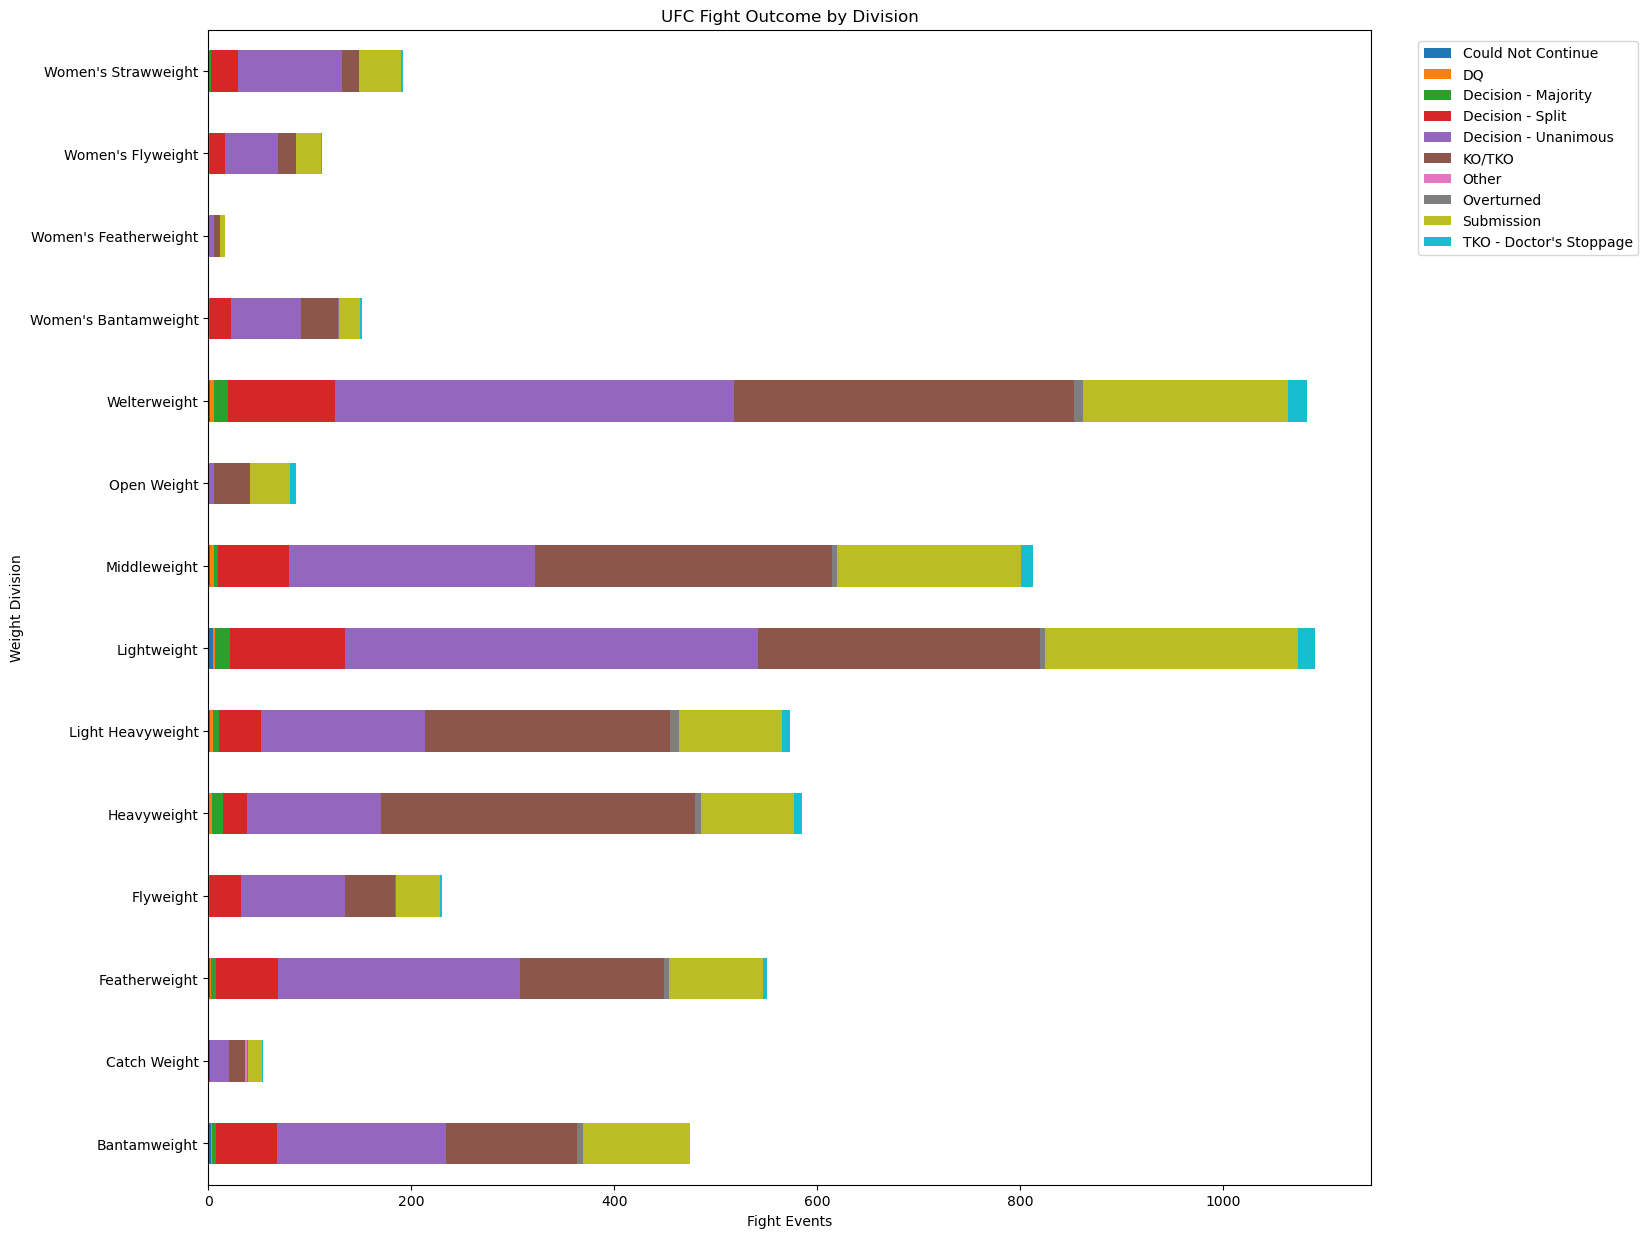

In [111]:
bar = UFC.groupby(['weight_class', 'win_by']).size().reset_index().pivot(columns='win_by', index='weight_class', values=0)

bar.plot(kind='barh', stacked=True, figsize=(15,15))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome by Division')
plt.xlabel('Fight Events')
plt.ylabel('Weight Division')
plt.show()

**Feedback:** This graph illustrates how the **win_by** is distributed amongst the divisions

In [112]:
UFC[['R_fighter', 'B_fighter','Year','weight_class']][UFC['weight_class'] == 'Open Weight' ]

R_fighter            B_fighter  Year weight_class
5811  Kenichi Yamamoto         Daiju Takase  1999  Open Weight
5815   Katsuhisa Fujii       Masutatsu Yano  1999  Open Weight
5913      David Abbott          Cal Worsham  1996  Open Weight
5914      David Abbott        Steve Nelmark  1996  Open Weight
5915     Kimo Leopoldo        Paul Varelans  1996  Open Weight
5917          Don Frye       Gary Goodridge  1996  Open Weight
5918          Don Frye            Mark Hall  1996  Open Weight
5919      Ken Shamrock       Brian Johnston  1996  Open Weight
5920    Scott Ferrozzo         David Abbott  1996  Open Weight
5921      Mark Coleman       Brian Johnston  1996  Open Weight
5922    Brian Johnston           Reza Nasri  1996  Open Weight
5923      Mark Coleman       Julian Sanchez  1996  Open Weight
5924      David Abbott           Sam Adkins  1996  Open Weight
5925   Jerry Bohlander         Fabio Gurgel  1996  Open Weight
5926          Don Frye       Brian Johnston  1996  Open Weight
5927          Don Frye            Mark Hall  1996  Open Weight
5928      Mark Coleman      Moti Horenstein  1996  Open Weight
5930      Mark Coleman       Gary Goodridge  1996  Open Weight
5931    Gary Goodridge      John Campetella  1996  Open Weight
5932    Brian Johnston        Scott Fiedler  1996  Open Weight
5933       Geza Kalman        Dieusel Berto  1996  Open Weight
5935     Steve Nelmark           Tai Bowden  1996  Open Weight
5936          Don Frye       Amaury Bitetti  1996  Open Weight
5937         Mark Hall           Koji Kitao  1996  Open Weight
5938       Cal Worsham         Zane Frazier  1996  Open Weight
5939     Rafael Carino        Matt Andersen  1996  Open Weight
5940      Mark Schultz       Gary Goodridge  1996  Open Weight
5941     Paul Varelans          Joe Moreira  1996  Open Weight
5943    Gary Goodridge      Jerry Bohlander  1996  Open Weight
5944   Jerry Bohlander       Scott Ferrozzo  1996  Open Weight
5945          Don Frye           Sam Adkins  1996  Open Weight
5946    Gary Goodridge         Paul Herrera  1996  Open Weight
5948          Don Frye       Thomas Ramirez  1996  Open Weight
5949        Dan Severn         David Abbott  1995  Open Weight
5950     Oleg Taktarov           Marco Ruas  1995  Open Weight
5951        Marco Ruas        Keith Hackney  1995  Open Weight
5952      David Abbott         Steve Jennum  1995  Open Weight
5954        Dan Severn        Paul Varelans  1995  Open Weight
5955     Oleg Taktarov        Dave Beneteau  1995  Open Weight
5958        Marco Ruas        Larry Cureton  1995  Open Weight
5959         Mark Hall        Harold Howard  1995  Open Weight
5960     Paul Varelans         Gerry Harris  1995  Open Weight
5961     Paul Varelans            Mark Hall  1995  Open Weight
5962        Marco Ruas        Remco Pardoel  1995  Open Weight
5963     Remco Pardoel          Ryan Parker  1995  Open Weight
5964      Scott Bessac           David Hood  1995  Open Weight
5965     Oleg Taktarov        Dave Beneteau  1995  Open Weight
5968      David Abbott        Paul Varelans  1995  Open Weight
5969     Paul Varelans          Cal Worsham  1995  Open Weight
5970     Oleg Taktarov       Anthony Macias  1995  Open Weight
5971      David Abbott           John Matua  1995  Open Weight
5972     Patrick Smith      Rudyard Moncayo  1995  Open Weight
5973       Todd Medina        Larry Cureton  1995  Open Weight
5975     Dave Beneteau          Todd Medina  1995  Open Weight
5976     Oleg Taktarov       Ernie Verdicia  1995  Open Weight
5977        Dan Severn        Oleg Taktarov  1995  Open Weight
5978        Dan Severn          Joe Charles  1995  Open Weight
5980          Jon Hess        Andy Anderson  1995  Open Weight
5981        Guy Mezger           John Dowdy  1995  Open Weight
5982     Dave Beneteau         Asbel Cancio  1995  Open Weight
5984        Dan Severn       Anthony Macias  1994  Open Weight
5985      Steve Jennum         Melton Bowen  1994  Open Weight
5986      Royce Gracie        Ron van Clief 

**Fun Fact**: The Open Weight Rule was stopped in the late 90s.

An open weight fight is a match where there are no weight restrictions between the fighters. This means that the fighters can have a significant weight difference, and the fight is not confined to the traditional weight classes. Open weight fights are relatively rare in modern MMA organizations due to concerns about fairness and safety.

This in turn led to more competitive fights as and an increase in events per year.

Please see the below graph.

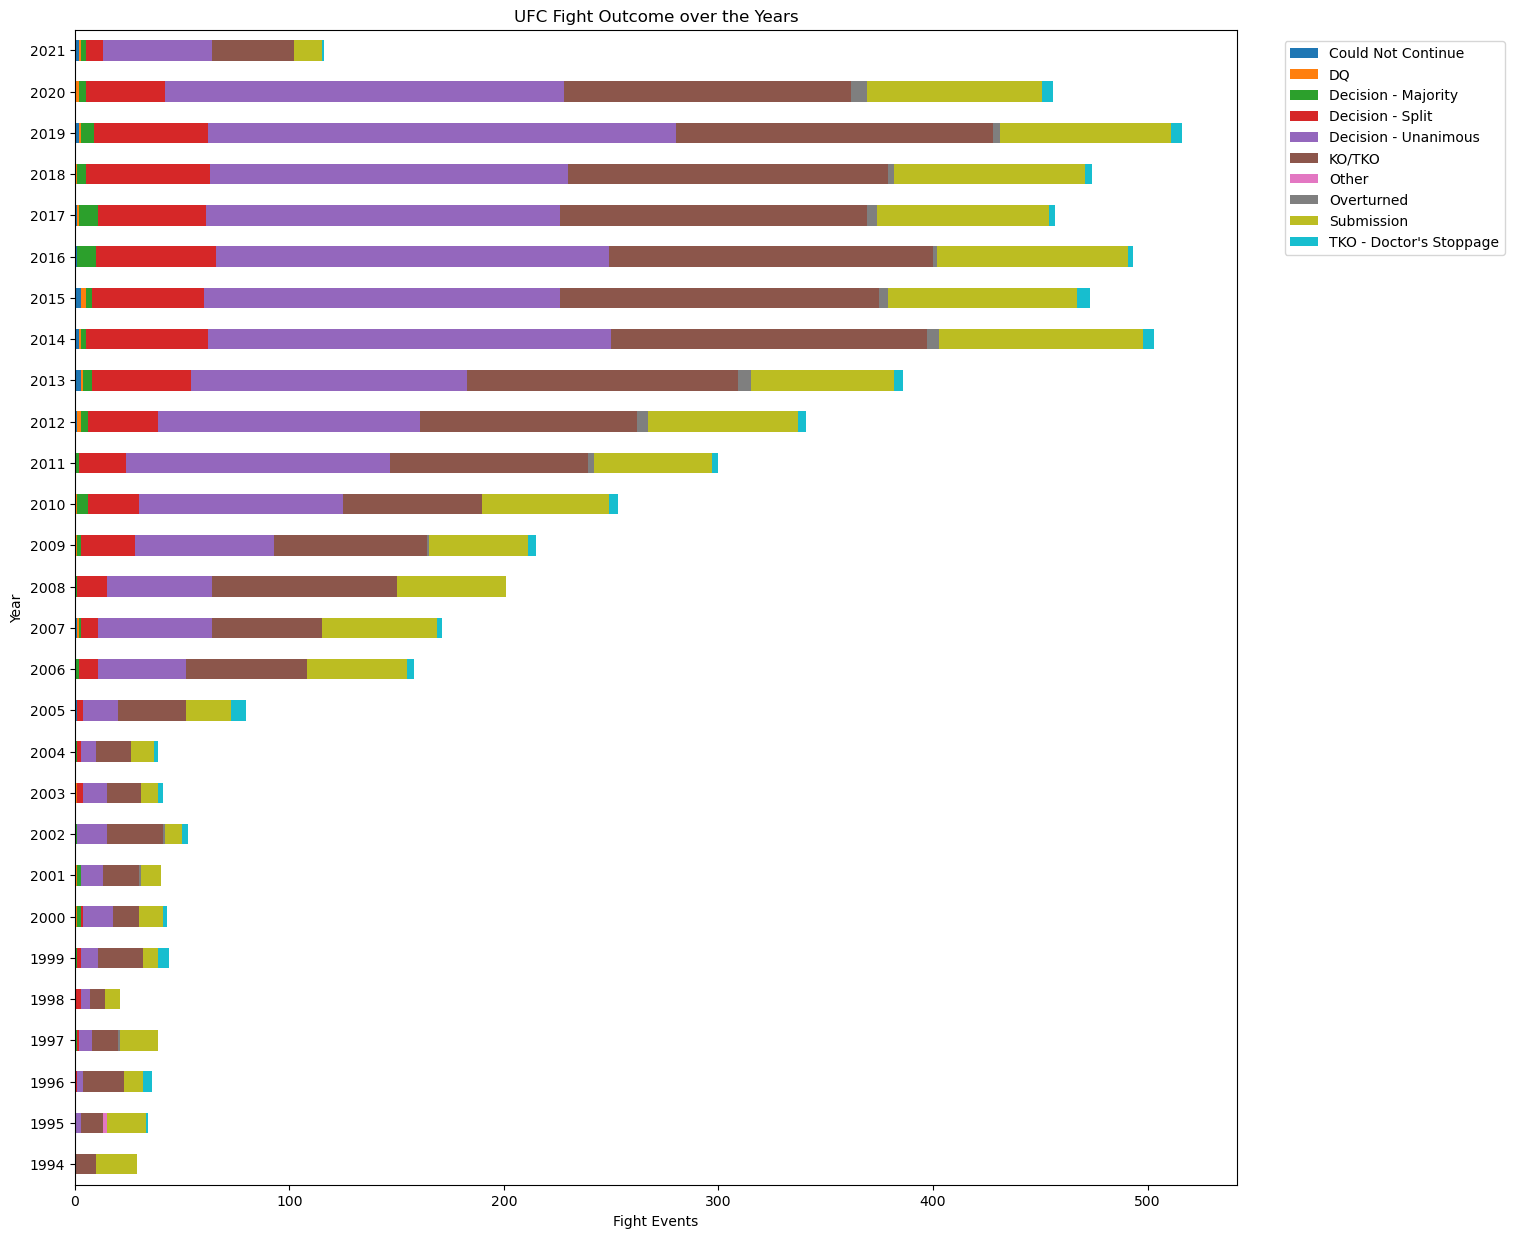

In [113]:
bar = UFC.groupby(['Year', 'win_by']).size().reset_index().pivot(columns='win_by', index='Year', values=0)
bar.plot(kind='barh', stacked=True, figsize=(15,15))
plt.legend(bbox_to_anchor=(1.23, 0.99), loc=1, borderaxespad=0.)
plt.title('UFC Fight Outcome over the Years')
plt.xlabel('Fight Events')
plt.ylabel('Year')
plt.show()

**Key Insights**: In the 90s since there was an Open Weight there were more KOs and Submissions. This suggests that the fights were generally unfair. 

However due to weight classes becoming an official rule, this then led to more competitive fights and fair fights. The graph above illustrates the steady increase in events and Decision Based Outcomes. 

### Fighters Info

##### Fighters Age Distribution

R_age = Red Fighters Age
B_age = Blue Fighters Age

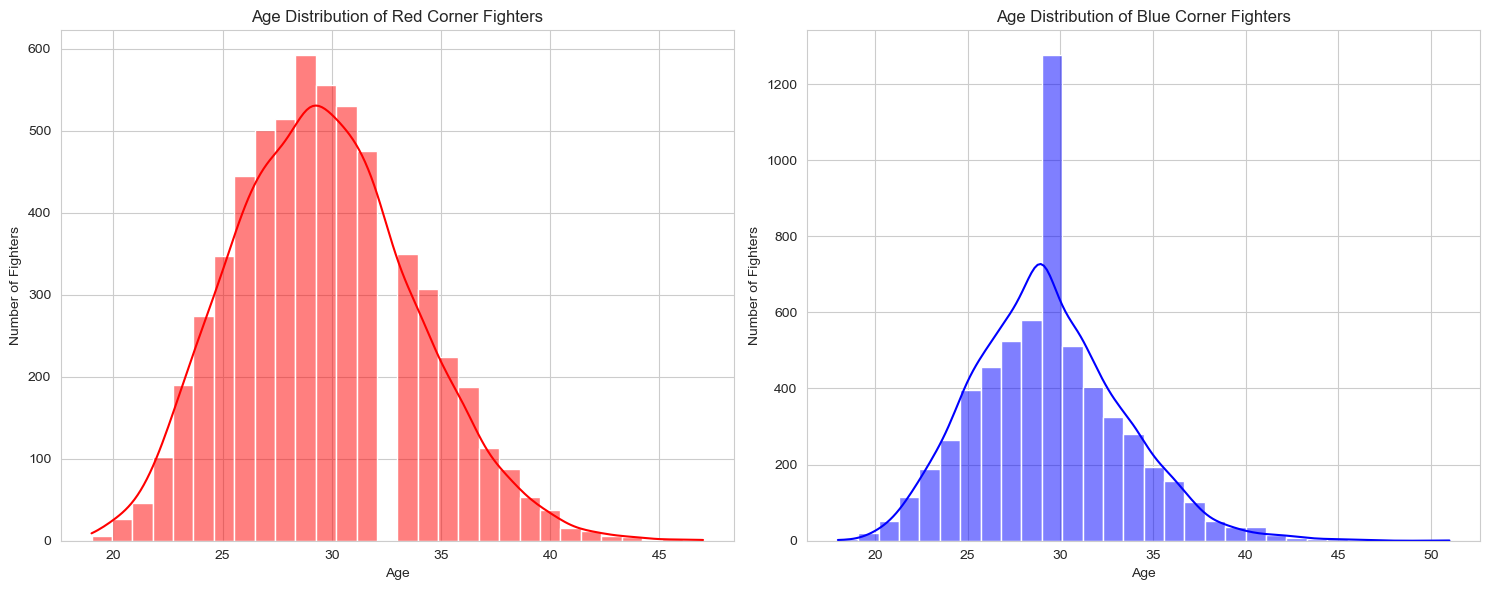

In [114]:


# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Visualizing the distribution of ages for fighters
plt.figure(figsize=(15, 6))

# Histogram for Red corner fighters
plt.subplot(1, 2, 1)
sns.histplot(UFC['R_age'], bins=30, kde=True, color='red')
plt.title('Age Distribution of Red Corner Fighters')
plt.xlabel('Age')
plt.ylabel('Number of Fighters')

# Histogram for Blue corner fighters
plt.subplot(1, 2, 2)
sns.histplot(UFC['B_age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Blue Corner Fighters')
plt.xlabel('Age')
plt.ylabel('Number of Fighters')

plt.tight_layout()
plt.show()


The majority of fighters fall within the age range of 27 to 35 years, as age holds significant importance in the realm of UFC. Within UFC, a fighter's prowess is influenced by a combination of attributes such as strength, agility, and speed, among others. These attributes tend to reach their peak performance between the ages of 27 and 35. Fighters within this age bracket are more likely to possess the optimal qualities for securing victory in matches.

To verify this assertion, we will categorize the ages of both the Red and Blue fighters who have emerged victorious in their fights.

/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


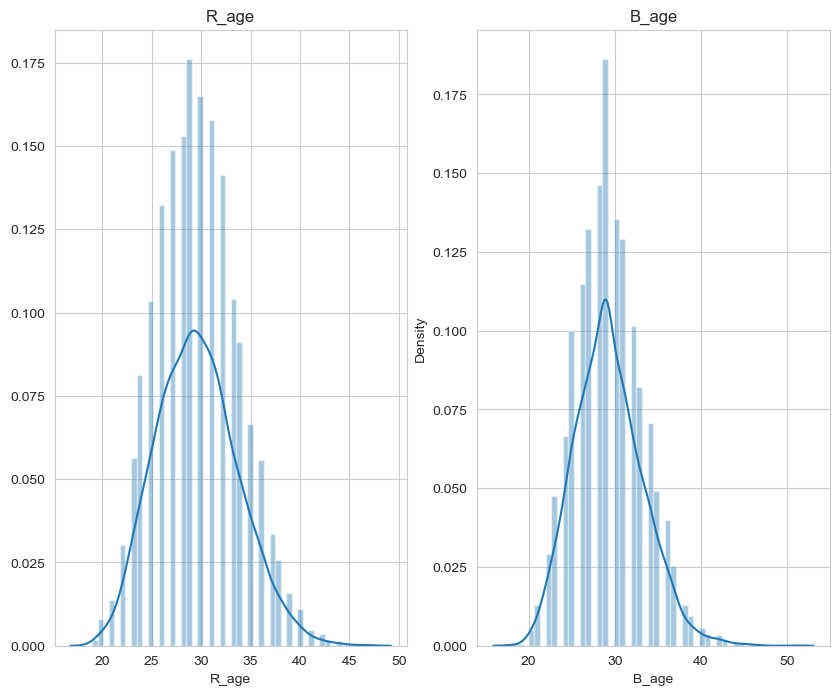

In [115]:
f,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(UFC['R_age'], ax=ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('')
hist = sns.distplot(UFC['B_age'],ax=ax[1])

ax[1].set_title('B_age')
plt.show()

##### Age of Winners

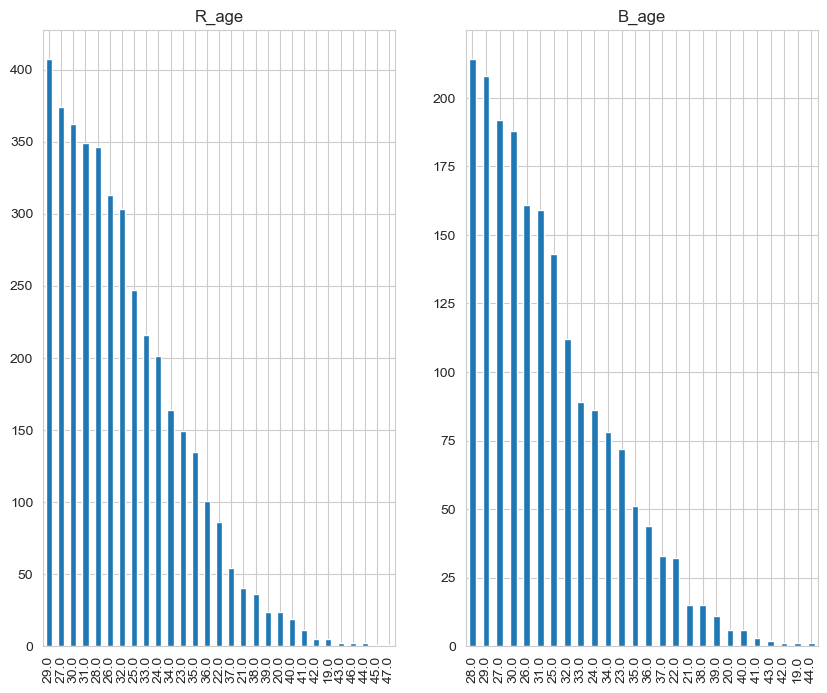

In [116]:
f,ax=plt.subplots(1,2,figsize=(10,8))
UFC[UFC['Winner']=='Red']['R_age'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('')
bar = UFC[UFC['Winner']=='Blue']['B_age'].value_counts().plot.bar(ax=ax[1])

ax[1].set_title('B_age')
plt.show()

An observable trend within the realm of mixed martial arts is that fighters within the age bracket of approximately 27 to 35 years old exhibit a higher frequency of victories. This phenomenon underscores the pivotal role of age as a determinant of success in competitive fighting disciplines. The age range of 27 to 35 is notably characterized by a culmination of physical attributes, skill acquisition, and mental acuity, which collectively contribute to enhanced performance on the arena.

This observation, indicative of a consistent association between the age range of 27 to 35 and a higher prevalence of victories, further accentuates the nuanced interplay between biological maturation, training, and tactical execution in the competitive landscape of mixed martial arts.

##### Efficiency Insights

Strike Effectiveness= 
Strikes Attempted/
Strikes Landed
​


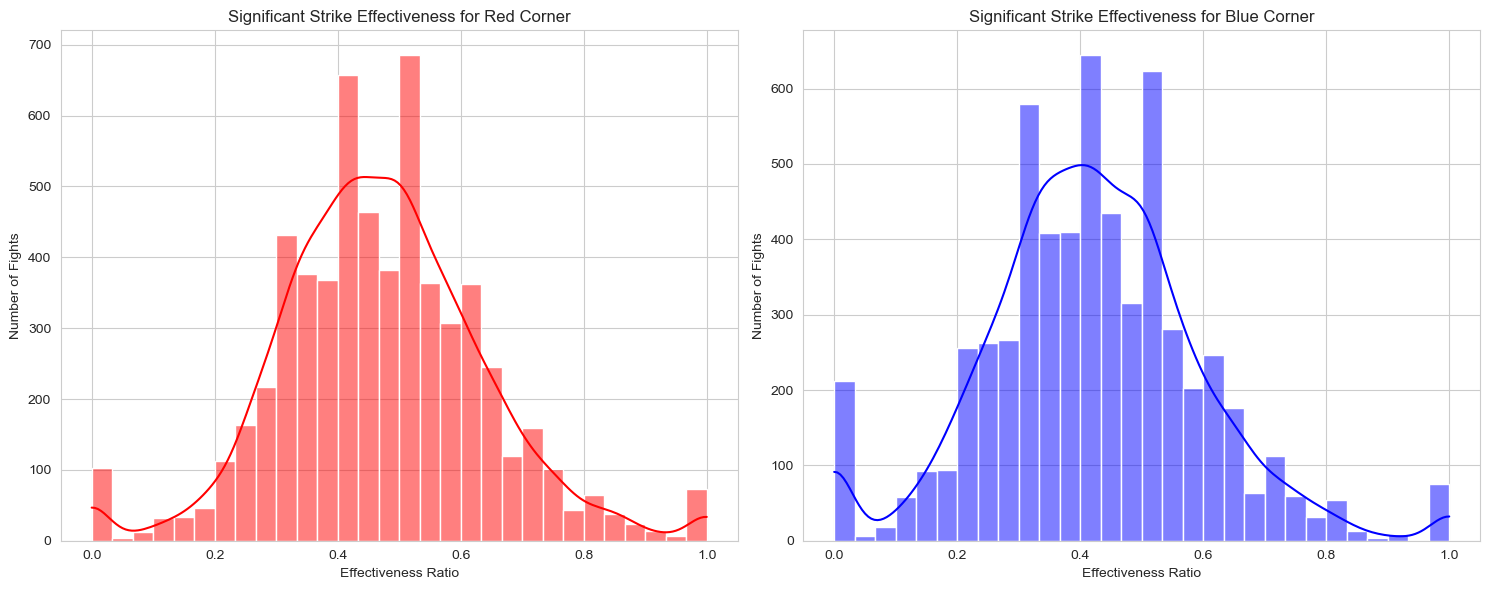

In [117]:

# Plotting the distribution of significant strike effectiveness
plt.figure(figsize=(15, 6))

# Red corner significant strike effectiveness
plt.subplot(1, 2, 1)
sns.histplot(UFC['R_SIG_STR_pct'], bins=30, kde=True, color='red')
plt.title('Significant Strike Effectiveness for Red Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

# Blue corner significant strike effectiveness
plt.subplot(1, 2, 2)
sns.histplot(UFC['B_SIG_STR_pct'], bins=30, kde=True, color='blue')
plt.title('Significant Strike Effectiveness for Blue Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

plt.tight_layout()
plt.show()


The histograms depict the distribution of significant strike effectiveness for fighters in both the Red and Blue corners:

For both corners, the effectiveness is distributed mainly around the 0.4 to 0.6 range. This suggests that, on average, fighters tend to land about 40% to 60% of their significant strikes.
The Red corner has a slightly more pronounced peak around the 0.5 mark, while the Blue corner's distribution is slightly broader.
In essence, both corners exhibit similar patterns in terms of significant strike effectiveness, with a majority of fighters landing around half of their attempted significant strikes.

In UFC statistics:

- **Significant Strikes (Sig. Strikes):** These are strikes that have an impact and are considered meaningful in terms of scoring. These include punches, kicks, elbows, and knees that land on an opponent's head or body. These strikes are given more weight in judging because they are believed to have a greater influence on the outcome of the fight.

- **Total Strikes:** These include all strikes attempted, regardless of whether they are significant or not. This includes both landed and missed strikes, and it encompasses a wider range of strikes, such as jabs and leg kicks.

In summary, significant strikes are the more impactful strikes that have scoring value, while total strikes include all attempted strikes, whether they are impactful or not.

Creating a new column for Total Strike Efficiency

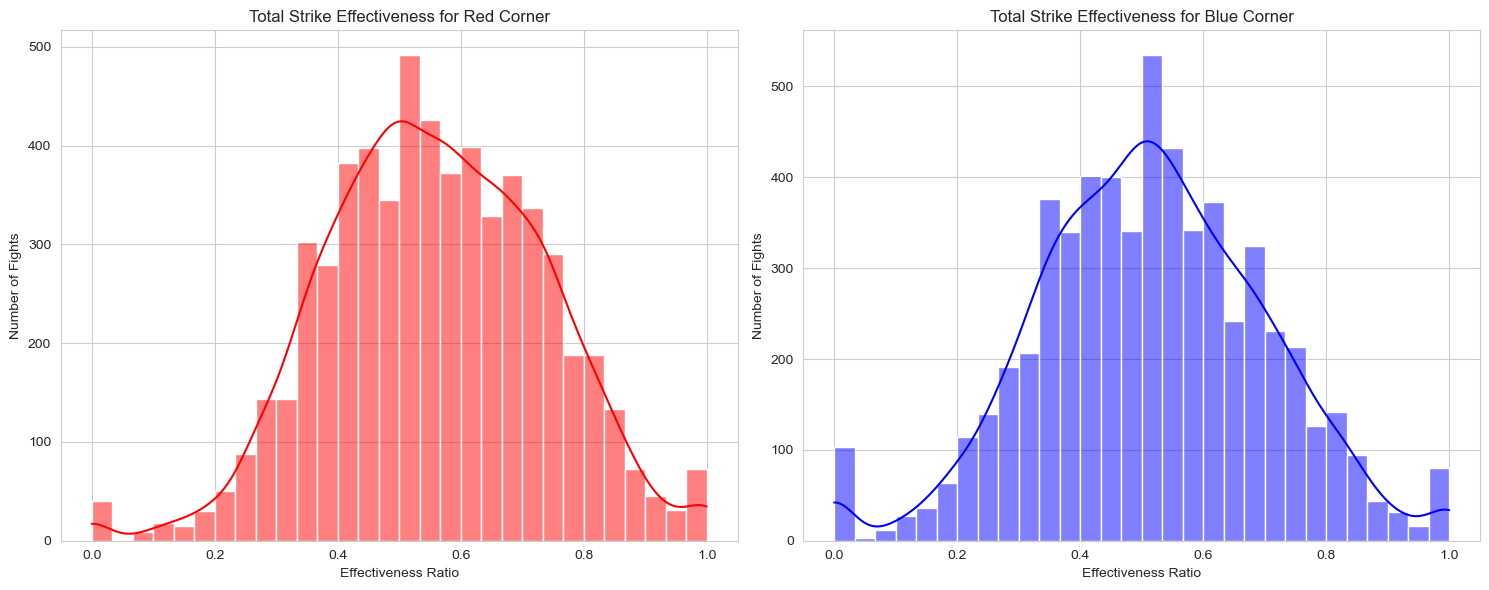

In [118]:
# Calculating total strike effectiveness for both corners
UFC['R_TOTAL_STR_Eff'] = UFC['R_TOTAL_STR._landed'] / UFC['R_TOTAL_STR._att']
UFC['B_TOTAL_STR_Eff'] = UFC['B_TOTAL_STR._landed'] / UFC['B_TOTAL_STR._att']

# Plotting the distribution of total strike effectiveness
plt.figure(figsize=(15, 6))

# Red corner total strike effectiveness
plt.subplot(1, 2, 1)
sns.histplot(UFC['R_TOTAL_STR_Eff'], bins=30, kde=True, color='red')
plt.title('Total Strike Effectiveness for Red Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

# Blue corner total strike effectiveness
plt.subplot(1, 2, 2)
sns.histplot(UFC['B_TOTAL_STR_Eff'], bins=30, kde=True, color='blue')
plt.title('Total Strike Effectiveness for Blue Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

plt.tight_layout()
plt.show()


The histograms present the distribution of total strike effectiveness for fighters in both the Red and Blue corners:

For the Red corner, we observe a peak around the 0.6 mark, suggesting that many fighters in this corner land approximately 60% of their total strikes.
The Blue corner displays a similar pattern, but with a slightly broader distribution and a peak around the 0.55 mark.
In general, when considering all types of strikes, fighters seem to have a slightly higher success rate compared to just significant strikes.

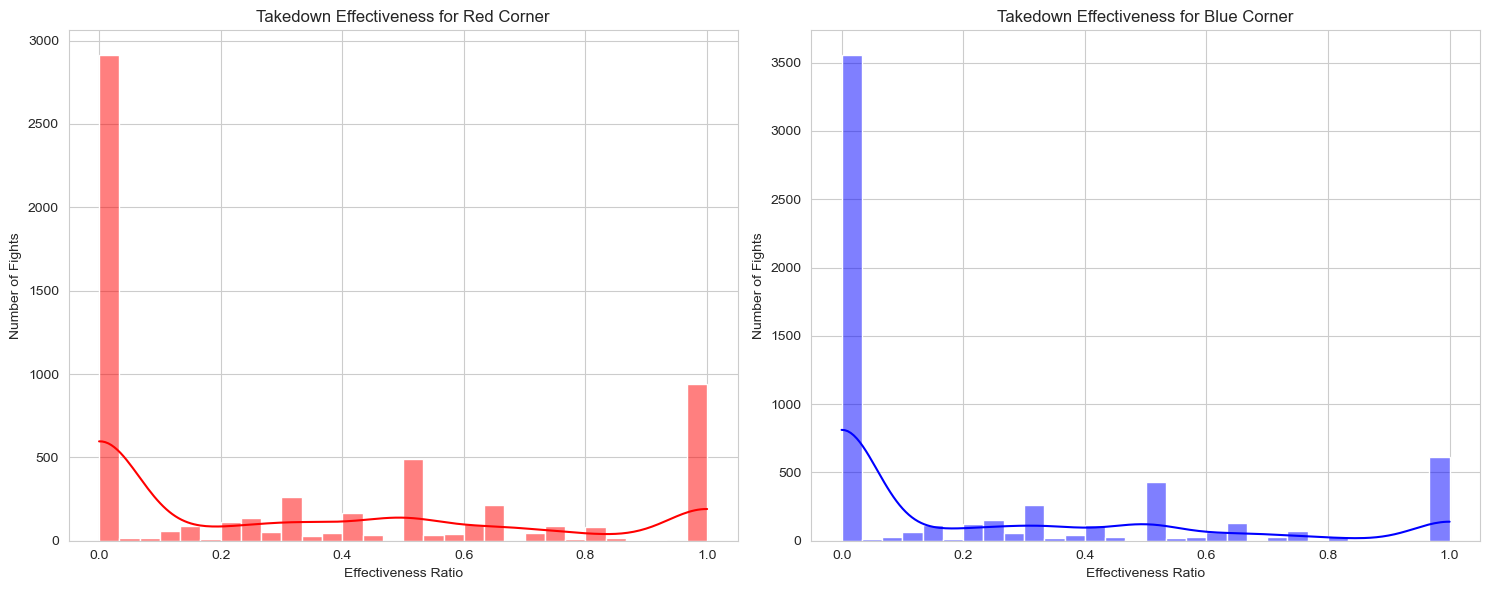

In [119]:
# Handling cases where takedown attempts are 0 to avoid NaN values
UFC['R_TD_pct'].fillna(0, inplace=True)
UFC['B_TD_pct'].fillna(0, inplace=True)

# Plotting the distribution of takedown effectiveness
plt.figure(figsize=(15, 6))

# Red corner takedown effectiveness
plt.subplot(1, 2, 1)
sns.histplot(UFC['R_TD_pct'], bins=30, kde=True, color='red')
plt.title('Takedown Effectiveness for Red Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

# Blue corner takedown effectiveness
plt.subplot(1, 2, 2)
sns.histplot(UFC['B_TD_pct'], bins=30, kde=True, color='blue')
plt.title('Takedown Effectiveness for Blue Corner')
plt.xlabel('Effectiveness Ratio')
plt.ylabel('Number of Fights')

plt.tight_layout()
plt.show()


The histograms display the distribution of takedown effectiveness for fighters in both the Red and Blue corners:

- For both corners, there's a significant peak at 0, indicating a large number of fights where takedown attempts were unsuccessful.

- There are other peaks observed around 1, indicating instances where all attempted takedowns were successful.

- Between these extremes, we see varied effectiveness, with some fighters having a 50% success rate or other ratios.

It's also worth noting that takedowns can significantly affect the outcome of a fight, as they can lead to ground control, submission attempts, and ground-and-pound striking.

##### Red vs Blue Win Distribution

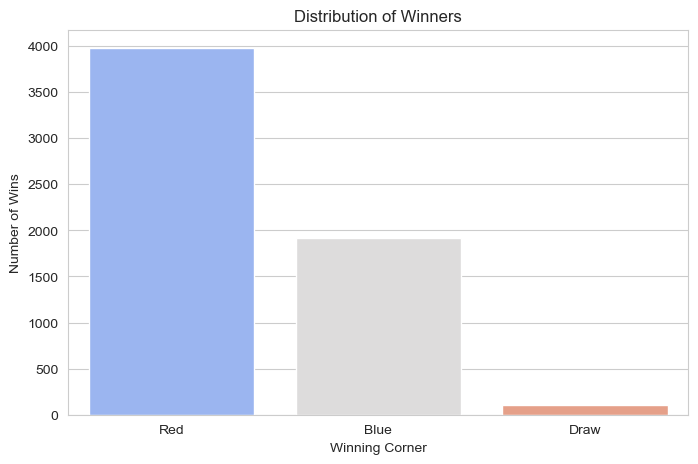

In [120]:
# Visualizing the distribution of winners
plt.figure(figsize=(8, 5))
sns.countplot(x=UFC['Winner'], palette="coolwarm")
plt.title('Distribution of Winners')
plt.ylabel('Number of Wins')
plt.xlabel('Winning Corner')
plt.show()

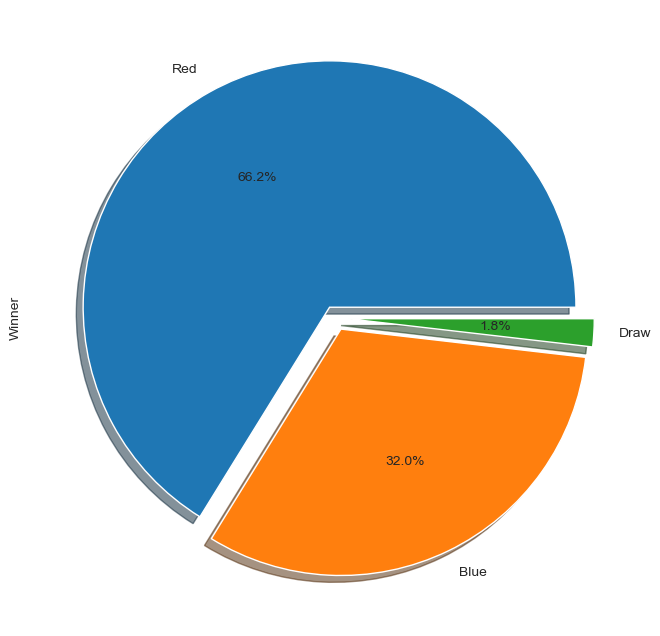

In [121]:
plt.figure(figsize=(8,8))
UFC['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

##### Number of fights per fighter

In [122]:
# This will stack the names list together.

Fighter = pd.concat([UFC['R_fighter'], UFC['B_fighter']], ignore_index=True)

In [123]:
Fighter.value_counts()

Donald Cerrone               36
Jim Miller                   36
Andrei Arlovski              34
Jeremy Stephens              33
Diego Sanchez                32
Demian Maia                  32
Rafael Dos Anjos             30
Clay Guida                   30
Michael Bisping              29
Gleison Tibau                28
Frankie Edgar                28
Matt Brown                   27
Frank Mir                    27
Joe Lauzon                   27
Thiago Alves                 27
Charles Oliveira             27
BJ Penn                      27
Tito Ortiz                   27
Vitor Belfort                26
Ross Pearson                 26
Dustin Poirier               25
Nik Lentz                    25
Nate Diaz                    25
Josh Koscheck                25
Nate Marquardt               25
Matt Hughes                  25
Anderson Silva               25
Ed Herman                    24
Neil Magny                   24
Tim Boetsch                  24
Randy Couture                24
Alex Cac

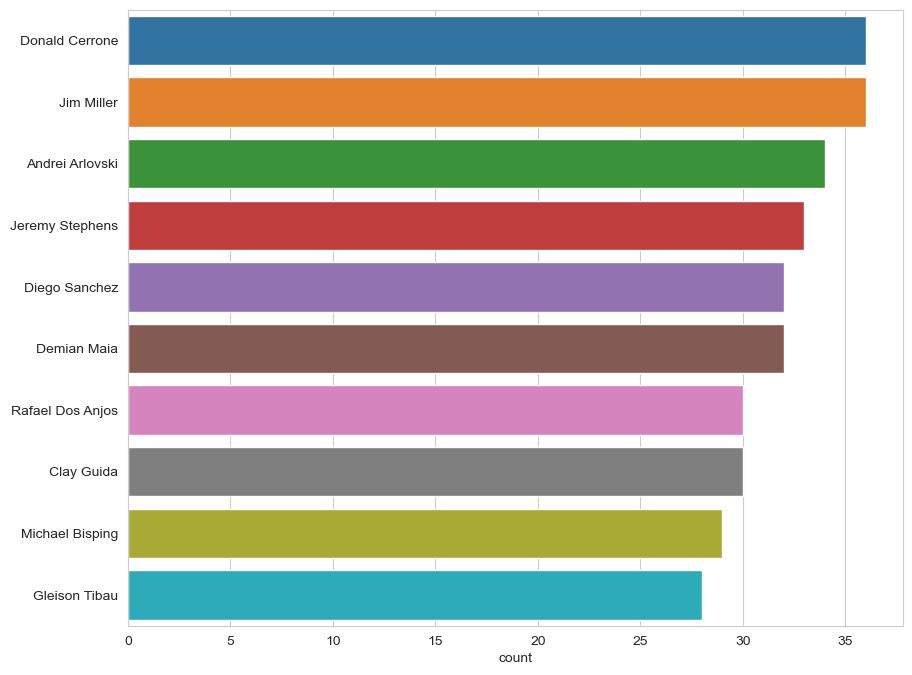

In [124]:
plt.figure(figsize=(10,8))
sns.countplot(y = Fighter, order=pd.value_counts(Fighter).iloc[:10].index)
plt.show()

In [125]:
UFC.head()

R_fighter          B_fighter  R_KD  B_KD  R_SIG_STR_pct  B_SIG_STR_pct  \
0   Adrian Yanez      Gustavo Lopez     2     0           0.39           0.45   
1   Trevin Giles      Roman Dolidze     0     0           0.47           0.47   
2    Tai Tuivasa    Harry Hunsucker     1     0           0.77           0.33   
3  Cheyanne Buys  Montserrat Conejo     0     0           0.47           0.36   
4  Marion Reneau      Macy Chiasson     0     0           0.47           0.36   

   R_TD_pct  B_TD_pct  R_SUB_ATT  B_SUB_ATT  ...  B_SApM  B_Str_Def B_TD_Avg  \
0       0.0      0.00          0          0  ...    4.65       0.51     1.07   
1       0.5      0.33          1          2  ...    1.75       0.61     1.75   
2       0.0      0.00          0          0  ...    8.44       0.41     0.00   
3       0.0      0.80          0          2  ...    2.07       0.52     4.00   
4       0.5      1.00          0          0  ...    2.17       0.46     0.98   

  B_TD_Acc B_TD_Def  B_Sub_Avg B_age R_age R_TOTAL_STR_Eff B_TOTAL_STR_Eff  
0     0.50     0.27        0.5  31.0  27.0        0.398058        0.450980  
1     0.50     0.33        2.2  32.0  28.0        0.589041        0.681818  
2     0.00     0.00        0.0  32.0  28.0        0.777778        0.333333  
3     0.80     0.00        2.0  28.0  25.0        0.563218        0.809524  
4     0.21     0.64        0.5  29.0  43.0        0.634409        0.500000  

[5 rows x 95 columns]

# Feature Engineering

### Further In Depth Analysis

In [126]:
# Mapping stances and winners to numeric values
# map_stance = {'Orthodox': 0, 'Switch': 1, 'Southpaw': 2, 'Open Stance': 3}
# UFC['B_Stance'] = UFC['B_Stance'].replace(map_stance)
# UFC['R_Stance'] = UFC['R_Stance'].replace(map_stance)

map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}
UFC['Winner'] = UFC['Winner'].replace(map_winner)

# Engineering the previously discussed features. abs was used to get the absolute value.
UFC['Height_Difference'] = abs(UFC['R_Height'] - UFC['B_Height'])
UFC['Reach_Difference'] = abs(UFC['R_Reach'] - UFC['B_Reach'])
UFC['Age_Difference'] = abs(UFC['R_age'] - UFC['B_age'])

In [127]:
# Just in case you forgot lol.
# map_winner = {'Red': 0, 'Blue': 1, 'Draw': 2}. Remember we did a map replacement. 

UFC['winner_reach_adv'] = ((UFC['Winner'] == 0) & (UFC['R_Reach'] > UFC['B_Reach'])) | ((UFC['Winner'] == 1) & (UFC['B_Reach'] > UFC['R_Reach']))
UFC['winner_age_adv'] = ((UFC['Winner'] == 0) & (UFC['R_age'] < UFC['B_age'])) | ((UFC['Winner'] == 1) & (UFC['B_age'] < UFC['R_age']))
UFC['winner_height_adv'] = ((UFC['Winner'] == 0) & (UFC['R_Height'] > UFC['B_Height'])) | ((UFC['Winner'] == 1) & (UFC['B_Height'] > UFC['R_Height']))



Check to see our new features

In [128]:
UFC[['R_Height', 'B_Height', 'Height_Difference', 'R_Reach', 'B_Reach', 'Reach_Difference', 'R_age', 'B_age', 'Age_Difference','Winner','winner_reach_adv','winner_age_adv','winner_height_adv']].head(20)

R_Height  B_Height  Height_Difference     R_Reach  B_Reach  \
0     170.18    165.10               5.08  177.800000   170.18   
1     182.88    187.96               5.08  187.960000   193.04   
2     187.96    187.96               0.00  190.500000   190.50   
3     160.02    152.40               7.62  160.020000   154.94   
4     167.64    180.34              12.70  172.720000   182.88   
5     182.88    177.80               5.08  190.500000   182.88   
6     182.88    180.34               2.54  180.340000   193.04   
7     185.42    190.50               5.08  195.580000   205.74   
8     177.80    170.18               7.62  190.500000   177.80   
9     182.88    165.10              17.78  183.562347   170.18   
10    165.10    167.64               2.54  172.720000   167.64   
11    190.50    195.58               5.08  195.580000   200.66   
12    187.96    180.34               7.62  187.960000   182.88   
13    175.26    172.72               2.54  175.260000   180.34   
14    185.42    182.88               2.54  190.500000   187.96   
15    160.02    170.18              10.16  162.560000   175.26   
16    172.72    172.72               0.00  177.800000   175.26   
17    170.18    167.64               2.54  180.340000   167.64   
18    177.80    170.18               7.62  182.880000   177.80   
19    170.18    165.10               5.08  170.180000   170.18   

    Reach_Difference  R_age  B_age  Age_Difference  Winner  winner_reach_adv  \
0           7.620000   27.0   31.0             4.0       0              True   
1           5.080000   28.0   32.0             4.0       0             False   
2           0.000000   28.0   32.0             4.0       0             False   
3           5.080000   25.0   28.0             3.0       1             False   
4          10.160000   43.0   29.0            14.0       1              True   
5           7.620000   41.0   27.0            14.0       1             False   
6          12.700000   31.0   35.0             4.0       1              True   
7          10.160000   37.0   28.0             9.0       0             False   
8          12.700000   28.0   29.0             1.0       0              True   
9          13.382347   31.0   24.0             7.0       0              True   
10          5.080000   27.0   28.0             1.0       1             False   
11          5.080000   34.0   29.0             5.0       1              True   
12          5.080000   29.0   32.0             3.0       2             False   
13          5.080000   25.0   32.0             7.0       0             False   
14          2.540000   33.0   30.0             3.0       2             False   
15         12.700000   36.0   33.0             3.0       0             False   
16          2.540000   26.0   35.0             9.0       1             False   
17         12.700000   29.0   34.0             5.0       0              True   
18          5.080000   25.0   26.0             1.0       0              True   
19          0.000000   33.0   28.0             5.0       1             False   

    winner_age_adv  winner_height_adv  
0             True               True  
1             True              False  
2             True              False  
3            False              False  
4             True               True  
5             True              False  
6            False              False  
7            False              False  
8             True               True  
9            False               True  
10           False               True  
11            True               True  
12           False              False  
13            True               True  
14           False              False  
15           False              False  
16           False              False  
17            True               True  
18            True               True  
19            True              False

/var/folders/wc/c_dv9b5122sdwx7sz_42kt100000gn/T/ipykernel_16748/3784221272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_df['Winner_Reach'] = winners_df.apply(lambda x: x['R_Reach'] if x['Winner'] == 0 else x['B_Reach'], axis=1)
/var/folders/wc/c_dv9b5122sdwx7sz_42kt100000gn/T/ipykernel_16748/3784221272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_df['Winner_Age'] = winners_df.apply(lambda x: x['R_age'] if x['Winner'] == 0 else x['B_age'], axis=1)
/var/folders/wc/c_dv9b5122sdwx

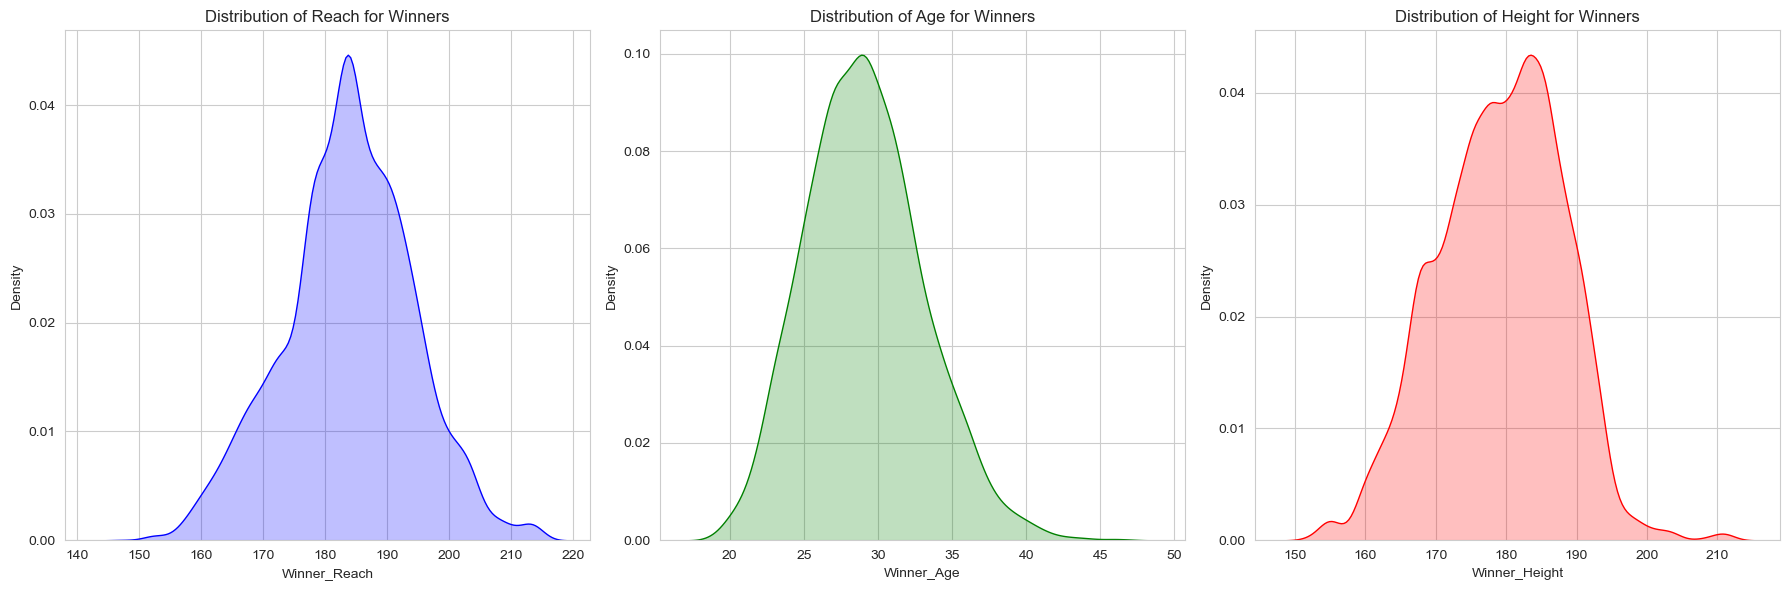

In [129]:
# Creating a new dataframe for winners
winners_df = UFC[UFC['Winner'] != 2]  # Excluding draws

# Creating new columns for winner's attributes
winners_df['Winner_Reach'] = winners_df.apply(lambda x: x['R_Reach'] if x['Winner'] == 0 else x['B_Reach'], axis=1)
winners_df['Winner_Age'] = winners_df.apply(lambda x: x['R_age'] if x['Winner'] == 0 else x['B_age'], axis=1)
winners_df['Winner_Height'] = winners_df.apply(lambda x: x['R_Height'] if x['Winner'] == 0 else x['B_Height'], axis=1)

# Plotting the distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(data=winners_df, x='Winner_Reach', ax=ax[0], shade=True, color='blue')
sns.kdeplot(data=winners_df, x='Winner_Age', ax=ax[1], shade=True, color='green')
sns.kdeplot(data=winners_df, x='Winner_Height', ax=ax[2], shade=True, color='red')

# Titles and labels
ax[0].set_title('Distribution of Reach for Winners')
ax[1].set_title('Distribution of Age for Winners')
ax[2].set_title('Distribution of Height for Winners')

plt.tight_layout()
plt.show()


Reach: Most winners seem to have a reach around the 70 to 75-inch mark.

Age: The age distribution indicates that most winners are in the age range of 25 to 35 years old.

Height: Most winners have a height around the 68 to 75-inch range.

These distributions give us an understanding of the typical physical attributes of winning fighters. However, it's important to remember that correlation does not imply causation. While these attributes might be common among winners, they are not necessarily the sole reasons for their victories.



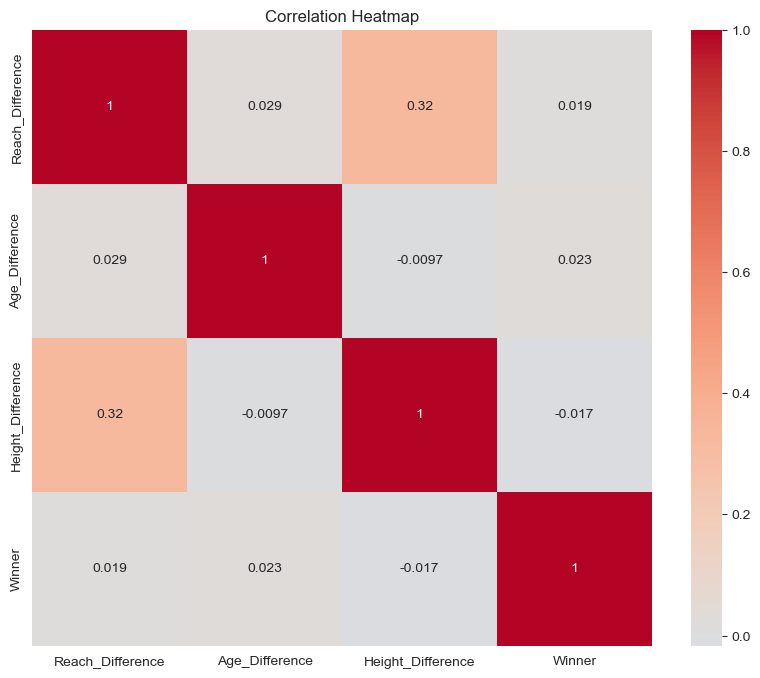

In [130]:
# Correlation matrix for the selected features and the Winner column
correlation_matrix = UFC[['Reach_Difference', 'Age_Difference', 'Height_Difference', 'Winner']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


These visualizations further emphasize the point that while these physical attributes (reach, age, and height) are important, they alone are not strong predictors of fight outcomes. The outcome is influenced by a combination of multiple factors,

### Further Data Pre Processing For Missing Values

In [131]:
missing_values = UFC.isnull().sum()

In [132]:
missing_values = missing_values[missing_values>0]

In [133]:
# We still have some further missing values to address. In order to create an effective ML model.
missing_values

R_DOB               63
B_DOB              172
R_TOTAL_STR_Eff     24
B_TOTAL_STR_Eff     33
dtype: int64

In [134]:
# Handling missing values

# Filling percentage and effectiveness columns with 0
cols_to_fill = ['R_TOTAL_STR_Eff', 'B_TOTAL_STR_Eff']

UFC[cols_to_fill] = UFC[cols_to_fill].fillna(0)

# Check if there are any more missing values
missing_values_post = UFC.isnull().sum()
missing_values_post = missing_values_post[missing_values_post > 0]
missing_values_post


R_DOB     63
B_DOB    172
dtype: int64

The only missing values remaining are in the R_DOB and B_DOB columns. Given that we have age-based features (like R_age and B_age) 

We can safely drop these columns, as they won't provide any additional significant information for our analysis.

Let's drop these columns and then move on to one-hot encoding for categorical variables.

In [135]:
# Drop the R_DOB and B_DOB columns
UFC.drop(columns=['R_DOB', 'B_DOB'], inplace=True)



# Feature Selection

##### Problem: We have to many Features

#### Solution: 
- Use Correlation and Feature Importance to determine which features to select going forward.
- Drop Categorical Columns that have little importance to the outcome of the fight.

##### Correlation

In [136]:
UFC.drop(columns=['R_fighter', 'B_fighter','R_CTRL', 'B_CTRL','win_by',
                  'last_round_time', 'Format', 'Referee', 'Month', 
                  'City', 'State','Country', 'Fight_Type','weight_class'], inplace=True)

Columns here were dropped due to the following:

'R_fighter', 'B_fighter': Names would impact the modeling process.

'Format', 'Referee', 'Month','City', 'State','Country','Fight_Type','weight_class' : These were not suitable indicators for fight prediction.




In [137]:
B = pd.get_dummies(UFC)

In [138]:
B.shape

(6012, 93)

In [139]:
B_matrix = B.corr()

B_winner = B_matrix['Winner'].sort_values(ascending = False)
B_winner

Winner                  1.000000
B_KD                    0.335653
B_GROUND_landed         0.320083
B_HEAD_landed           0.312290
B_GROUND_att            0.300947
B_SIG_STR._landed       0.299272
B_TOTAL_STR._landed     0.295920
Year                    0.270400
B_SIG_STR_pct           0.261685
B_SLpM                  0.243600
B_TOTAL_STR._att        0.231984
B_TD_landed             0.219986
B_DISTANCE_landed       0.201604
B_SIG_STR._att          0.198141
B_TD_Def                0.194779
B_BODY_landed           0.191762
B_HEAD_att              0.190354
B_TD_pct                0.180613
B_TOTAL_STR_Eff         0.178762
B_BODY_att              0.170063
R_SApM                  0.165313
B_Str_Def               0.156994
R_age                   0.151253
B_CLINCH_landed         0.148361
B_Str_Acc               0.143775
B_DISTANCE_att          0.136038
B_CLINCH_att            0.126291
B_LEG_landed            0.122684
B_LEG_att               0.106408
B_TD_att                0.099657
B_SUB_ATT 

In [140]:
strong_correlations = B_winner[B_winner > 0.10]

print(strong_correlations)

Winner                 1.000000
B_KD                   0.335653
B_GROUND_landed        0.320083
B_HEAD_landed          0.312290
B_GROUND_att           0.300947
B_SIG_STR._landed      0.299272
B_TOTAL_STR._landed    0.295920
Year                   0.270400
B_SIG_STR_pct          0.261685
B_SLpM                 0.243600
B_TOTAL_STR._att       0.231984
B_TD_landed            0.219986
B_DISTANCE_landed      0.201604
B_SIG_STR._att         0.198141
B_TD_Def               0.194779
B_BODY_landed          0.191762
B_HEAD_att             0.190354
B_TD_pct               0.180613
B_TOTAL_STR_Eff        0.178762
B_BODY_att             0.170063
R_SApM                 0.165313
B_Str_Def              0.156994
R_age                  0.151253
B_CLINCH_landed        0.148361
B_Str_Acc              0.143775
B_DISTANCE_att         0.136038
B_CLINCH_att           0.126291
B_LEG_landed           0.122684
B_LEG_att              0.106408
Name: Winner, dtype: float64


In [141]:
weak_corr_B = B_winner[(B_winner < 0.10) & (B_winner > 0)]
weak_corr_B

B_TD_att             0.099657
B_SUB_ATT            0.092001
B_TD_Avg             0.071403
B_TD_Acc             0.065093
last_round           0.046164
R_DISTANCE_att       0.039622
R_Stance_Orthodox    0.028739
no_of_rounds         0.028322
B_Stance_Southpaw    0.026708
B_REV                0.024769
Age_Difference       0.023017
Reach_Difference     0.018587
B_Stance_Switch      0.018466
winner_age_adv       0.011315
B_SApM               0.001131
Name: Winner, dtype: float64

In [142]:
neg_corr_B = B_winner[B_winner < 0]

neg_corr_B

R_BODY_att             -0.003411
R_LEG_att              -0.006143
B_Reach                -0.007103
R_SLpM                 -0.007371
R_Stance_Switch        -0.011271
R_DISTANCE_landed      -0.011987
R_Stance_Sideways      -0.012608
R_LEG_landed           -0.014708
R_Stance_Open Stance   -0.015172
Height_Difference      -0.017099
B_Stance_Sideways      -0.017834
B_Stance_Open Stance   -0.018420
R_REV                  -0.019204
R_Str_Def              -0.022909
R_Stance_Southpaw      -0.023014
R_Str_Acc              -0.029212
B_Stance_Orthodox      -0.030601
R_TD_Def               -0.032786
B_Height               -0.033906
R_SIG_STR._att         -0.034888
B_Sub_Avg              -0.038677
R_HEAD_att             -0.041058
R_BODY_landed          -0.042588
winner_height_adv      -0.043503
R_TD_att               -0.047381
R_Sub_Avg              -0.047711
B_age                  -0.055098
R_Reach                -0.057209
R_Height               -0.065563
R_TD_Avg               -0.074029
B_Weight  

In [143]:
strong_neg_B = B_winner[B_winner < -0.10]
strong_neg_B

R_TOTAL_STR._att      -0.102075
R_SIG_STR._landed     -0.123821
R_HEAD_landed         -0.156119
R_SUB_ATT             -0.181005
R_TOTAL_STR._landed   -0.194477
R_TD_landed           -0.194974
R_TD_pct              -0.225360
R_KD                  -0.235644
R_SIG_STR_pct         -0.269857
R_GROUND_landed       -0.278526
R_GROUND_att          -0.279212
R_TOTAL_STR_Eff       -0.285903
Name: Winner, dtype: float64

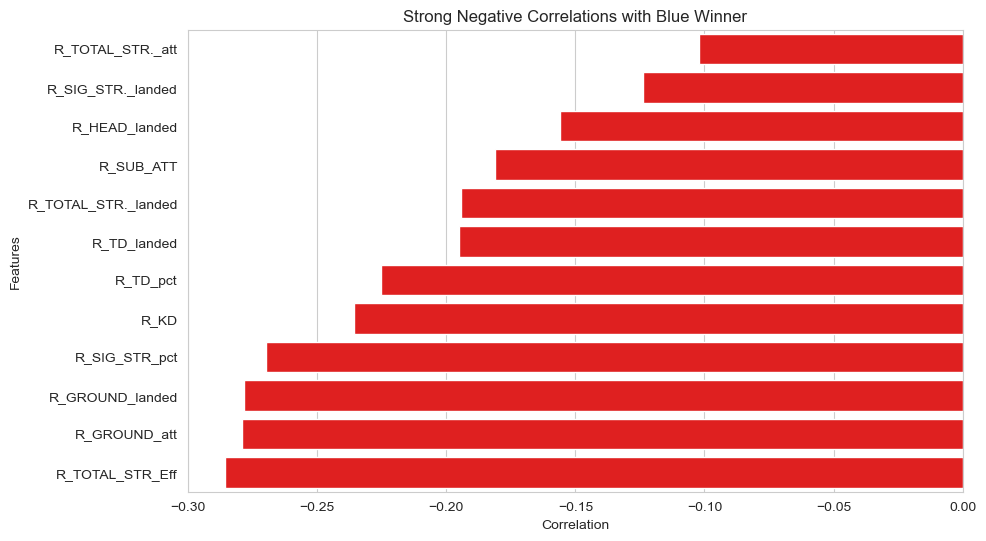

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_neg_B.values, y=strong_neg_B.index, color='red')

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Strong Negative Correlations with Blue Winner')
plt.show()

In [146]:
B.drop(columns=[
    'B_Stance_Sideways', 'B_Stance_Switch', 'Age_Difference', 
    'Reach_Difference', 'last_round', 'winner_age_adv', 
    'B_Reach', 'R_Stance_Switch', 'R_Stance_Sideways', 
    'R_Stance_Open Stance', 'B_Stance_Open Stance', 
    'R_Stance_Southpaw', 'B_Stance_Orthodox', 
    'winner_height_adv', 'winner_reach_adv', 'Height_Difference'
], inplace=True)


Dropped Extra columns due to weak correlations

In [147]:
B.shape

(6012, 77)

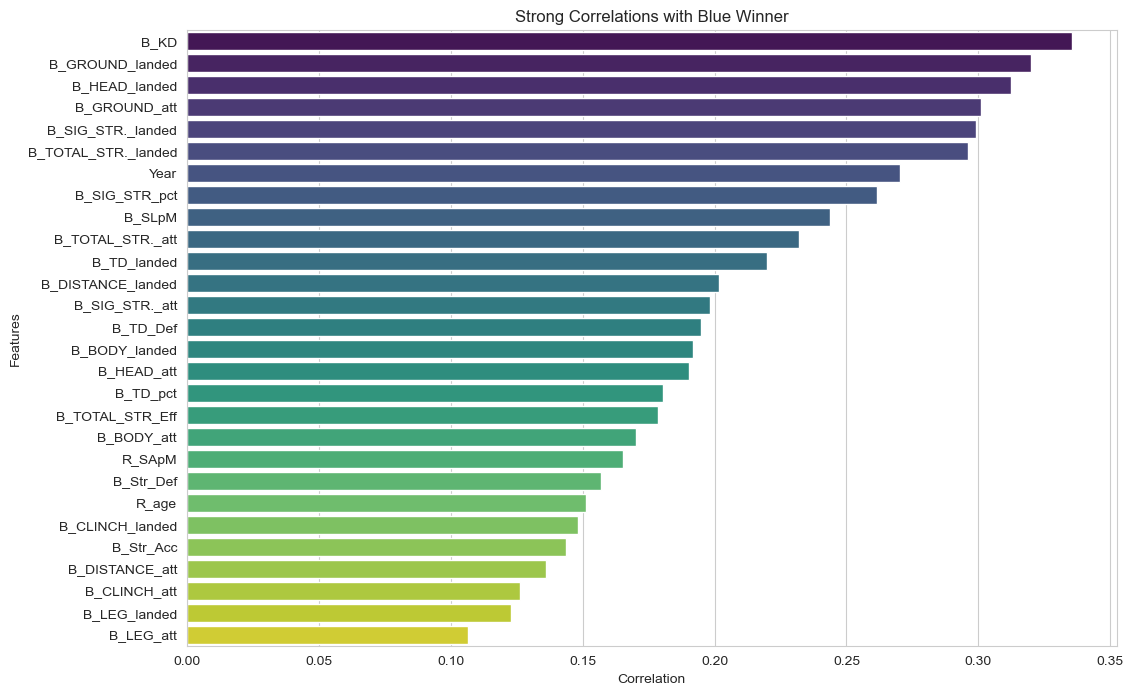

In [148]:
strong_correlations = strong_correlations.drop('Winner')

plt.figure(figsize=(12, 8))
sns.barplot(x=strong_correlations.values, y=strong_correlations.index, palette="viridis")
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Strong Correlations with Blue Winner')
plt.show()


In [149]:
UFC = B.copy()

In [150]:
UFC.shape

(6012, 77)

In [ ]:
# # Identifying non-numeric columns in the dataset
# non_numeric_columns = UFC.select_dtypes(include=['object']).columns
# non_numeric_columns


In [151]:
# Calculate the correlation matrix
correlation_matrix = UFC.corr()

# Display the correlation of each feature with our target variable 'Winner'. The Blue Winner in this case.
correlation_with_winner = correlation_matrix["Winner"].sort_values(ascending=False)
correlation_with_winner


Winner                 1.000000
B_KD                   0.335653
B_GROUND_landed        0.320083
B_HEAD_landed          0.312290
B_GROUND_att           0.300947
B_SIG_STR._landed      0.299272
B_TOTAL_STR._landed    0.295920
Year                   0.270400
B_SIG_STR_pct          0.261685
B_SLpM                 0.243600
B_TOTAL_STR._att       0.231984
B_TD_landed            0.219986
B_DISTANCE_landed      0.201604
B_SIG_STR._att         0.198141
B_TD_Def               0.194779
B_BODY_landed          0.191762
B_HEAD_att             0.190354
B_TD_pct               0.180613
B_TOTAL_STR_Eff        0.178762
B_BODY_att             0.170063
R_SApM                 0.165313
B_Str_Def              0.156994
R_age                  0.151253
B_CLINCH_landed        0.148361
B_Str_Acc              0.143775
B_DISTANCE_att         0.136038
B_CLINCH_att           0.126291
B_LEG_landed           0.122684
B_LEG_att              0.106408
B_TD_att               0.099657
B_SUB_ATT              0.092001
B_TD_Avg

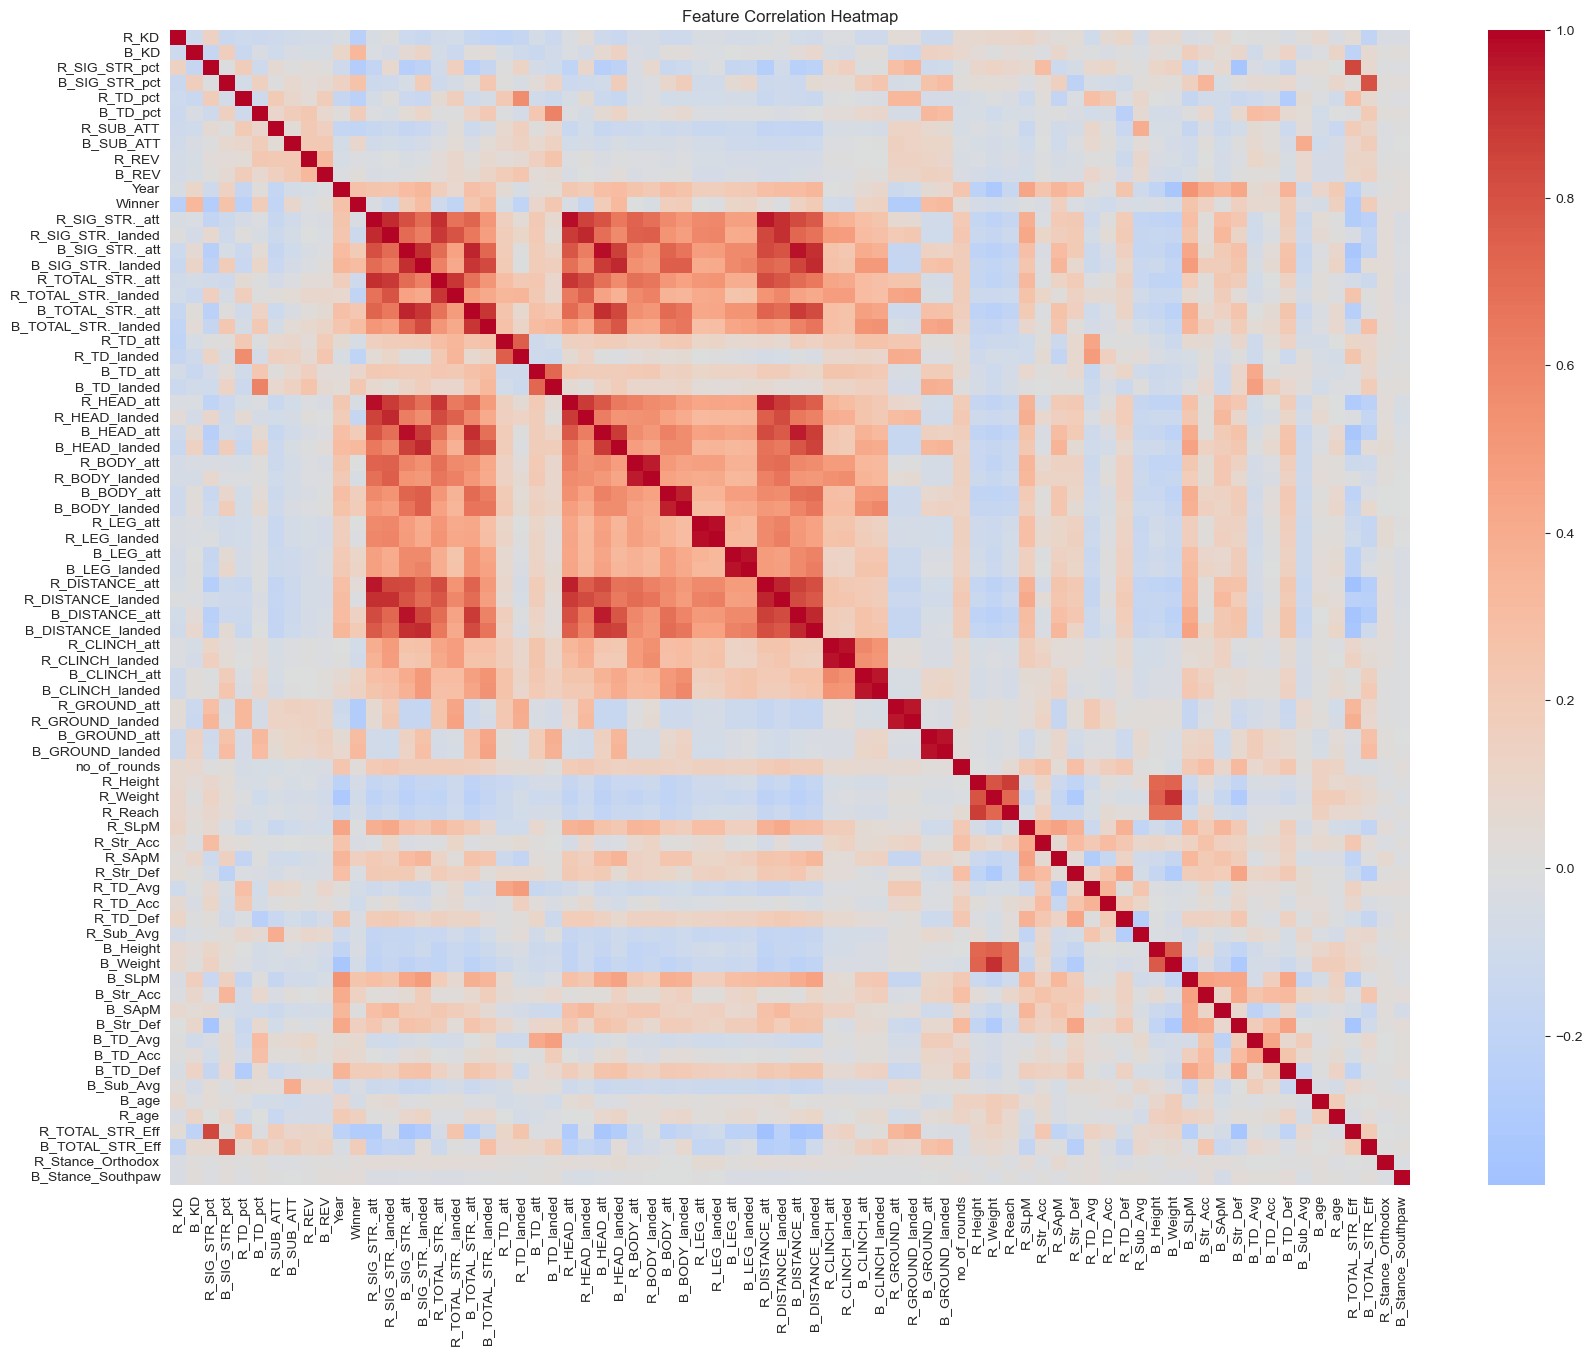

In [152]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [153]:
# Identify pairs of features with high correlation
high_correlation_pairs = {}
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if idx != col:
            if abs(correlation_matrix.loc[idx, col]) > 0.85:
                pair = tuple(sorted([idx, col]))
                if pair not in high_correlation_pairs:
                    high_correlation_pairs[pair] = correlation_matrix.loc[idx, col]

# Display the pairs of features with high correlation values
high_correlation_pairs


{('R_SIG_STR._att', 'R_SIG_STR._landed'): 0.9208843104867233,
 ('R_SIG_STR._att', 'R_TOTAL_STR._att'): 0.9147748494712102,
 ('R_HEAD_att', 'R_SIG_STR._att'): 0.9781185879214274,
 ('R_HEAD_landed', 'R_SIG_STR._att'): 0.8509259729400914,
 ('R_DISTANCE_att', 'R_SIG_STR._att'): 0.9628581485158195,
 ('R_DISTANCE_landed', 'R_SIG_STR._att'): 0.9121281971068106,
 ('R_SIG_STR._landed', 'R_TOTAL_STR._att'): 0.8822035669862509,
 ('R_HEAD_att', 'R_SIG_STR._landed'): 0.8771526457099456,
 ('R_HEAD_landed', 'R_SIG_STR._landed'): 0.9273599161653852,
 ('R_DISTANCE_landed', 'R_SIG_STR._landed'): 0.9068294752662116,
 ('B_SIG_STR._att', 'B_SIG_STR._landed'): 0.9148136624770451,
 ('B_SIG_STR._att', 'B_TOTAL_STR._att'): 0.939766718520093,
 ('B_HEAD_att', 'B_SIG_STR._att'): 0.980386979104747,
 ('B_HEAD_landed', 'B_SIG_STR._att'): 0.8556209438430561,
 ('B_DISTANCE_att', 'B_SIG_STR._att'): 0.972435600700832,
 ('B_DISTANCE_landed', 'B_SIG_STR._att'): 0.908573658823766,
 ('B_SIG_STR._landed', 'B_TOTAL_STR._att')

# Model Section

### Models we will experiment with and their significance.

1. **Random Forest:**
   - **Reasons for Suitability:** Random forests are ensemble models that work by training multiple decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. In the context of predicting UFC fights, where there could be many interacting factors affecting the outcome, the Random Forest can capture these interactions among different features effectively.
   - **Business Relevance:** Understanding the likelihood of a fighter winning can be crucial for multiple stakeholders including fighters, coaches, promoters, and advertisers. A reliable prediction can help in strategic planning, training focus, and even in advertising investments.

2. **XGBoost:**
   - **Reasons for Suitability:** XGBoost is a gradient boosting framework that produces a prediction model in the form of an ensemble of weak prediction models. It handles missing data, is robust to outliers, and generally gives better performance than other algorithms. Its ability to handle different types of predictor variables and its inherent feature importance ranking make it particularly useful for your dataset.
   - **Business Relevance:** For stakeholders who might be interested in the most influential factors determining a fight outcome (e.g., advertisers targeting popular fighters or coaches looking for improvement areas), XGBoost not only provides predictions but also insights into what features (fighter attributes) matter the most.

3. **Stacked Classifier:**
   - **Reasons for Suitability:** Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier (or a meta-regressor). The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features. This means it can capture the strengths of multiple models.
   - **Business Relevance:** The UFC industry, with its multitude of influencing factors for a fight's outcome, can benefit from a stacked approach that harnesses the predictive power of multiple models. It ensures that the prediction is not overly reliant on a single model's perspective, leading to a more holistic decision-making process.

4. **Feed Forward Neural Network (Deep Learning Model):**
   - **Reasons for Suitability:** Neural networks, particularly deep networks, have the capability to capture non-linear relationships in the data, and can automatically engineer features during the training process. Given the right architecture and hyperparameters, they can outperform traditional machine learning models. For a dataset with complex interactions like UFC fights, this can be invaluable.
   - **Business Relevance:** In industries like UFC where outcomes can be influenced by subtle patterns and interactions among fighter attributes, the ability of neural networks to automatically identify and leverage these patterns can lead to superior predictive accuracy. This can be critical for betting agencies, for instance, where prediction accuracy directly impacts profitability.

In summary, each model brings its own strengths to the table in the context of predicting UFC fight outcomes. By utilizing a diverse set of models, you ensure a comprehensive approach that can capture different aspects and intricacies of the data. This holistic approach is not only good for prediction accuracy but also provides a more rounded perspective for various business stakeholders in the UFC ecosystem.

##### No Scaling of data for tree based algorithims

The reason is rooted in the nature of tree-based algorithms, like XGBoost.

1. **Tree Structure:** At its core, XGBoost uses decision trees. Decision trees split the data based on feature values. Whether a feature has a value of 5 or 5000, the tree will make a split based on the value that optimally divides the target variable. Scaling doesn't affect this decision. 

2. **Importance of Values:** In linear models or distance-based models like KNN or SVM, the scale of features is crucial. For instance, a feature ranging from 0 to 1 will have a very different influence on the model than a feature ranging from 0 to 1,000,000. This is not the case for tree-based models.

3. **Relative Values:** Tree-based models are concerned with the order of the data (which value is bigger and which is smaller) rather than the actual magnitude of the data. Scaling retains the order of data but changes the magnitude, so it doesn't affect tree-based models.

4. **Practical Consideration:** In practice, not scaling the data often results in better interpretability. Feature importance scores derived from XGBoost can be interpreted in the original units of the data, which is often more meaningful.

However, it's essential to note that while scaling is not necessary for tree-based models, it doesn't hurt the model either. If you're using a pipeline that includes models sensitive to feature scale alongside tree-based models, it's often more straightforward to scale features for all models in the pipeline.

##### Test Train Split

In [154]:
object_columns = UFC.select_dtypes(include=['object']).columns

object_columns

Index([], dtype='object')

In [155]:
UFC.select_dtypes(include=['datetime64']).columns

Index(['Fight_Date'], dtype='object')

In [156]:
# Drop Fight_Time, Not needed.
UFC.drop(columns = ['Fight_Date'], inplace=True)

Datetime values will affect the modeling process

In [157]:
UFC.shape

(6012, 76)

In [158]:
# Check the balance of the target variable 'Winner'
winner_distribution = UFC['Winner'].value_counts(normalize=True)
winner_distribution

0    0.661843
1    0.319860
2    0.018297
Name: Winner, dtype: float64

##### Train Test Split

In [159]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Features and target variable
X = UFC.drop(columns='Winner',axis=1)
y = UFC['Winner']


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4809, 75), (1203, 75))

##### Random Forrest Score Section

In [160]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train your model using the balanced training data
rf_classifier = RandomForestClassifier(bootstrap=False,
                                       max_depth=30, 
                                       min_samples_leaf=1, 
                                       min_samples_split=5, 
                                       n_estimators=100, 
                                       random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Compute and display accuracy and other metrics
test_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
class_report = classification_report(y_test, rf_predictions)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Test Accuracy: 0.8628428927680798
Confusion Matrix:
[[734  68   0]
 [ 72 304   0]
 [ 19   6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       802
           1       0.80      0.81      0.81       376
           2       0.00      0.00      0.00        25

    accuracy                           0.86      1203
   macro avg       0.56      0.57      0.57      1203
weighted avg       0.84      0.86      0.85      1203



/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [161]:
# Balance Values
print(y_train_balanced.value_counts())

0    3177
1    3177
2    3177
Name: Winner, dtype: int64


In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Grid search with cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

##### Update the parameters

In [187]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train your model using the balanced training data
rf_classifier = RandomForestClassifier(bootstrap=False,
                                       max_depth=30, 
                                       min_samples_leaf=1, 
                                       min_samples_split=2, 
                                       n_estimators=150, 
                                       random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Compute and display accuracy and other metrics
test_accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
class_report = classification_report(y_test, rf_predictions)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.8653366583541147
Confusion Matrix:
[[732  69   1]
 [ 67 309   0]
 [ 19   6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       802
           1       0.80      0.82      0.81       376
           2       0.00      0.00      0.00        25

    accuracy                           0.87      1203
   macro avg       0.57      0.58      0.57      1203
weighted avg       0.85      0.87      0.86      1203



In [ ]:

# rf_classifier = RandomForestClassifier(bootstrap=False,
#     max_depth=30,
#     min_samples_leaf=1,
#     min_samples_split=5,
#     n_estimators=100,
#     random_state=42)

# # Filling potential NaN values caused by alignment with 0
# X_train = X_train.fillna(0)
# X_test = X_test.fillna(0)

# # Let's retry training the Random Forest model
# rf_classifier.fit(X_train, y_train)
# rf_predictions = rf_classifier.predict(X_test)

# # Compute accuracy on the train and test sets
# train_accuracy = rf_classifier.score(X_train, y_train)
# test_accuracy = accuracy_score(y_test, rf_predictions)

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test, rf_predictions)

# # Display train and test accuracy
# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

# # Display confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

# # Display classification report
# class_report = classification_report(y_test, rf_predictions)
# print("Classification Report:")
# print(class_report)


In [163]:
importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)


In [164]:
feature_importances

feature  importance
0                  R_KD    0.034013
10                 Year    0.031434
43         R_GROUND_att    0.027294
44      R_GROUND_landed    0.025738
26        B_HEAD_landed    0.024193
16  R_TOTAL_STR._landed    0.023487
6             R_SUB_ATT    0.022064
45         B_GROUND_att    0.021789
46      B_GROUND_landed    0.021712
20          R_TD_landed    0.021432
4              R_TD_pct    0.021041
2         R_SIG_STR_pct    0.020694
17     B_TOTAL_STR._att    0.018746
18  B_TOTAL_STR._landed    0.018181
71      R_TOTAL_STR_Eff    0.018152
3         B_SIG_STR_pct    0.017628
5              B_TD_pct    0.017141
24        R_HEAD_landed    0.017086
14    B_SIG_STR._landed    0.016886
13       B_SIG_STR._att    0.016043
15     R_TOTAL_STR._att    0.015980
12    R_SIG_STR._landed    0.015867
38    B_DISTANCE_landed    0.015428
25           B_HEAD_att    0.015219
68            B_Sub_Avg    0.014808
59             B_Height    0.014621
70                R_age    0.014089
67             B_TD_Def    0.013914
61               B_SLpM    0.013835
23           R_HEAD_att    0.013308
36    R_DISTANCE_landed    0.012679
11       R_SIG_STR._att    0.012477
66             B_TD_Acc    0.012471
53               R_SApM    0.012376
64            B_Str_Def    0.012332
65             B_TD_Avg    0.012153
60             B_Weight    0.012003
62            B_Str_Acc    0.011975
35       R_DISTANCE_att    0.011941
56             R_TD_Acc    0.011916
72      B_TOTAL_STR_Eff    0.011841
69                B_age    0.011809
37       B_DISTANCE_att    0.011693
39         R_CLINCH_att    0.011670
1                  B_KD    0.011552
55             R_TD_Avg    0.011364
48             R_Height    0.011364
54            R_Str_Def    0.011015
63               B_SApM    0.010930
49             R_Weight    0.010689
28        R_BODY_landed    0.010683
27           R_BODY_att    0.010596
51               R_SLpM    0.010470
22          B_TD_landed    0.010382
58            R_Sub_Avg    0.010375
57             R_TD_Def    0.009855
52            R_Str_Acc    0.009669
50              R_Reach    0.009382
40      R_CLINCH_landed    0.008890
33            B_LEG_att    0.008513
29           B_BODY_att    0.008495
31            R_LEG_att    0.008155
41         B_CLINCH_att    0.008105
19             R_TD_att    0.007594
30        B_BODY_landed    0.007543
32         R_LEG_landed    0.007262
34         B_LEG_landed    0.007059
42      B_CLINCH_landed    0.006498
21             B_TD_att    0.005764
7             B_SUB_ATT    0.004505
74    B_Stance_Southpaw    0.003703
73    R_Stance_Orthodox    0.003464
47         no_of_rounds    0.002615
9                 B_REV    0.001177
8                 R_REV    0.001169

<!-- Here's a brief overview of each algorithm:

**Random Forest**: An ensemble learning method that fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Gaussian Naive Bayes**: A probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

**Decision Tree**: A flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents an outcome.

**KNN (K-Nearest Neighbors)**: A type of instance-based learning where the function is only approximated locally and all computation is deferred until function evaluation.

**Support Vector Classifier**: A representation of the training data as points in space, separated into categories by a clear gap that is as wide as possible.

**XGBoost**: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.

**Artificial Neural Network**: A computing system inspired by the biological neural networks that constitute animal brains. It is an interconnected group of nodes, akin to the vast network of neurons in a brain. -->

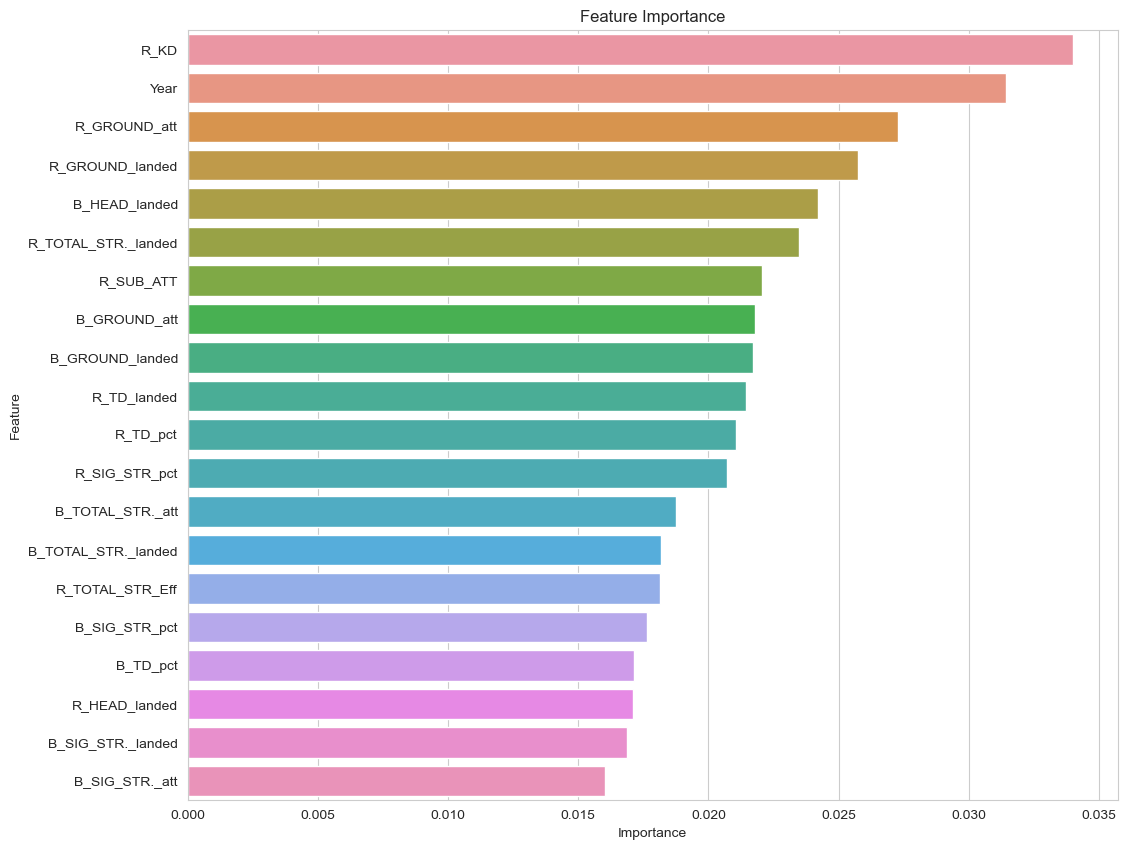

In [165]:

# Top 20 most important features in the dataset.
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### XGBoost

In [166]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective="multi:softprob", 
    eval_metric="mlogloss", 
    use_label_encoder=False, 
    random_state=42
)


model_xgb.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = model_xgb.predict(X_test)

# Compute accuracy on the test set
test_accuracy_xgb = accuracy_score(y_test, xgb_predictions)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)

# Display the test accuracy, confusion matrix, and classification report
print("Test Accuracy:", test_accuracy_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))



/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test Accuracy: 0.8819617622610141

Confusion Matrix:
 [[749  53   0]
 [ 64 312   0]
 [ 19   6   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       802
           1       0.84      0.83      0.84       376
           2       0.00      0.00      0.00        25

    accuracy                           0.88      1203
   macro avg       0.58      0.59      0.58      1203
weighted avg       0.86      0.88      0.87      1203



/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [188]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
model_xgb = xgb.XGBClassifier(
    objective="multi:softprob", 
    eval_metric="mlogloss", 
    use_label_encoder=False, 
    random_state=42
)

# Train the model on the SMOTE-balanced training set
model_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
xgb_predictions = model_xgb.predict(X_test)

# Compute accuracy on the test set
test_accuracy_xgb = accuracy_score(y_test, xgb_predictions)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)

# Display the test accuracy, confusion matrix, and classification report
print("Test Accuracy:", test_accuracy_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))


/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Test Accuracy: 0.8694929343308395

Confusion Matrix:
 [[733  69   0]
 [ 63 313   0]
 [ 18   7   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       802
           1       0.80      0.83      0.82       376
           2       0.00      0.00      0.00        25

    accuracy                           0.87      1203
   macro avg       0.57      0.58      0.58      1203
weighted avg       0.85      0.87      0.86      1203



/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

##### GridSearch XGBoost

In [183]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Create a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosted trees to fit
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of columns to be randomly sampled for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}

# Create a base model
xgb_classifier = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric="mlogloss", use_label_encoder=False)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_xgb = xgb.XGBClassifier(**best_params)
best_xgb.fit(X_train_balanced, y_train_balanced)

predictions = best_xgb.predict(X_test)

# ... (evaluation code)


/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   6.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total 

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   8.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END bootstrap=False, max_depth=30, min_samples_lea

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   5.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_sa

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=50; total time=  15.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100; total time=  27.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50; total time=  19.3s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100; total time=  39.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=50; total time=  23.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=200; total time= 1.7min
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100; total time=  37.8s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100; total time=  49.5s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100; total time=  29

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   5.7s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   6.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samp

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=4, n_estimators=100; total time=  48.3s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50; total time=  29.8s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=200; total time= 2.1min
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=100; total time=  44.7s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=100; total time= 1.0min
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100; total time=  39.2s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; total time= 1.2min
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=50; total time=  31.6s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=100; total time=  58.5

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   9.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   6.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   8.2s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.0s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   5.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, min_sa

In [184]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Best hyperparameters from GridSearch
best_params = {
    'colsample_bytree': 0.9,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200
}

# Initialize the XGBoost classifier with the best hyperparameters
model_xgb = xgb.XGBClassifier(
    objective="multi:softprob", 
    eval_metric="mlogloss", 
    use_label_encoder=False, 
    random_state=42,
    **best_params  # unpack the best parameters here
)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = model_xgb.predict(X_test)

# Compute accuracy on the test set
test_accuracy_xgb = accuracy_score(y_test, xgb_predictions)

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)

# Display the test accuracy, confusion matrix, and classification report
print("Test Accuracy:", test_accuracy_xgb)
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))


Test Accuracy: 0.8802992518703242

Confusion Matrix:
 [[741  61   0]
 [ 58 318   0]
 [ 19   6   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       802
           1       0.83      0.85      0.84       376
           2       0.00      0.00      0.00        25

    accuracy                           0.88      1203
   macro avg       0.58      0.59      0.58      1203
weighted avg       0.86      0.88      0.87      1203



/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

##### XGBoost Score Comparison Boost

Let's compare the scores:

### **Original XGBoost Model:**
- Test Accuracy: **88.20%**
- Precision (Class 0): **90%**
- Recall (Class 0): **93%**
- Precision (Class 1): **84%**
- Recall (Class 1): **83%**
- Precision (Class 2): **0%** 
- Recall (Class 2): **0%**

### **XGBoost Model after Hyperparameter Tuning:**
- Test Accuracy: **88.03%**
- Precision (Class 0): **91%**
- Recall (Class 0): **92%**
- Precision (Class 1): **83%**
- Recall (Class 1): **85%**
- Precision (Class 2): **0%** 
- Recall (Class 2): **0%**

### **Analysis:**
1. **Test Accuracy:** The test accuracy slightly decreased after hyperparameter tuning. However, the change is minor and might not be very significant.
 
2. **Class 0 (Precision & Recall):** The precision for class 0 increased by 1% after tuning, while the recall decreased by 1%. This means the model after tuning predicts class 0 slightly more accurately, but misses slightly more actual class 0 instances.

3. **Class 1 (Precision & Recall):** The precision for class 1 remained the same, but the recall increased by 2%. This indicates that the tuned model is slightly better at identifying instances of class 1 without falsely predicting other classes as class 1.

4. **Class 2 (Precision & Recall):** There's no change for Class 2. The model struggles to predict this class in both scenarios.

### **Why did the changes occur?**
The hyperparameter tuning process aims to search for the best parameters that optimize a specific metric (in this case, accuracy) by cross-validation on the training data. The optimal parameters were set to values that, theoretically, should provide the best performance based on this cross-validation. 

However, it's worth noting that:
- **Overfitting:** Sometimes, hyperparameter tuning can lead to slight overfitting on the training data. This can cause the model to perform slightly worse on unseen data (like the test set). 
- **Class Imbalance:** Class 2 has a significant imbalance compared to the other classes, which makes it difficult for the model to predict.
- **Nature of the Data:** Even with hyperparameter tuning, there's a limit to how much a model can improve based on the nature and quality of the data.

In this case, the changes in hyperparameters slightly altered the model's decision boundaries, leading to the differences in precision and recall. The fact that there wasn't a significant increase in performance indicates that the original model's parameters were already quite optimized for this particular dataset.

XGBoost important features.

In [191]:
# Get feature importances
importances = best_xgb.feature_importances_

# Get feature names from your dataframe (assuming it's named df)
feature_names = UFC.columns

# Pair them together and sort by importance
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Display
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")



R_KD: 0.0860
R_Stance_Orthodox: 0.0594
R_GROUND_att: 0.0536
R_SUB_ATT: 0.0453
R_TD_att: 0.0433
Year: 0.0267
R_TD_pct: 0.0264
R_GROUND_landed: 0.0246
B_TD_att: 0.0246
B_KD: 0.0221
B_TOTAL_STR_Eff: 0.0183
R_DISTANCE_landed: 0.0180
R_Height: 0.0173
B_HEAD_att: 0.0167
B_GROUND_att: 0.0164
R_TOTAL_STR._att: 0.0161
B_SIG_STR._att: 0.0160
R_SIG_STR._att: 0.0152
B_TD_pct: 0.0149
B_LEG_landed: 0.0142
B_DISTANCE_att: 0.0135
R_Sub_Avg: 0.0134
B_CLINCH_landed: 0.0133
B_SUB_ATT: 0.0131
R_HEAD_att: 0.0130
B_TD_Def: 0.0129
R_SIG_STR_pct: 0.0124
B_SIG_STR_pct: 0.0123
R_TOTAL_STR._landed: 0.0123
R_BODY_att: 0.0115
B_age: 0.0113
B_TOTAL_STR._att: 0.0103
B_GROUND_landed: 0.0097
R_HEAD_landed: 0.0096
B_SIG_STR._landed: 0.0093
R_TD_Def: 0.0091
B_HEAD_landed: 0.0089
no_of_rounds: 0.0087
B_Height: 0.0085
B_DISTANCE_landed: 0.0081
R_LEG_landed: 0.0079
B_TD_Acc: 0.0076
B_Sub_Avg: 0.0076
R_BODY_landed: 0.0073
R_Str_Acc: 0.0073
R_TOTAL_STR_Eff: 0.0072
R_SIG_STR._landed: 0.0072
R_DISTANCE_att: 0.0071
R_TD_landed:

In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# # Define the base models
# level0 = list()
# level0.append(('rf', RandomForestClassifier()))
# level0.append(('xgb', XGBClassifier()))

# # Define meta learner model
# level1 = LogisticRegression()

# # Define the stacking ensemble
# model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# # Fit the model on all available data
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)


In [167]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(bootstrap=False,
                                       max_depth=30, 
                                       min_samples_leaf=1, 
                                       min_samples_split=5, 
                                       n_estimators=100, 
                                       random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Initialize the Stacking Classifier with the base models and a logistic regression meta-model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Fit the model to the balanced training data
stacked_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
stacked_predictions = stacked_model.predict(X_test)

# Evaluate the model as before
# ... (evaluation code)


In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
stacked_predictions = stacked_model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, stacked_predictions)
print(f"Accuracy of Stacking Classifier: {accuracy:.2f}")

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute and display the classification report
class_report = classification_report(y_test, stacked_predictions)
print("\nClassification Report:")
print(class_report)


Accuracy of Stacking Classifier: 0.87

Confusion Matrix:
[[736  65   1]
 [ 70 306   0]
 [ 19   6   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       802
           1       0.81      0.81      0.81       376
           2       0.00      0.00      0.00        25

    accuracy                           0.87      1203
   macro avg       0.57      0.58      0.57      1203
weighted avg       0.85      0.87      0.86      1203




### Stacking Classifier Reasoning:
Stacking (or "stacked generalization") involves training a new model to combine the predictions of several base models. The idea is to leverage the strengths of each base model and potentially offset their individual weaknesses, leading to better overall predictive performance.

In your setup:
1. **Base Models**:
   - **RandomForestClassifier**: This is an ensemble method that creates multiple decision trees during training and outputs either the class that is the mode of the classes for classification or the mean prediction for regression. It's known for its high accuracy, ability to handle large data sets with higher dimensionality, and its ability to handle missing values.
   - **XGBClassifier**: This is an implementation of gradient boosted decision trees designed for speed and performance. It's known for its efficiency and performance in machine learning competitions.

2. **Meta-model (or Blender)**:
   - **Logistic Regression**: It's used to combine the predictions of the base models. The meta-model is trained to make a final prediction based on the predictions of the base models.

### Explanation of Hyperparameters:

1. **For RandomForestClassifier**:
   - **bootstrap=False**: Bootstrap sampling is not used. When False, the whole dataset is used to construct each tree.
   - **max_depth=30**: The maximum depth of the tree. It's used to control over-fitting. Deeper trees capture more information about the data.
   - **min_samples_leaf=1**: The minimum number of samples required to be at a leaf node. A smaller leaf makes the model more prone to capturing noise in train data.
   - **min_samples_split=5**: The minimum number of samples required to split an internal node.
   - **n_estimators=100**: The number of trees in the forest.
   - **random_state=42**: Ensures consistent results across multiple function calls.

2. **For XGBClassifier**:
   - **n_estimators=100**: Number of gradient boosted trees. Equivalent to the number of boosting rounds.
   - **learning_rate=0.1**: Step size shrinkage used to prevent overfitting. Range is [0,1].

3. **For StackingClassifier**:
   - **estimators**: The base models that are stacked together.
   - **final_estimator=LogisticRegression()**: The meta-model that aggregates the predictions of the base models.
   - **cv=5**: Cross-validation splitting strategy. It determines the cross-validation strategy used when the predictions of the base models are trained on the meta-model. In this case, a 5-fold cross-validation is used.

### Business Perspective:

The Stacking Classifier achieved an accuracy of approximately 87%. It's particularly strong at predicting class 0, with a precision of 89%. However, for class 2, both precision and recall are 0, indicating the model's inability to predict this class effectively. This might be due to class imbalance or the inherent difficulty of predicting this specific class.

In the context of UFC:
- **Class 0 (e.g., "Fighter A Wins")**: The model can predict this outcome with high confidence. This is crucial for stakeholders like advertisers or broadcasters who might be more interested in fights where a specific outcome can be predicted with higher confidence.
  
- **Class 1 & 2**: Predictions for these outcomes are less confident. Decisions based solely on predictions for these classes should be made with caution.

From a business standpoint, the model's ability to predict outcomes can be used in similar ways as previously mentioned:
1. **Drive Marketing Campaigns**: Tailor promotions based on predicted outcomes.
2. **Strategic Decision Making for Fighters**: Analyze chances against specific opponents.
3. **Betting Industries**: Influence betting odds and recommendations.

In essence, the Stacking Classifier harnesses the power of multiple models, aiming to deliver more accurate and robust predictions. It's vital to interpret its predictions in the context of the business and use them as part of a broader decision-making framework.

##### Slight Adjustment to XGBoost

In [185]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(bootstrap=False,
                                       max_depth=30, 
                                       min_samples_leaf=1, 
                                       min_samples_split=5, 
                                       n_estimators=100, 
                                       random_state=42)),
    ('xgb', XGBClassifier(
    objective="multi:softprob", 
    eval_metric="mlogloss", 
    use_label_encoder=False, 
    random_state=42,
    **best_params  # unpack the best parameters here
))
]

# Initialize the Stacking Classifier with the base models and a logistic regression meta-model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Fit the model to the balanced training data
stacked_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
stacked_predictions = stacked_model.predict(X_test)

# Evaluate the model as before
# ... (evaluation code)

/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/emmanuelnnadi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_l

In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
stacked_predictions = stacked_model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, stacked_predictions)
print(f"Accuracy of Stacking Classifier: {accuracy:.2f}")

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute and display the classification report
class_report = classification_report(y_test, stacked_predictions)
print("\nClassification Report:")
print(class_report)

Accuracy of Stacking Classifier: 0.87

Confusion Matrix:
[[736  65   1]
 [ 67 309   0]
 [ 19   6   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       802
           1       0.81      0.82      0.82       376
           2       0.00      0.00      0.00        25

    accuracy                           0.87      1203
   macro avg       0.57      0.58      0.57      1203
weighted avg       0.85      0.87      0.86      1203



##### Score Interpretation



1. **Accuracy**: 
   - Stacking classifier has an accuracy of \(0.87\) (or \(87\%\)). This means that \(87\%\) of the total predictions made by the model are correct.

2. **Confusion Matrix**:
   
   \[
   \begin{bmatrix}
   736 & 65 & 1 \\
   67 & 309 & 0 \\
   19 & 6 & 0 \\
   \end{bmatrix}
   \]
   
   - The rows of the matrix represent the actual class, while the columns represent the predicted class.
   - Class 0 (row 1): Out of 802 actual instances of class 0, 736 were correctly predicted as class 0 (True Positives for class 0), 65 were incorrectly predicted as class 1 (False Positives for class 1), and 1 was incorrectly predicted as class 2.
   - Class 1 (row 2): Out of 376 actual instances of class 1, 309 were correctly predicted as class 1 (True Positives for class 1), and 67 were incorrectly predicted as class 0 (False Positives for class 0).
   - Class 2 (row 3): All 25 instances of class 2 were misclassified - 19 as class 0 and 6 as class 1. No instances were correctly predicted as class 2.

3. **Classification Report**:

   - For class 0:
     - **Precision**: \(0.90\): Out of all instances predicted as class 0, \(90\%\) were actually class 0.
     - **Recall**: \(0.92\): Out of all actual instances of class 0, \(92\%\) were correctly predicted.
     - **F1-Score**: \(0.91\): The harmonic mean of precision and recall, providing a balance between the two when they are uneven.
     
   - For class 1:
     - **Precision**: \(0.81\): Out of all instances predicted as class 1, \(81\%\) were actually class 1.
     - **Recall**: \(0.82\): Out of all actual instances of class 1, \(82\%\) were correctly predicted.
     - **F1-Score**: \(0.82\): Again, a balanced measure of precision and recall.
     
   - For class 2:
     - All the scores are \(0.00\) because the model failed to correctly predict any instance of class 2. It's a clear area of improvement for the model.
     
   - **Macro Avg**: This is the average of each metric (precision, recall, f1-score) for all the classes without considering the class imbalances.
   
   - **Weighted Avg**: This takes into account the number of true instances for each label when averaging out, so it considers class imbalance.

**Observations**:

- The model performs well for class 0 and class 1, with good precision, recall, and F1-scores.
- However, it struggles with class 2, failing to correctly predict any instance of this class. 
- This might be due to the severe class imbalance, as there are only 25 instances of class 2 in the test set. Addressing this imbalance, perhaps with more advanced sampling techniques or using models that can handle imbalances natively, could potentially improve performance for class 2.

##### Reason Behind Using Logistic Regression as the final Estimator

Using logistic regression as a final estimator in a stacking classifier.

1. **Interpretability**: Logistic regression is a linear model, which means that the relationship between the input features (the predictions from the base models) and the output (the final prediction) is linear and additive. By looking at the coefficients of the logistic regression model, you can infer the importance and directionality (positive or negative influence) of each base model's prediction.

2. **Aggregation of Predictions**: Stacking is about leveraging the predictions of multiple models to make a final prediction. Logistic regression does this by assigning weights to each base model's predictions. If one model tends to be more accurate than another in the ensemble, logistic regression will give it a higher weight.

3. **Probability Estimates**: Logistic regression doesn't just make a binary decision; it estimates the probability of an instance belonging to a particular class. This probabilistic output can be crucial for tasks where understanding the confidence of a prediction is essential.

4. **Regularization**: Logistic regression models can be regularized to avoid overfitting. This is especially useful in stacking, where the model is trained on the outputs of other models, and there's a risk of fitting too closely to any peculiarities in those predictions.

5. **Simplicity and Efficiency**: While you can use other models (like another tree or even another ensemble) as the meta-model, using a simpler model like logistic regression is computationally efficient. It also reduces the risk of overfitting, which can be a concern when stacking complex models.



##### Deep Learning Model (FEEDFORWARD NEURAL NETWORK)

In [169]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Here's a breakdown of the model:

Input Layer: The model starts with an input layer. The shape of this layer matches the number of features in your dataset.

Hidden Layers: After the input layer, there are multiple dense (or fully connected) layers, which are the hidden layers of the network. Each neuron in a dense layer is connected to every neuron from the previous layer.

In the code, Dense units with relu activation functions were used for these layers.
Dropout Layers: Between the dense layers, you used Dropout layers.

Dropout is a regularization technique where randomly selected neurons are ignored during training. This helps in preventing overfitting.

Output Layer: Finally, there's an output layer with 3 units (matching the number of classes) and a softmax activation function. The softmax function is used in multi-class classification problems to produce a probability distribution over the classes.

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Data Preprocessing
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Building the Neural Network
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer - We have 3 classes, so we use softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 3. Training the Neural Network
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 4. Evaluating the Neural Network
predictions = model.predict(X_test_scaled).argmax(axis=1)
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


2023-08-11 00:02:07.363716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
121/121 [==============================] - 2s 6ms/step - loss: 0.5998 - accuracy: 0.7447 - val_loss: 0.3940 - val_accuracy: 0.8586
Epoch 2/50
121/121 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8505 - val_loss: 0.3757 - val_accuracy: 0.8784
Epoch 3/50
121/121 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8635 - val_loss: 0.3662 - val_accuracy: 0.8701
Epoch 4/50
121/121 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8692 - val_loss: 0.3609 - val_accuracy: 0.8721
Epoch 5/50
121/121 [==============================] - 1s 5ms/step - loss: 0.3469 - accuracy: 0.8770 - val_loss: 0.3604 - val_accuracy: 0.8763
Epoch 6/50
121/121 [==============================] - 0s 4ms/step - loss: 0.3455 - accuracy: 0.8778 - val_loss: 0.3665 - val_accuracy: 0.8805
Epoch 7/50
121/121 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8874 - val_loss: 0.3669 - val_accuracy: 0.8721
Epoch 

# Slide 15


### Deep Learning Model Reasoning:


1. **Dense Layers**: These are fully connected layers where each neuron in a layer is connected to every neuron in the previous and subsequent layer. The main purpose is to learn patterns from the input features.

2. **Dropout Layers**: These are regularization layers that help prevent overfitting. During training, a fraction of neurons are randomly set to zero at each update cycle. This helps in ensuring that no one neuron is overly responsible for the output, promoting a more generalized model.

3. **Softmax Activation in Output Layer**: Given you're solving a multi-class classification problem, the softmax activation function computes the probability distribution over the classes. Each neuron in this layer corresponds to a class, and the softmax ensures their values are between 0 and 1 and sum up to 1.

### Explanation of Hyperparameters and Components:

1. **Dense Layer Neurons (e.g., 128, 64)**: The number of neurons in a dense layer defines its capacity to learn patterns. Too few might not capture the complexity, while too many can lead to overfitting.

2. **Activation Function ('relu')**: The Rectified Linear Unit (ReLU) activation function introduces non-linearity to the model. This enables the network to learn from the error and make adjustments, essential for learning complex patterns.

3. **Dropout Rate (0.3)**: This indicates 30% of the neurons in the dropout layer are turned off during training. Adjusting this rate can influence overfitting: a higher rate means more regularization, but setting it too high can hinder the model from learning.

4. **Optimizer (Adam)**: The optimizer adjusts the weights of the network with the aim of reducing the loss. Adam is an adaptive learning rate optimizer, known for its efficiency and low memory requirements.

5. **Learning Rate (0.001)**: This determines the step size during weight updates. A high learning rate might converge quickly, but it risks overshooting the optimal solution. Conversely, a small learning rate might converge slowly or get stuck in local minima.

6. **Loss ('sparse_categorical_crossentropy')**: This is the objective function the model tries to minimize. Given you have integer labels and a multi-class problem, this loss is appropriate. The model updates its weights to minimize this value over epochs.

7. **Metrics ('accuracy')**: This is for human understanding. It doesn’t impact the model training but gives you a metric to understand the model's performance.

8. **Batch Size (32)**: This represents the number of training examples utilized in one iteration. A smaller batch size often provides a regularizing effect and lower generalization error.

9. **Epochs (50)**: An epoch is one forward and one backward pass of all the training examples. The number of epochs is the number of times the learning algorithm will work through the entire training dataset.

10. **Validation Split (0.2)**: 20% of the training data is set aside to validate the model. This helps in understanding the model's performance on unseen data and can hint at overfitting if validation accuracy starts decreasing while training accuracy continues to increase.

### Business Perspective:

The neural network model achieved an accuracy of approximately 88.3%. It's particularly strong at predicting class 0, with a precision of 90%. However, for class 2, both precision and recall are 0, suggesting the model struggles with this class. This could be due to class imbalance or the inherent difficulty of predicting this specific class.

In the context of UFC:
- **Class 0 (e.g., "Fighter A Wins")**: The model can predict this outcome with high confidence. This can be crucial for stakeholders (e.g., advertisers, broadcasters) who might be more interested in fights where a specific outcome (popular fighter winning) can be predicted with higher confidence.
  
- **Class 1 & 2 (e.g., "Fighter B Wins" or "Draw")**: Predictions for these outcomes are less confident. Stakeholders should be cautious while making decisions based solely on predictions for these classes.

From a business standpoint, the model's ability to predict outcomes can be used to:
- **Drive Marketing Campaigns**: Promotions can be tailored based on predicted outcomes to generate maximum viewer interest.
  
- **Strategic Decision Making for Fighters**: Fighters and coaches can potentially use such models to gauge their chances against specific opponents, helping in decision-making regarding accepting fights, training focus, etc.

- **Betting Industries**: Such models can influence betting odds and recommendations.

Remember, while the model provides valuable insights, it's essential to use its predictions as one of many tools in decision-making, rather than the sole determinant.

Interpretation:

**1. Training Progression:**

- The model was trained for 50 epochs. 
- Over these epochs, the training accuracy improved, indicating that the model was learning and adapting to the training data.
- The validation loss, which started increasing at a certain point, suggests that the model might be overfitting the training data since it's performing worse on the validation data. This is a common observation in deep learning models where the model starts to "memorize" training examples if trained for too many epochs.

**2. Test Set Performance:**

- **Accuracy**: The model achieved an accuracy of about 88.3% on the test set. This means that out of all predictions made on the test set, 88.3% of them were correct.

- **Confusion Matrix**: 
  - There were 802 instances of class 0, out of which 752 were correctly classified by the model.
  - Out of 376 instances of class 1, 310 were correctly classified.
  - Class 2, which had 25 instances, was the most challenging for the model, with none being correctly classified.

- **Classification Report**:
  - For class 0: 
    - Precision: 90% (Out of all the predictions made as class 0, 90% were correct)
    - Recall: 94% (Out of all the actual class 0 instances, 94% were correctly predicted by the model)
  - For class 1:
    - Precision: 85%
    - Recall: 82%
  - For class 2:
    - Precision and Recall are both 0, indicating the model struggled with this class.

  - The F1-score is the harmonic mean of precision and recall and provides a singular metric that encapsulates both false positives and false negatives. For classes 0 and 1, the F1-score is relatively high (92% and 84% respectively). However, for class 2, it's 0.

  - The weighted average takes into account the imbalance between the classes. Given that class 2 has a significantly lower representation than the other two classes, its impact on the weighted average is minimal.

**Key Takeaways**:
- The neural network model performs quite well on classes 0 and 1 but struggles with class 2. This might be due to the significant class imbalance present in the dataset.
- The potential overfitting observed during training (where validation loss starts increasing) might indicate a need for regularization or early stopping.
- The model's performance on class 2 highlights the challenges of imbalanced datasets. Techniques such as oversampling, using different architectures, or focusing on different metrics (like F1-score) might be explored to improve this.

In future iterations, consider experimenting with:
- Different architectures (more/fewer layers or nodes).
- Further regularization techniques (more dropout, L1/L2 regularization).
- Early stopping to prevent overfitting.
- Techniques specifically designed for imbalanced datasets.

Personal Notes and Observations

1. **Epoch-wise Training and Validation Metrics**: For each epoch, you see two sets of metrics:
   - `loss` and `accuracy` for the training set.
   - `val_loss` and `val_accuracy` for the validation set.

   The `loss` is a measure of how well the model's predictions match the actual data. Lower values are better. The `accuracy` is a measure of how often the model's predictions are correct. Higher values are better.

   For example, in `Epoch 1/50`, the model had a training accuracy of about 78.19% and a validation accuracy of about 87.01%. As the epochs progress, the training accuracy generally increases, indicating the model is learning from the training data.

2. **Overfitting**: After a certain number of epochs, the training loss continues to decrease, but the validation loss starts to increase. This is an indication of overfitting, where the model begins to memorize the training data rather than learning general patterns. It's a sign that you might want to stop training early or introduce other regularization techniques.

3. **Final Metrics on Test Data**: After training, the model is evaluated on the test data, which it hasn't seen before. This gives a real-world indication of how well the model might perform. 
   - The `Accuracy Score` of about 86.7% means the model correctly predicted the fight outcome in about 86.7% of the test cases.
   - The `Confusion Matrix` provides a breakdown of the predictions for each class. 
   - The `Classification Report` provides precision, recall, and f1-score for each class. The macro average and weighted average for these metrics are also displayed.

**Interpretation and Next Steps**:
- The deep learning model has provided a competitive accuracy compared to the ensemble methods you tried earlier.
- If you want to improve performance further, consider:
  - Adjusting the network architecture (more layers, different activation functions, etc.)
  - Implementing early stopping to halt training when the validation loss starts increasing.
  - Trying different optimization algorithms or learning rates.
  - Experimenting with other regularization techniques, like L1 or L2 regularization.
  - Gathering more data or engineering new features based on domain knowledge.


An "epoch" in the context of training a machine learning or deep learning model refers to one complete forward and backward pass of all the training examples. In other words, an epoch is a single pass through the entire training dataset.

Let's break it down further:

1. **Forward Pass**: For every input in the training dataset, the model makes a prediction (forward pass).
2. **Calculate Loss**: The difference between the prediction and the actual label is calculated using a loss function.
3. **Backward Pass**: The model then updates its weights using an optimization algorithm to minimize this loss (backward pass or backpropagation).

When the model has gone through every example in the training dataset, that constitutes one epoch. 

For deep learning models, especially when using neural networks, it's common to train the model for multiple epochs. The idea is that by repeatedly going through the training data, the model will continue to learn and improve its accuracy. However, there's a caveat: training for too many epochs can lead to overfitting, where the model becomes very specialized to the training data and performs poorly on new, unseen data.

In your previous outputs, when you see lines like "Epoch 1/50", it means the model is on its first pass through the training data out of a total of 50 planned passes (or epochs).

##### Why Fight prediction accuracy matters to a business?

An MMA business might benefit from an accurate model to predict UFC fights for several reasons:

1. **Strategic Betting**: An accurate prediction model can help the business make informed decisions when placing bets on fights. This can potentially lead to higher profits if the model can consistently identify fighters with a higher likelihood of winning.

2. **Content Creation**: MMA businesses often produce content related to fight analysis, previews, and predictions. An accurate prediction model can enhance the credibility of such content, attracting more readers or viewers and increasing engagement.

3. **Fan Engagement**: Fans enjoy discussing and debating fight outcomes. A reliable prediction model can generate discussions among fans, enhancing their engagement with the sport and the business's content.

4. **Fantasy Sports**: Many fans participate in fantasy MMA leagues, where they draft fighters and earn points based on their performance. Accurate predictions can guide participants' choices and enhance their overall experience.

5. **Fighter Selection**: Promoters and matchmakers can use prediction models to assess potential matchups, ensuring competitive fights and enhancing the quality of events.

6. **Sponsorship and Advertising**: Accurate predictions can attract sponsors and advertisers interested in associating their brands with successful predictions and insights.

7. **Event Planning**: Accurate predictions can inform event planning and logistics. Businesses can allocate resources more effectively based on the expected popularity and outcome of certain fights.

8. **Data-Driven Insights**: An accurate model can provide valuable insights into fighter performance, trends, and factors influencing fight outcomes. This information can be used for analysis, research, and decision-making.

9. **Competitive Advantage**: Having a superior prediction model can give an MMA business a competitive edge over others in terms of accuracy and credibility.

10. **Fan Loyalty**: Providing accurate predictions can establish the business as a reliable source of information, increasing fan trust and loyalty.

11. **Growth Opportunities**: Successful prediction models can attract more visitors to the business's website or platform, potentially leading to growth opportunities and partnerships.

12. **Educational Purposes**: An accurate model can serve as an educational tool, helping fans understand the nuances of MMA and the factors that contribute to fight outcomes.

Overall, an accurate prediction model can enhance various aspects of an MMA business, from content creation and fan engagement to strategic decision-making and growth opportunities.

In [ ]:
# UFC.to_csv('/Users/emmanuelnnadi/Desktop/UFC.CSV', index=False)

In [ ]:
# # Set display to max
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [194]:
EDA.T

0                     1     \
R_fighter                 Adrian Yanez          Trevin Giles   
B_fighter                Gustavo Lopez         Roman Dolidze   
R_KD                                 2                     0   
B_KD                                 0                     0   
R_SIG_STR_pct                     0.39                  0.47   
B_SIG_STR_pct                     0.45                  0.47   
R_TD_pct                           0.0                   0.5   
B_TD_pct                           0.0                  0.33   
R_SUB_ATT                            0                     1   
B_SUB_ATT                            0                     2   
R_REV                                0                     0   
B_REV                                0                     1   
R_CTRL                            0:03                  1:15   
B_CTRL                            0:00                  4:15   
win_by                          KO/TKO  Decision - Unanimous   
last_round                           3                     3   
last_round_time                   0:27                  5:00   
Format                   3 Rnd (5-5-5)         3 Rnd (5-5-5)   
Referee                  Chris Tognoni             Herb Dean   
Month                           20-Mar                20-Mar   
Year                              2021                  2021   
City                         Las Vegas             Las Vegas   
State                           Nevada                Nevada   
Country                            USA                   USA   
Fight_Type           Bantamweight Bout     Middleweight Bout   
Winner                             Red                   Red   
R_SIG_STR._att                     103                    57   
R_SIG_STR._landed                   41                    27   
B_SIG_STR._att                      51                    67   
B_SIG_STR._landed                   23                    32   
R_TOTAL_STR._att                   103                    73   
R_TOTAL_STR._landed                 41                    43   
B_TOTAL_STR._att                    51                   110   
B_TOTAL_STR._landed                 23                    75   
R_TD_att                             0                     2   
R_TD_landed                          0                     1   
B_TD_att                             1                     3   
B_TD_landed                          0                     1   
R_HEAD_att                          83                    51   
R_HEAD_landed                       32                    22   
B_HEAD_att                          40                    37   
B_HEAD_landed                       14                    10   
R_BODY_att                          19                     4   
R_BODY_landed                        8                     4   
B_BODY_att                           7                    14   
B_BODY_landed                        5                     7   
R_LEG_att                            1                     2   
R_LEG_landed                         1                     1   
B_LEG_att                            4                    16   
B_LEG_landed                         4                    15   
R_DISTANCE_att                     102                    42   
R_DISTANCE_landed                   41                    15   
B_DISTANCE_att                      51                    59   
B_DISTANCE_landed                   23                    28   
R_CLINCH_att                         0                     5   
R_CLINCH_landed                      0                     4   
B_CLINCH_att                         0                     6   
B_CLINCH_landed                      0                     3   
R_GROUND_att                         1                    10   
R_GROUND_landed                      0                     8   
B_GROUND_att                         0                     2   
B_GROUND_landed                      0                     1   
Fi

In [192]:
UFC.T

0            1            2            3     \
R_KD                    2.000000     0.000000     1.000000     0.000000   
B_KD                    0.000000     0.000000     0.000000     0.000000   
R_SIG_STR_pct           0.390000     0.470000     0.770000     0.470000   
B_SIG_STR_pct           0.450000     0.470000     0.330000     0.360000   
R_TD_pct                0.000000     0.500000     0.000000     0.000000   
B_TD_pct                0.000000     0.330000     0.000000     0.800000   
R_SUB_ATT               0.000000     1.000000     0.000000     0.000000   
B_SUB_ATT               0.000000     2.000000     0.000000     2.000000   
R_REV                   0.000000     0.000000     0.000000     3.000000   
B_REV                   0.000000     1.000000     0.000000     1.000000   
Year                 2021.000000  2021.000000  2021.000000  2021.000000   
Winner                  0.000000     0.000000     0.000000     1.000000   
R_SIG_STR._att        103.000000    57.000000    18.000000    65.000000   
R_SIG_STR._landed      41.000000    27.000000    14.000000    31.000000   
B_SIG_STR._att         51.000000    67.000000     6.000000    41.000000   
B_SIG_STR._landed      23.000000    32.000000     2.000000    15.000000   
R_TOTAL_STR._att      103.000000    73.000000    18.000000    87.000000   
R_TOTAL_STR._landed    41.000000    43.000000    14.000000    49.000000   
B_TOTAL_STR._att       51.000000   110.000000     6.000000   168.000000   
B_TOTAL_STR._landed    23.000000    75.000000     2.000000   136.000000   
R_TD_att                0.000000     2.000000     0.000000     0.000000   
R_TD_landed             0.000000     1.000000     0.000000     0.000000   
B_TD_att                1.000000     3.000000     0.000000     5.000000   
B_TD_landed             0.000000     1.000000     0.000000     4.000000   
R_HEAD_att             83.000000    51.000000    14.000000    60.000000   
R_HEAD_landed          32.000000    22.000000    10.000000    26.000000   
B_HEAD_att             40.000000    37.000000     5.000000    35.000000   
B_HEAD_landed          14.000000    10.000000     1.000000    10.000000   
R_BODY_att             19.000000     4.000000     0.000000     5.000000   
R_BODY_landed           8.000000     4.000000     0.000000     5.000000   
B_BODY_att              7.000000    14.000000     0.000000     1.000000   
B_BODY_landed           5.000000     7.000000     0.000000     0.000000   
R_LEG_att               1.000000     2.000000     4.000000     0.000000   
R_LEG_landed            1.000000     1.000000     4.000000     0.000000   
B_LEG_att               4.000000    16.000000     1.000000     5.000000   
B_LEG_landed            4.000000    15.000000     1.000000     5.000000   
R_DISTANCE_att        102.000000    42.000000    10.000000    56.000000   
R_DISTANCE_landed      41.000000    15.000000     9.000000    26.000000   
B_DISTANCE_att         51.000000    59.000000     6.000000    41.000000   
B_DISTANCE_landed      23.000000    28.000000     2.000000    15.000000   
R_CLINCH_att            0.000000     5.000000     0.000000     2.000000   
R_CLINCH_landed         0.000000     4.000000     0.000000     2.000000   
B_CLINCH_att            0.000000     6.000000     0.000000     0.000000   
B_CLINCH_landed         0.000000     3.000000     0.000000     0.000000   
R_GROUND_att            1.000000    10.000000     8.000000     7.000000   
R_GROUND_landed         0.000000     8.000000     5.000000     3.000000   
B_GROUND_att            0.000000     2.000000     0.000000     0.000000   
B_GROUND_landed         0.000000     1.000000     0.000000     0.000000   
no_of_rounds            3.000000     3.000000     3.000000     3.000000   
R_Height              170.180000   182.880000   187.960000   160.020000   
R_Weight              135.000000   185.000000   264.000000   115.000000   
R_Reach               177.800000   187.960000   190.500000   160.020000   
R_SLpM                  4.690000     3.260000     4.3

In [175]:
# Fighter info, raw physical stats
A = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/raw_fighter_details.csv')

B = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/clean_total_fight.csv')

C = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/data.csv')

D = pd.read_csv('/Users/emmanuelnnadi/Desktop/UFC Project/UFC fights/preprocessed_data.csv')

In [176]:
print(A.shape)
print(B.shape)
print(C.shape)
print(D.shape)

(3596, 14)
(6012, 44)
(6012, 144)
(5902, 160)


In [178]:
B.head()

R_fighter          B_fighter  R_KD  B_KD R_SIG_STR. B_SIG_STR.  \
0   Adrian Yanez      Gustavo Lopez     2     0  41 of 103   23 of 51   
1   Trevin Giles      Roman Dolidze     0     0   27 of 57   32 of 67   
2    Tai Tuivasa    Harry Hunsucker     1     0   14 of 18     2 of 6   
3  Cheyanne Buys  Montserrat Conejo     0     0   31 of 65   15 of 41   
4  Marion Reneau      Macy Chiasson     0     0   30 of 63  51 of 138   

  R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ... last_round_time  \
0           39%           45%    41 of 103     23 of 51  ...            0:27   
1           47%           47%     43 of 73    75 of 110  ...            5:00   
2           77%           33%     14 of 18       2 of 6  ...            0:49   
3           47%           36%     49 of 87   136 of 168  ...            5:00   
4           47%           36%     59 of 93    92 of 184  ...            5:00   

          Format        Referee   Month  Year       City    State  Country  \
0  3 Rnd (5-5-5)  Chris Tognoni  20-Mar  2021  Las Vegas   Nevada      USA   
1  3 Rnd (5-5-5)      Herb Dean  20-Mar  2021  Las Vegas   Nevada      USA   
2  3 Rnd (5-5-5)      Herb Dean  20-Mar  2021  Las Vegas   Nevada      USA   
3  3 Rnd (5-5-5)     Mark Smith  20-Mar  2021  Las Vegas   Nevada      USA   
4  3 Rnd (5-5-5)     Mark Smith  20-Mar  2021  Las Vegas   Nevada      USA   

                  Fight_Type             Winner  
0          Bantamweight Bout       Adrian Yanez  
1          Middleweight Bout       Trevin Giles  
2           Heavyweight Bout        Tai Tuivasa  
3   Women's Strawweight Bout  Montserrat Conejo  
4  Women's Bantamweight Bout      Macy Chiasson  

[5 rows x 44 columns]

In [180]:
C.T

0                       1     \
R_fighter                               Adrian Yanez            Trevin Giles   
B_fighter                              Gustavo Lopez           Roman Dolidze   
Referee                                Chris Tognoni               Herb Dean   
date                                      2021-03-20              2021-03-20   
location                      Las Vegas, Nevada, USA  Las Vegas, Nevada, USA   
Winner                                           Red                     Red   
title_bout                                     False                   False   
weight_class                            Bantamweight            Middleweight   
B_avg_KD                                         0.0                     0.5   
B_avg_opp_KD                                     0.0                     0.0   
B_avg_SIG_STR_pct                               0.42                    0.66   
B_avg_opp_SIG_STR_pct                          0.495                   0.305   
B_avg_TD_pct                                    0.33                     0.3   
B_avg_opp_TD_pct                                0.36                     0.5   
B_avg_SUB_ATT                                    0.5                     1.5   
B_avg_opp_SUB_ATT                                1.0                     0.0   
B_avg_REV                                        0.0                     0.0   
B_avg_opp_REV                                    0.0                     0.0   
B_avg_SIG_STR_att                               50.0                    65.5   
B_avg_SIG_STR_landed                            20.0                    35.0   
B_avg_opp_SIG_STR_att                           84.0                    50.0   
B_avg_opp_SIG_STR_landed                        45.0                    16.5   
B_avg_TOTAL_STR_att                             76.5                   113.5   
B_avg_TOTAL_STR_landed                          41.0                    68.5   
B_avg_opp_TOTAL_STR_att                        114.0                    68.5   
B_avg_opp_TOTAL_STR_landed                      64.0                    29.0   
B_avg_TD_att                                     1.5                     2.5   
B_avg_TD_landed                                  1.0                     1.5   
B_avg_opp_TD_att                                 9.0                     0.5   
B_avg_opp_TD_landed                              6.5                     0.5   
B_avg_HEAD_att                                  39.5                    46.0   
B_avg_HEAD_landed                               11.0                    20.0   
B_avg_opp_HEAD_att                              63.0                    36.0   
B_avg_opp_HEAD_landed                           27.5                     7.5   
B_avg_BODY_att                                   7.5                    12.0   
B_avg_BODY_landed                                7.0                     8.0   
B_avg_opp_BODY_att                              12.0                     8.0   
B_avg_opp_BODY_landed                            9.0                     3.0   
B_avg_LEG_att                                    3.0                     7.5   
B_avg_LEG_landed                                 2.0                     7.0   
B_avg_opp_LEG_att                                9.0                     6.0   
B_avg_opp_LEG_landed                             8.5                     6.0   
B_avg_DISTANCE_att                              35.0                    58.0   
B_avg_DISTANCE_landed                           12.5                    30.0   
B_avg_opp_DISTANCE_att                          43.5                    48.0   
B_avg_opp_DISTANCE_landed                       17.5                    15.5   
B_avg_CLINCH_att                                10.5                     0.5   
B_avg_CLINCH_landed                              4.5                     0.5   
B_avg_opp_CLINCH_att                             4.0                     0.5   
B_avg_opp_CLINCH_landed                         